### CMM-706 Text Analytics - MSc. in Big Data Analytics

### May 2023

### Name: R.M. Nipuna Upeksha

### IIT ID:  20230106

### RGU ID: 2322823

# Question A

## You are required to identify 10 popular Sri Lankan news sources who have an active presence on Twitter. List these 10 twitter handles together with their follower and following counts, and the number of tweets each made during the past 12 months.

### Answer

The twitter handles used in this project are,

1. adaderana - https://twitter.com/adaderana
2. CeylonToday - https://twitter.com/CeylonToday
3. cmbtimesnews - https://twitter.com/cmbtimesnews
4. Dailymirror_SL - https://twitter.com/Dailymirror_SL
5. HiruNewsEnglish - https://twitter.com/HiruNewsEnglish
6. mawbimaonline - https://twitter.com/mawbimaonline
7. NewsfirstSL - https://twitter.com/NewsfirstSL
8. NewsWireLK - https://twitter.com/NewsWireLK
9. SiluminaLK - https://twitter.com/SiluminaLK
10. TheMorningLK - https://twitter.com/TheMorningLK
11. TimesOnlineLK - https://twitter.com/TimesOnlineLK


As you can see there are 11 twitter handles instead of 10, this is because some news handles have updated their websites and the older links do not work anymore.

Since, the access to Twitter API has been restriced by the new guidelines, I have used the `Tweet X-ray for Twitter` google chrome extension to gather the follower count, following count, average tweets per day and total tweets. The output of the chrome extension looks like this.

<img src='./images/image_1.png' style ='height:500px; width:500px'/>

Since, that extension does not provide a way to get the number of tweets made during the past 12 months. I used the average tweets per day and total tweets to gather the number of tweets made during the past 12 months.

|Twitter Handle|Followers|Followings|Total Tweets|Avg. Tweets Per day|Tweets during past 12 months|
|:------|------:|------:|------:|------:|------:|
|adaderana|533,832|14|84,987|18.00|6,570|
|CeylonToday|63,006|33|45,251|10.33|3,770|
|cmbtimesnews|848|53|13,543|0.57|208|
|Dailymirror_SL|589,194|30|97,439|19.19|7,004|
|HiruNewsEnglish|1,604|42|17,375|15.77|5,756|
|mawbimaonline|15,649|13|64,508|21.02|7,672|
|NewsfirstSL|527,409|8|130,866|29.91|10,917|
|NewsWireLK|223,341|2|24,320|17.52|6,398|
|SiluminaLK|932|35|1,638|1.14|416|
|TheMorningLK|17,255|154|28,591|15.89|5,800|
|TimesOnlineLK|17,166|7|19,616|3.83|1,398|

The exploratory analysis on the above data is shown below.

In [95]:
# Import libraries
# For HTTP requests
import requests
from urllib.parse import urlparse
from bs4 import BeautifulSoup, Comment
import httpx
from nested_lookup import nested_lookup
from scrapfly import ScrapeConfig, ScrapflyClient
import jmespath

# Corpus processing
import csv
import re
import string
import nltk.corpus
import itertools
from unidecode import unidecode
from nltk.tokenize import word_tokenize
from nltk import SnowballStemmer
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from sinling import SinhalaStemmer
from collections import Counter
from contractions import CONTRACTION_MAP
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score, classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from numpy import asarray
from numpy import zeros
from keras_bert import load_trained_model_from_checkpoint, load_vocabulary
from keras_bert import Tokenizer as Tokenizer_BERT
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, SpatialDropout1D, LSTM, Dense, InputLayer, Embedding, GlobalMaxPooling1D

# System libraries
import sys
import os
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

import ast
import shutil
from typing import Dict
import glob

# Data structures
import pandas as pd
import numpy as np
import json
from numpy import asarray
from numpy import zeros
from prettytable import PrettyTable

# K-Means
from sklearn import cluster
from sklearn.cluster import KMeans

# Visualization and analysis
import matplotlib.pyplot as plt
plt.style.use('classic')

import matplotlib.cm as cm
import seaborn as sns
from wordcloud import WordCloud
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Inline usage of matplotlib
%matplotlib inline

In [272]:
# Twitter Handle data collected from Tweet X-ray for Twitter extension

# Twitter Handles Data Constants
TWITTER_HANDLES_NAMES = ['adaderana', 'cmbtimesnews', 'CeylonToday', 'Dailymirror_SL', 'HiruNewsEnglish', 'mawbimaonline', 'NewsfirstSL', 'TheMorningLK', 'TimesOnlineLK', 'NewsWireLK', 'SiluminaLK']
TWITTER_HANDLES_FOLLOWERS = [533832, 848, 63006, 589194, 1604, 15649, 527409, 17255, 17166, 223341,932]
TWITTER_HANDLES_FOLLOWINGS = [14, 53, 33, 30, 42, 13, 8, 154, 7, 2, 35]
TWITTER_HANDLES_AVG_TWEETS_PER_DAY = [18, 0.57, 10.33, 19.19, 15.77, 21.02, 29.91,15.89, 3.83, 17.52, 1.14]
TWITTER_HANDLES_PAST_12_MONTHS = [round(i * 365) for i in TWITTER_HANDLES_AVG_TWEETS_PER_DAY]

#### Twitter Handle Exploratory Analysis

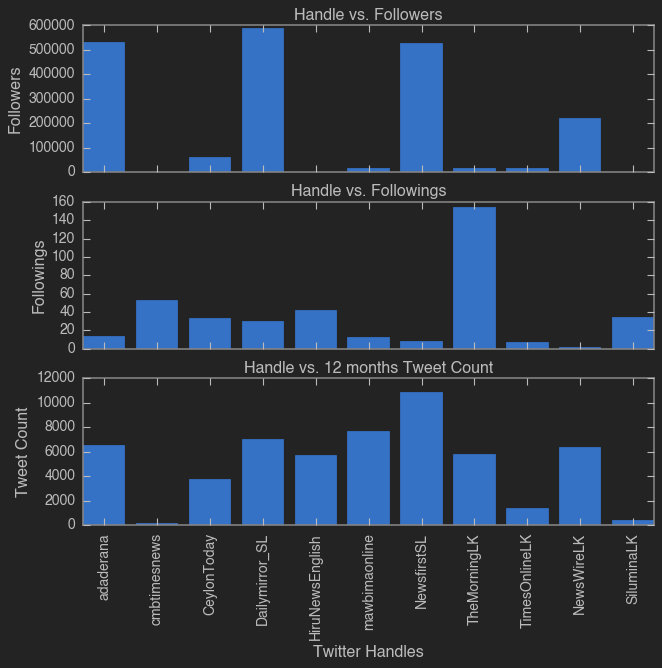

In [273]:
# Create figure and subplot axes
fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex = True)
fig.tight_layout()

# Handles vs. Followers
ax1.bar(TWITTER_HANDLES_NAMES, TWITTER_HANDLES_FOLLOWERS)
ax1.set_title('Handle vs. Followers')
ax1.set_ylabel('Followers')

# Handles vs. Followings
ax2.bar(TWITTER_HANDLES_NAMES, TWITTER_HANDLES_FOLLOWINGS)
ax2.set_title('Handle vs. Followings')
ax2.set_ylabel('Followings')

# Handles vs. tweet count in the past 12 months
ax3.bar(TWITTER_HANDLES_NAMES, TWITTER_HANDLES_PAST_12_MONTHS)
ax3.set_xticklabels(TWITTER_HANDLES_NAMES, rotation=90)
ax3.set_title('Handle vs. 12 months Tweet Count')
ax3.set_xlabel('Twitter Handles')
ax3.set_ylabel('Tweet Count')
plt.show()

# Question B

## Extract all articles indexed by the twitter handles of these news sources and state the dimensions of the resulting article collection (NOT tweet collection) of all news agencies in terms of the total tokens and the unique tokens. State also the total tokens and unique tokens of each of the news agencies separately. In preparation for building a classifier of such news articles, address any potential imbalance in the dataset using at least two (02) different methods.

## Scraping Data

Since access to Twitter API has been restricted by new guidelines, tweets cannot be extracted without getting a premium account access. The following code explains how to scrape the data with,

- Twitter API (Cannot use this after new policy changes in twitter)
- Direct scraping with snscrape 
- Using `twitter-scraper-without-api`
- Using `playwright`
- Using `twint`
- Chrome extension + Scrapfly/Python 

The outputs of the non-working implementations are not included in this notebook to reduce the size of the notebook. 

### Answer

The following code blocks contain the steps proceeded to get the answers for **Question B**. 

The extracted data from them are mentioned here with the answer.
The number of articles extracted from the _tweets per twitter handles_, _the number of not null articles after cleaning_, _total tokens_, _total unique tokens_ are shown below.

|Twitter Handle|Extracted Article Count|Not NaN Article Count|Total Tokens before Lemmatization|Total Unique Tokens before Lemmatization|Total Tokens after Lemmatization|Total Unique Tokens after Lemmatization
|:---|---:|---:|---:|---:|---:|---:|
|adaderana|1,931|1,930|133,497|859|97,575|740
|cmbtimesnews|1,846|1,846|885,550|25,598|719,744|21,602
|Dailymirror_SL|1,989|1,979|2,500,040|33,100|2,019,761|27,732
|HiruNewsEnglish|131|130|75,873|7,649|57,943|6,015
|CeylonToday|3,181|3,181|2,802,510|23,230|2,249,209|19,280
|mawbimaonline|3,198|3,198|2,767,105|42,903|2,335,805|25,146
|NewsfirstSL|1,666|1,656|541,762|17,541|429,428|14,261
|TimesOnlineLK|2,272|2,269|170,343|1968|127,422|1,673
|SiluminaLK|763|763|278,141|17,210|228,721|10,278
|NewswireLK|2,627|2,625|1,354,317|23,795|1,070,253|19,623
|TheMorningLK|3,075|3,075|1,530,200|30,472|1,068,148|25,585
|**Total**|**22,679**|**22,652**|**13,039,338**|**112,059¹**|**10,404,009**|**84,633¹**

1. This contains the total unique contains of the corpora.
 
    
### Resolving Imbalances
    
Looking at the above table we can see specific variances in the extracted article count, total tokens and total unique tokens. However, for a classifier, the most important parameters are the total token count and the article count. 

Looking at the total token colum we can see that, it varies from a minimum of 75,873 to maximum of 2,802,510. To address this imbalance we can follow the below steps.

- Resampling - We can oversample the news agencies with fewer articles or undersample the news agencies with more articles.
- Weighted Loss - We can assign higher weights to the to samples from underrepresented news agencies. Then the model pay more attention to the underrepresented news agencies and will improve their classification performance.
- Remove the underrepresented articles - We can remove the tweet handles that contain lower number of articles and go with a slightly low number of twitter handles as well.

The second imbalance comes due to the fact that there are two languages associated with the articles, Sinhala and English. To address this imbalance we can follow the below step.

- Removing underrepresented articles - We can remove the articles that are in Sinhala language and go with one language to address this imbalance.

To address this imbalance issue,

1. We are duplicating the articles of SiluminaLK by 3 (Resampling).
2. Remove HiruNewsEnglish since it neeeds to atleast duplicate the article list by 16 to remove the imbalance (Remove the underrepresented articles).
    
That yields,
**2289** articles from **SiluminaLK** and 10 tweet handles.


### Using Twitter API (Not used in this project)

This was the defacto method of scraping data before the guidelines were introduced. The following code explains how to extract data using the **`tweepy`** python library.

To install the **`tweepy`** python package, execute the following in the Jupyter Notebook.

`!pip install tweepy`

In [1]:
# Specific libraries needs for tweepy API calls and data collections
import tweepy
import requests
from urllib.parse import urlparse
from bs4 import BeautifulSoup
import csv
import sys

In [2]:
# Twitter credentials to access the Twitter API
CONSUMER_KEY ='OW1DemQkytX5Rxr7ZsT5797uG'
CONSUMER_SECRET = 'NUZOcUqrgDSacumPgrUzU5VenpqIagAWVEOUP6G9ZbsWqr5nSk'
ACCESS_KEY = '1676291794060054528-1mu1VZSl3zq5qQJzrVie3F6hhP9nLn'
ACCESS_SECRET = 'uhxGewNVEIOZEX9eUqXiRvYbnXJKJlAAYZqufO86lnqeS'

In [3]:
# Other constants to filter unwanted URLs and set constraints
YOUTUBE_DOMAINS = ['googlevideo', 'ytimg', 'youtube', 'youtu.be', 'youtube-ui.l.google', 'ytimg.l.google', 'ytstatic.l.google', 'youtubei.googleapis'];
FB_DOMAINS = ['facebook' , 'fb'];
TWITTER_DOMAINS = ['twitter'];

# Maximum number of tweets that can extracted from the API
TWEET_COUNT = 200

# Output file
FILE_NAME = "msc_data_collection_using_twitter_api.csv"

# Twitter handles of popular news sources in Sri Lanka
TWITTER_HANDLES = ['adaderana', 'TimesOnlineLK','Dailymirror_SL','NewsfirstSL', 'HiruNewsEnglish', 'SiluminaLK', 'TheMorningLK', 'mawbimaonline', 'colombo_times', 'Lankatruth']

In [4]:
# define the global variable to hold URLs
url_list = set()

In [5]:
# Check if the URL is valid or not.

# If the request code is 200 (GET method success) then the URL is valid,
# otherwise it is not a valid URL.
def check_valid_url(url):
    try:
        request = requests.get(url)
        if request.status_code == 200:
            return url
        else:
            return None
    except:
        return None

In [7]:
# Remove youtube, fb and twitter URLs.

# Using the previously defined domain lists we can filter the Youtube, 
# Facebook and Twitter URLs.

# We are doing this because the data extraction from the social platform
# related URLs can violate the data extraction policies as well as they might
# not contain words.
def remove_youtube_fb_twitter_url(url):
    domain = urlparse(url).netloc
    if any(x in domain for x in YOUTUBE_DOMAINS) or any(y in domain for y in FB_DOMAINS) or any(z in domain for z in TWITTER_DOMAINS):
        return None
    else:
        return url

In [9]:
# Get news URLs from twitter URLs.

# This executes the Twitter API to scrape tweets
def get_all_news_url(screen_name, urls):
    # Setup access to API
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_KEY, ACCESS_SECRET) 
    api = tweepy.API(auth)
    
    all_tweets = api.user_timeline(screen_name=screen_name, count=TWEET_COUNT, include_rts=False, tweet_mode='extended')
    
    for tweet in all_tweets:
        if "entities" in tweet._json:
            entities = tweet._json["entities"]
            if "urls" in entities:
                extended_url = entities['urls'][0].get('expanded_url')
        else:
            extended_url = None
        if extended_url is not None and urls is not None and check_valid_url(extended_url) is not None and remove_youtube_fb_url(extended_url) is not None:
            url_list.add(extended_url)

In [12]:
# Extract the body and the title from the web-page.
def get_body_title(url):
    try:
        html = requests.get(url).content.decode('utf-8')
        soup = BeautifulSoup(html, 'html.parser')
        body = soup.find('body')
        title = soup.find('title').string
        return title,body
    except:
        return None

In [10]:
# This method writes the extracted data to a CSV file.
def write_to_csv(urls_list, path_name):
    with open(path_name, 'a', encoding="utf-8")  as csv_file:
        writer = csv.writer(csv_file, delimiter=',')
        csv.field_size_limit(sys.maxsize)
        writer.writerow(["Title", "Body"])
        for entry in urls_list:
            line = get_body_title(entry)
            if line is not None:
                writer.writerow(line)    

In [ ]:
# Collect the data and write it to a CSV.

# Step 1 -  Get tweets.
for handle in TWITTER_HANDLES:
    get_all_news_url(handle, url_list)

# Step 2-  Print all the URLs extracted from tweets.
print(len(url_list))

# Step 3 - Write the data extracted from URLs to a CSV file.
write_to_csv(url_list, FILE_NAME)

As you can note in the output of the previous code block, it is necessary to have a different access level via a premium account or via an elevated access level for academic purposes.
The issue with the elevated access is that it takes a numerous days to get approved the request you have made to Twitter for an elevated access and there is a possibility that it might not get accepted.

### Direct Scraping with snscrape (Not used in this project)

snscrape is a tool that can be used to scrape data from social networking services(SNS). You can install snscrape using the following command in the Jupyter Notebook.

`!pip install snscrape`

But, installing it like this will not enable the developer version. To install it in the developer version, use the following command in the Jupyter Notebook instead.

`!pip install git+https://github.com/JustAnotherArchivist/snscrape.git`

In [14]:
# snscrape can be used in the command line tool as well. Therefore, to extract data we can simply run,
# snscrape --jsonl --max-results 100 twitter-search 'from:adaderana'> user-tweets.json
# in command line. 

# But if need, you can simply use the os module of Python as well.

import os

os.system("snscrape --jsonl --max-results 100 twitter-search 'from:adaderana'> user-tweets.json")

256

The code 256, is the waited exit code for the `os` module. If you run the following command you can see that this error code is generated due to an waited exit 1 code.

`os.WEXITSTATUS(256)` 

For additional details refer this.

1. https://docs.python.org/3/library/os.html#os.waitstatus_to_exitcode

In [16]:
print(os.WEXITSTATUS(256))

1


Instead of the above, we can use the `snscrape.modules.twitter` to extract the data as well. 

In [ ]:
# Importing libraries and packages.
import snscrape.modules.twitter as twitterscraper
import pandas as pd

# Creating the scraper and a list to append the data.
scraper = twitterscraper.TwitterSearchScraper("from:adaderana")
tweets = scraper.get_items()
tweets_list = []

# Enumerate and scrape tweets.
for i,tweet in enumerate(tweets):
    if i>1000:
        break
    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username])

# Creating a dataframe from the collected tweets.
tweets_df = pd.DataFrame(tweets_list1, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])
tweets_df.head(10)

This issue was addressed by the user **JustAnotherArchivist** who created the developer mode of the snscrape.

1. https://github.com/JustAnotherArchivist/snscrape/issues/996

### Using `twitter-scraper-without-api` (Not used in this project)
This tries to scrape the data using selenium driver. However, since this package is not up to date, there are few inherent issues with this one.

In [ ]:
from twitter_scraper_without_api import TwitterScraper
twitter = TwitterScraper('from:adaderana')
twitter.last_n_mins = 3
twitter.fetch_data()

### Using `playwright` (Not used in this project)
This library tries to access twitter without any credentials and get the data using the HTML component. But the issue is that, Twitter no more allows to access the tweets without login. Therefore, this does not work properly. 

1. https://scrapfly.io/blog/how-to-scrape-twitter/#scraping-twitter-user-profiles

In [ ]:
from playwright.async_api import async_playwright
from nested_lookup import nested_lookup

async def scrape_profile(url: str) -> dict:
    """
    Scrapes Twitter user profile page e.g.:
    https://twitter.com/scrapfly_dev
    returns user data and latest tweets
    """
    _xhr_calls = []

    def intercept_response(response):
        """capture all background requests and save them"""
        # we can extract details from background requests
        if response.request.resource_type == "xhr":
            _xhr_calls.append(response)
        return response

    async with async_playwright() as pw:
        browser = await pw.chromium.launch()
        context = await browser.new_context(viewport={"width": 1920, "height": 1080})
        page = await context.new_page()
        # enable intercepting for this page

        page.on("response", intercept_response)
        await page.goto(url)
        await page.wait_for_selector("[data-testid='tweet']")

        user_calls = [f for f in _xhr_calls if "UserBy" in f.url]
        users = {}
        for xhr in user_calls:
            data = xhr.json()
            user_data = data["data"]["user"]["result"]
            users[user_data["legacy"]["screen_name"]] = user_data

        tweet_calls = [f for f in _xhr_calls if "UserTweets" in f.url]
        tweets = []
        for xhr in tweet_calls:
            data = xhr.json()
            xhr_tweets = nested_lookup("tweet_results", data)
            tweets.extend([tweet["result"] for tweet in xhr_tweets])
            users[user_data["legacy"]["screen_name"]] = user_data

    return {"users": users, "tweets": tweets}


if __name__ == "__main__":
    print(await scrape_profile("https://twitter.com/adaderana"))

This gives a timeout error since it waits for an **xhr request** with a selector `[data-testid='tweet']` and you cannot get that because with the updated policy twitter does not allow a user to view another user's profile without logging in.

### Using `twint` (Not used in this project)
With the new twitter policies the data scraping using twint is not possible and the github repository is archived due to this.

1. https://github.com/twintproject/twint

In [ ]:
# Import libraries
import twint
import nest_asyncio

# nest_asyncio configuration
nest_asyncio.apply()

# Configure
c = twint.Config()
c.Limit = 1
c.Username = "adaderana"

# Run
twint.run.Search(c)

### Chrome extension + Scrapfly/Python

Since the data cannot be scraped using Twitter API and the other python scraping tools does not work properly with the updated Twitter policies, I have tried to extract the data using a chrome extension and then use Scrapfly (we can simply use Python with `httpx` as well) to extract the data using the Twitter IDs. 

Few of the chorme extensions I have tried for this are,

- Twitter Scrapper
- Twlets
- Phantombuster

Some of the limitations I have found while using these are,

- `Twitter Scrapper` and `Twlets` does not export the URLs embedded to tweets.
- `Phantombuster` export the URLs but has a limit of 800 tweets per account.
- `Twitter Scrapper` can be used to get tweets within a period (e.g. 30-06-2022 to 30-06-2023) but, it tries to get those tweets using Twitter front-end. Since, it uses the Twitter front-end and Twitter does not load the complete data load, the Twitter Scrapper tends to output 200-300 tweets most of the time.

Since, the `Twlets` allows you to scrape **3200** tweets per accout, I have used that and `scrapfly`+`httpx` tools.

To install the `scrapfly` and necessary packages type following in the Jupyter notebook.

- `!pip install scrapfly-sdk`
- `!pip install jmespath`
- `!pip install 'httpx[http2]'`

After installing them it is possible to use the Twitter IDs and extract the data. But to do this, we need to bypass the tweet.

##### Tweet Bypass

A tweet is identified via its ID and its URL pattern is simply of type,

`https://twitter.com/<TWITTER_HANLDE>/status/<TWEET_ID>`

But, we can simplify this using the "Tweet embed" widget, which uses the following URL pattern.

`https://platform.twitter.com/embed/Tweet.html?id=<TWEET_ID>`

However, that is not the direct URL to the tweet's data. To scrape the data we need to use the following URL pattern.

`https://cdn.syndication.twimg.com/tweet-result?id=<TWEET_ID>&lang=en`

In [98]:
# Unwanted domains
YOUTUBE_DOMAINS = ['googlevideo', 'ytimg', 'youtube', 'youtu.be', 'youtube-ui.l.google', 'ytimg.l.google', 'ytstatic.l.google', 'youtubei.googleapis'];
FB_DOMAINS = ['facebook' , 'fb'];
TWITTER_DOMAINS = ['twitter'];

# Filenames
URL_FILENAME = 'url_list.csv' # This is a temporary CSV file to get the URL list chunks from Twitter handles. After generating this file, this is moved to url_data directory with respective CSV file name.
CLEANED_CORPORA = 'cleaned_corpora.csv'
DF_CORPORA = 'df_corpora.csv'

# Twitter Handles - The list contains 11 news sources - an additional news source is added since some URLs pointed by the handles did not have any articles
TWEET_HANDLES = ['adaderana', 'cmbtimesnews', 'CeylonToday', 'Dailymirror_SL', 'HiruNewsEnglish', 'mawbimaonline', 'NewsfirstSL', 'SiluminaLK', 'TheMorningLK', 'TimesOnlineLK', 'NewsWireLK']

# Directories
TWLETS_DIR = 'twlets_extracted_data'
URL_BACKUP_DIR = 'url_data_backup'
TITLE_BODY_DATA_DIR = 'title_body_data'
CLEANED_DATA_DIR = 'cleaned_data'
CLEANED_CORPORA_DIR = 'cleaned_corpora'
CORPORA_WITH_LABELS = 'labeled_corpora'

In [3]:
# [Method 1] - Using Python and httpx

# Headers list
HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.54 Safari/537.36",
    "Accept-Encoding": "gzip, deflate, br",
    "Accept-Language": "en-US,en;q=0.9",
}

def extract_twitter_data_using_python(twitter_id):
    # Retrieve the embed HTML
    with httpx.Client(http2=True, headers=HEADERS) as client:
        url = f"https://cdn.syndication.twimg.com/tweet-result?id={twitter_id}&lang=en"
        url = url.replace('"',"")
        response = client.get(
            url,
        )
        assert response.status_code == 200
        data = response.json()
        return data

In [4]:
# [Method - 2] - Using Scrapfly

# Scrapfly key
SCRAPFLY = ScrapflyClient(key="scp-live-c461dabfabf144b7b497a49dc698740c")

def extract_twitter_data_using_scrapfly(twitter_id):
    url = f"https://cdn.syndication.twimg.com/tweet-result?id={twitter_id}&lang=en"
    url = url.replace('"',"")
    result = SCRAPFLY.scrape(
        ScrapeConfig(url)
    )
    data = json.loads(result.content)
    return data

In [4]:
# Utility method to parse the tweet and extract the URLs from the tweet
def parse_tweet(data: Dict) -> Dict:
    result = jmespath.search(
        """{
        attached_urls: entities.urls[].expanded_url
    }""",
        data,
    )
    return result

In [5]:
# Remove youtube, fb and twitter URLs.

# Using the previously defined domain lists we can filter the Youtube, 
# Facebook and Twitter URLs.

# We are doing this because the data extraction from the social platform
# related URLs can violate the data extraction policies as well as they might
# not contain words.
def remove_youtube_fb_twitter_url(url):
    domain = urlparse(url).netloc
    if any(x in domain for x in YOUTUBE_DOMAINS) or any(y in domain for y in FB_DOMAINS) or any(z in domain for z in TWITTER_DOMAINS):
        return None
    else:
        return url

In [6]:
# This method writes the extracted URLs to a CSV file.
def write_to_csv_urls(urls_list, path_name):
    with open(path_name, 'a', encoding="utf-8")  as csv_file:
        writer = csv.writer(csv_file)
        # Only add header if it does not present
        needs_header = os.stat(path_name).st_size == 0
        if needs_header:
            writer.writerow(["URL"])
        csv.field_size_limit(sys.maxsize)
        for entry in urls_list:
            writer.writerow([entry])  

In [18]:
# All the extracted data are inside twlets_extracted_data directory. Load all the data from there and get tweet IDs from them.
def load_file_and_extracted_data_from_twlets(filename):
    path = os.getcwd()
    path = os.path.join(path, TWLETS_DIR, filename) # The directory that contains CSV files.
    # Read the CSV file.
    df = pd.read_csv(path, lineterminator='\n')
    # Get all hyperlinks containing IDs.
    df_id = df['id']
    id_set = set()
    for val in df_id:
        # Since every ID begins with =HYPERLINK remove them first.
        val = val.split("=HYPERLINK")[1]
        # Remove (, ) symbols.
        val = val.replace(")","")
        val = val.replace("(","")
        # Since the data set contains tweet URL and ID, remove the URL.
        val = val.split(",")[1]
        # Remove white spaces.
        val = val.replace(" ","")
        id_set.add(val)
    return id_set

In [8]:
# Use shutil library to move files from one directory to another
def move_url_list_file(filename):
    tweet_handle = filename.split('.')[0]
    path = os.getcwd()
    path = os.path.join(path, URL_BACKUP_DIR, f'url_list_{tweet_handle}.csv')
    shutil.move(URL_FILENAME, path)

In [11]:
def extract_urls_from_csv_files(filename):
    # Load all the IDs from the hyperlinks
    id_set = load_file_and_extracted_data_from_twlets(filename)

    # Convert id_set to id_list
    id_list = list(id_set)

    # Using a set we can identify the unique URLs
    temp_url_set = set()
    # Iterate tweet IDs
    for id_val in id_list:
        extracted_data = parse_tweet(extract_twitter_data_using_python(id_val))
        if len(extracted_data['attached_urls']) > 0:
            for url in extracted_data['attached_urls']:
                if remove_youtube_fb_twitter_url(url)!= None:
                    temp_url_set.add(url) # Get unique URL

    # Convert url_set to url_list
    url_list = list(temp_url_set)

    # Print the length of the URL list and print the first five(5) URLs
    print(f"File name: {filename}, Total unique URL count: {len(url_list)}")
    
    
    # Save URL list to an CSV file
    write_to_csv_urls(url_list, URL_FILENAME)
    
    # Move the file to url_data_backup directory
    move_url_list_file(filename)

In [20]:
# Extract URLs from files and get CSV file chunks.
extract_urls_from_csv_files("adaderana.csv")

File name: adaderana.csv, Total unique URL count: 1931


In [21]:
extract_urls_from_csv_files("cmbtimesnews.csv")

File name: cmbtimesnews.csv, Total unique URL count: 1846


In [22]:
extract_urls_from_csv_files("Dailymirror_SL.csv")

Tweet Handle: Dailymirror_SL.csv, Total unique URL count: 1989


In [23]:
extract_urls_from_csv_files("HiruNewsEnglish.csv")

File name: HiruNewsEnglish.csv, Total unique URL count: 131


In [24]:
extract_urls_from_csv_files("CeylonToday.csv")

File name: CeylonToday.csv, Total unique URL count: 3181


In [25]:
extract_urls_from_csv_files("mawbimaonline.csv")

File name: mawbimaonline.csv, Total unique URL count: 3198


In [26]:
extract_urls_from_csv_files("NewsfirstSL.csv")

File name: NewsfirstSL.csv, Total unique URL count: 1666


In [27]:
extract_urls_from_csv_files("SiluminaLK.csv")

File name: SiluminaLK.csv, Total unique URL count: 763


In [28]:
extract_urls_from_csv_files("TheMorningLK.csv")

File name: TheMorningLK.csv, Total unique URL count: 3075


In [29]:
extract_urls_from_csv_files("TimesOnlineLK.csv")

File name: CeylonToday.csv, Total unique URL count: 2272


In [30]:
extract_urls_from_csv_files("NewsWireLK.csv")

File name: CeylonToday.csv, Total unique URL count: 2627


## Get Title and Body from the webpages mentioned in URL lists

All the text related data reside between `<title>...</title>` and `<body>...</body>` tags of a webpage. I have defined few utility methods to extract the data from webpages and save them in a separate directory for each of the twitter handles.

In [31]:
# Extract the body and the title from the web-page.
def get_body_title(url):
    try:
        html = requests.get(url).content.decode('utf-8')
        soup = BeautifulSoup(html, 'html.parser')
        body = soup.find('body')
        title = soup.find('title').string
        return title,body
    except:
        return None

In [16]:
# This method writes the extracted data to a CSV file.
def write_to_csv_title_body(urls_list, path_name):
    iteration = 1
    with open(path_name, 'a', encoding="utf-8")  as csv_file:
        writer = csv.writer(csv_file, delimiter=',')
        csv.field_size_limit(sys.maxsize)
        # Only add header if it does not present
        needs_header = os.stat(path_name).st_size == 0
        if needs_header:
            writer.writerow(["Title", "Body"])
        for entry in urls_list:
            line = get_body_title(entry)
            if line is not None:
                writer.writerow(line)
                print(f"{iteration}. {entry}")
                iteration += 1

In [14]:
# Get title body list per tweet handle and save them on a separate directory
def get_title_body_per_handle(twitter_handle):
    # Get CSV file from directory
    path = os.getcwd()
    path = os.path.join(path, URL_BACKUP_DIR, f'url_list_{twitter_handle}.csv')
    
    # Read CSV file
    df = pd.read_csv(path)
    # Remove duplicates
    df.drop_duplicates(subset='URL', keep=False, inplace=True)
    # Convert dataframe to a list
    url_list = df['URL'].tolist()
    # Save them in a separate directory
    path_save = os.path.join(TITLE_BODY_DATA_DIR, f'title_body_{twitter_handle}.csv')
    # Start getting title and body
    write_to_csv_title_body(url_list, path_save)

In [ ]:
# Get title and body per handle
for handle in TWEET_HANDLES:
    get_title_body_per_handle(handle) # This saves data in ./title_body_data/

In [205]:
# Get all the title and body data to a single array containing data frames
def get_title_body_dataframes_for_all_handles():
    path = os.getcwd()
    path = os.path.join(path, TITLE_BODY_DATA_DIR)
    csv_files = glob.glob(path + "/*.csv")

    data_frames_dict = dict()
    # Create a dataframe dictionary
    for file in csv_files:
        # Setting dictionary key
        key = file.split('/')[-1]
        key = key.split('.')[0]
        key = key.split('_')
        key = '_'.join(key[2:]) # This is because Dailymirror_SL has an underscore separator
        data_frames_dict[key] = pd.read_csv(file)

    return data_frames_dict

In [206]:
# Dataframe with all the title and body files
df_dict = get_title_body_dataframes_for_all_handles()

###  Dimensions of the articles per handle

In [208]:
# Create an instance of PrettyTable
table = PrettyTable()

# Define table headers
table.field_names = ["Handle", "No. of articles"]

# Enumerate the dictionary
graph_dict = dict()
for k, v in df_dict.items():
    num_rows, num_columns = v.shape
    table.add_row([k, num_rows])
    graph_dict[k] = num_rows

# Set table formatting options
table.align = "l"  # Align text to the left
table.border = True  # Add border to the table
table.hrules = True  # Add horizontal rules between rows

# Print the table
print(table)

+-----------------+-----------------+
| Handle          | No. of articles |
+-----------------+-----------------+
| NewsfirstSL     | 1666            |
+-----------------+-----------------+
| NewsWireLK      | 2627            |
+-----------------+-----------------+
| SiluminaLK      | 763             |
+-----------------+-----------------+
| mawbimaonline   | 3198            |
+-----------------+-----------------+
| TimesOnlineLK   | 2272            |
+-----------------+-----------------+
| TheMorningLK    | 3075            |
+-----------------+-----------------+
| Dailymirror_SL  | 1989            |
+-----------------+-----------------+
| adaderana       | 1931            |
+-----------------+-----------------+
| HiruNewsEnglish | 131             |
+-----------------+-----------------+
| cmbtimesnews    | 1846            |
+-----------------+-----------------+
| CeylonToday     | 3181            |
+-----------------+-----------------+


#### Exploratory Analysis of the Articles

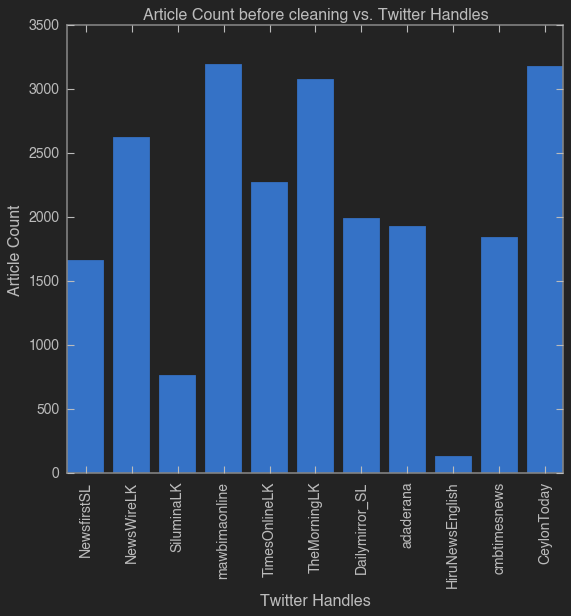

In [210]:
# Twitter Handles vs. Article Count
fig, ax = plt.subplots()
ax.bar(graph_dict.keys(), graph_dict.values())
ax.set_xticklabels(graph_dict.keys(), rotation=90)
ax.set_title('Article Count before cleaning vs. Twitter Handles')
ax.set_xlabel('Twitter Handles')
ax.set_ylabel('Article Count')
plt.show()

## Creating a pipeline to clean data

To get the total tokens and total unique tokens following steps have been followed. From this point onwards, our main focus is the data between `<body>...</body>` tag. Therefore, we are not considering the data between `<title>...</title>`.

1. Step 1 - Remove HTML tags, CSS attributes, JS snippets and unwanted tags from articles.
2. Step 2 - Expand contractions using `contraction.py` file.
3. Step 3 - Remove stop-words, two-letter words, numbers, puntuations, URLs and special characters from articles.

### Step 1 - Remove HTML tags, CSS attributes, JS snippets and unwanted tags from articles.

In [211]:
# Remove data inside the tags except the data between <p> tags.
def remove_html_tags(html_text):
    soup = BeautifulSoup(html_text, 'html.parser')
    for p_tag in soup.find_all('p'):
        p_tag.unwrap()  # Remove <p> tags but keep the content inside
    return soup.get_text()

### Step 2 - Expand contractions using `contraction.py` file.

In [215]:
# Search for contractions in the provided text(body) and expand if found.
def expand_contractions(text):
    words = text.split()
    word_list = []
    for word in words:
        _word = word.lower()
        if _word in CONTRACTION_MAP:
            word_list.append(CONTRACTION_MAP[_word])
        else:
            word_list.append(word)
    return ' '.join(word_list)

### Step 3 - Remove stop-words, two-letter words, numbers, puntuations, URLs and special characters from articles.

In [216]:
# Remove punctations
def remove_punctuations(text):
    text = [(char if char not in string.punctuation else " ") for char in text]
    text = ''.join(text)
    return text

# Remove stop words
# This is only to preprocess the dataset. In a later step, we need to run this again after lemmatizing.
def remove_stop_words(text):
    stopwords = nltk.corpus.stopwords.words('english') # NLTK stop-words list, since Sinhala language is not there we will be using English as the default value.
    other_words = [line.rstrip('\n') for line in open('stopwords.txt')] # Collected stop words in a text file.
    words = text.split()
    word_list = []
    for word in words:
        _word = word.lower()
        if _word in stopwords or _word in other_words:
            continue
        else:
            word_list.append(word)
    return ' '.join(word_list)

# Remove words containing 2 letters or more that 21 letters
def remove_two_letter_words(text):
    words = text.split()
    word_list = []
    for word in words:
        if len(word) <= 2 or len(word) >= 21:
            continue
        else:
            word_list.append(word)
    return ' '.join(word_list)

# Check for Tamil words
def is_tamil_word(word):
    # Check if a word contains Tamil unicode characters
    tamil_chars = re.findall(r"[\u0B80-\u0BFF]", word)
    return len(tamil_chars) > 0

# Remove Tamil words
def remove_tamil_words(text):
    # Remove Tamil words
    text = ' '.join([word for word in text.split() if not is_tamil_word(word)])
    return text
    
# Remove special characters, punctuations, URLs, digits, words with digits,
def remove_punctuations_special_characters_urls_and_digits(text):
    text = text.replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
    text = text.replace(',', '')          # Removes commas
    text = text.rstrip('\n')              # Removes line breaks
    text = text.casefold()                # Makes all letters lowercase
        
    text = re.sub("\S*@\S*\s?"," ", text) # Removes emails and mentions (words with @)
    text = re.sub(r'http\S+', '', text)   # Removes URLs with http
    text = re.sub(r'www\S+', '', text)    # Removes URLs with www
    text = remove_punctuations(text)      # Removes punctuations
    text = re.sub(r"[^\w\s\u0D80-\u0DFF]",' ', text) # Removes specials characters and leaves only words in Sinhala and English
    text = remove_tamil_words(text)       # Removes Tamil words and characters
    text = re.sub("\S*\d\S*"," ", text)   # Removes numbers and words concatenated with numbers i.e. tw33t. Removes road names such as AR-111.
    text = remove_two_letter_words(text)  # Remove words containing 2 letters or more than 21 letters
    return text

In [213]:
# Finalized pipeline to clean data
def clean_data(text):
    # Remove HTML tags & CSS properties
    #text = remove_html_tags_and_css_properties(text)
    text = remove_html_tags(text)
    # Expand contractions
    text = expand_contractions(text)
    # Remove stop-words, two-letter words, special characters, punctuations, URLs and digits
    text = remove_punctuations_special_characters_urls_and_digits(text)
    return text

In [217]:
# Get the cleaned dataframe
_df_dict = df_dict.copy() # Deep copy of data frame
for k,v in _df_dict.items():
    v['Body'] = v['Body'].apply(clean_data)

In [218]:
# Save the dataframes with cleaned data so that, we can load data from it.
path = os.getcwd()
for k, v in _df_dict.items():
    save_path = os.path.join(path, CLEANED_DATA_DIR, f'cleaned_{k}.csv')
    v.to_csv(save_path, index=False)
    print(f'Saved cleaned_{k}.csv')

Saved cleaned_NewsfirstSL.csv
Saved cleaned_NewsWireLK.csv
Saved cleaned_SiluminaLK.csv
Saved cleaned_mawbimaonline.csv
Saved cleaned_TimesOnlineLK.csv
Saved cleaned_TheMorningLK.csv
Saved cleaned_Dailymirror_SL.csv
Saved cleaned_adaderana.csv
Saved cleaned_HiruNewsEnglish.csv
Saved cleaned_cmbtimesnews.csv
Saved cleaned_CeylonToday.csv


## Tokenize the words
To get the total number of tokens and the total number of unique tokens, we will follow the following steps.

1. Step 1 - Load the cleaned data set, remove rows if there are null values present in the data.
2. Step 2 - Create `Body` based corpora from each of the news handles.
3. Step 3 - Tokenize the corpora and get the total number of tokens and total number of unique tokens.
4. Step 4 - Lemmatize and stem to get the root words and remove the stop words again to get the total tokens and unique tokens.
5. Step 5 - Resolving imbalances

### Step 1 - Load the cleaned data set, remove rows if there are null values present in the data.

In [274]:
# Get the cleaned dataframes.
def get_cleaned_data_frames():
    # Get CSV files list from a folder
    path = os.getcwd()
    path = os.path.join(path, CLEANED_DATA_DIR)
    csv_files = glob.glob(path + "/*.csv")

    data_frames_dict = dict()
    # Create a dataframe dictionary
    for file in csv_files:
        # Setting dictionary key
        key = file.split('/')[-1]
        key = key.split('.')[0]
        key = key.split('_')
        key = '_'.join(key[1:]) # This is because Dailymirror_SL has an underscore separator
        data_frames_dict[key] = pd.read_csv(file)

    return data_frames_dict

In [275]:
df_cleaned = get_cleaned_data_frames()

In [276]:
# Set Twitter handles as a new column for future references
for k,v in df_cleaned.items():
    v['Handle'] = k

In [277]:
# Check whether the new column added or not
df_cleaned['NewsWireLK'].head(5)

Title  \
0   Two US banks collapse : What happened - NewsWire   
1  PUCSL chairman accuses Finance Ministry Sec of...   
2  Two, including PS officer, arrested over Canad...   
3  WATCH: Cheers erupt as rescuers save family af...   
4  Finland businessman slapped with $129,400 spee...   

                                                Body      Handle  
0  skip content primary navigation menu menu home...  NewsWireLK  
1  skip content primary navigation menu menu home...  NewsWireLK  
2  skip content primary navigation menu menu home...  NewsWireLK  
3  skip content primary navigation menu menu home...  NewsWireLK  
4  skip content primary navigation menu menu home...  NewsWireLK

In [278]:
# Check for null values present in the data
for k,v in df_cleaned.items():
    print(f"Number of null values in {k} - {v['Body'].isnull().sum()}")

Number of null values in adaderana - 1
Number of null values in TimesOnlineLK - 3
Number of null values in mawbimaonline - 0
Number of null values in NewsWireLK - 2
Number of null values in HiruNewsEnglish - 1
Number of null values in SiluminaLK - 0
Number of null values in NewsfirstSL - 10
Number of null values in cmbtimesnews - 0
Number of null values in CeylonToday - 0
Number of null values in Dailymirror_SL - 10
Number of null values in TheMorningLK - 0


In [279]:
# Remove the null records and check whether they have been removed.
for k, v in df_cleaned.items():
    # Drop rows with null values in the 'Body' column
    v.dropna(subset=['Body'], inplace=True)
for k,v in df_cleaned.items():
    print(f"Number of null values in {k} - {v['Body'].isnull().sum()}")

Number of null values in adaderana - 0
Number of null values in TimesOnlineLK - 0
Number of null values in mawbimaonline - 0
Number of null values in NewsWireLK - 0
Number of null values in HiruNewsEnglish - 0
Number of null values in SiluminaLK - 0
Number of null values in NewsfirstSL - 0
Number of null values in cmbtimesnews - 0
Number of null values in CeylonToday - 0
Number of null values in Dailymirror_SL - 0
Number of null values in TheMorningLK - 0


In [227]:
# Data after cleaning
# Create an instance of PrettyTable
table = PrettyTable()

# Define table headers
table.field_names = ["Handle", "No. of articles"]

# Enumerate the dictionary
graph_dict = dict()
for k, v in df_cleaned.items():
    num_rows, num_columns = v.shape
    table.add_row([k, num_rows])
    graph_dict[k] = num_rows

# Set table formatting options
table.align = "l"    # Align text to the left
table.border = True  # Add border to the table
table.hrules = True  # Add horizontal rules between rows

# Print the table
print(table)

+-----------------+-----------------+
| Handle          | No. of articles |
+-----------------+-----------------+
| adaderana       | 1930            |
+-----------------+-----------------+
| TimesOnlineLK   | 2269            |
+-----------------+-----------------+
| mawbimaonline   | 3198            |
+-----------------+-----------------+
| NewsWireLK      | 2625            |
+-----------------+-----------------+
| HiruNewsEnglish | 130             |
+-----------------+-----------------+
| SiluminaLK      | 763             |
+-----------------+-----------------+
| NewsfirstSL     | 1656            |
+-----------------+-----------------+
| cmbtimesnews    | 1846            |
+-----------------+-----------------+
| CeylonToday     | 3181            |
+-----------------+-----------------+
| Dailymirror_SL  | 1979            |
+-----------------+-----------------+
| TheMorningLK    | 3075            |
+-----------------+-----------------+


#### Expoloratory Analysis of the Articles after Cleaned

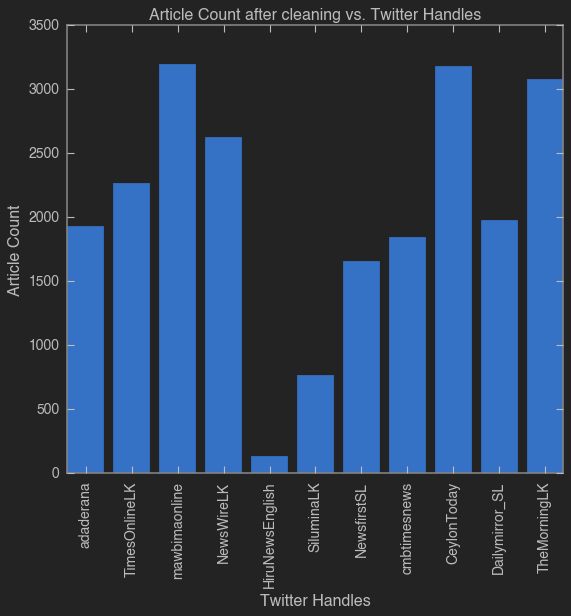

In [280]:
# Twitter Handles vs. Article Count
fig, ax = plt.subplots()
ax.bar(graph_dict.keys(), graph_dict.values())
ax.set_xticklabels(graph_dict.keys(), rotation=90)
ax.set_title('Article Count after cleaning vs. Twitter Handles')
ax.set_xlabel('Twitter Handles')
ax.set_ylabel('Article Count')
plt.show()

### Step 2 - Create 'Body' based corpora from each of the news handles.

In [281]:
# Create 'Body' based corpora
corpus_dict = dict()
for k,v in df_cleaned.items():
    data_arr = v['Body'].to_numpy()
    corpus_dict[k] = data_arr

### Step 3 - Tokenize the corpora and get the total number of tokens and total number of unique tokens.

In [282]:
# This is used to remove special characters after tokenization based on unicodes
def remove_characters_after_tokenization(elem):
    # Common punctuations
    if (elem >= u"\u0020") and (elem <= u"\u002F"):   
        return False
    elif (elem >= u"\u003A") and (elem <= u"\u0040"):
        return False
    elif (elem >= u"\u005B") and (elem <= u"\u0060"):
        return False
    elif (elem >= u"\u007B") and (elem <= u"\u007E"):
        return False
    else:
        return True

# Tokenize the text based on NLTK
def tokenize_text(text):
    sentences = nltk.sent_tokenize(text)
    wordList = []
    for sentence in sentences:
        wordList += nltk.word_tokenize(sentence)
    wordList = filter(remove_characters_after_tokenization, wordList)
    return list(wordList)

In [283]:
# Get tokenized corpora and save them in dataframes for future references
for k, v in df_cleaned.items():
    v['Tokens'] = v['Body'].apply(tokenize_text)
    v['Token Count'] = v['Tokens'].apply(len)

In [284]:
# Check whether the new column added or not
df_cleaned['NewsWireLK'].head(5)

Title  \
0   Two US banks collapse : What happened - NewsWire   
1  PUCSL chairman accuses Finance Ministry Sec of...   
2  Two, including PS officer, arrested over Canad...   
3  WATCH: Cheers erupt as rescuers save family af...   
4  Finland businessman slapped with $129,400 spee...   

                                                Body      Handle  \
0  skip content primary navigation menu menu home...  NewsWireLK   
1  skip content primary navigation menu menu home...  NewsWireLK   
2  skip content primary navigation menu menu home...  NewsWireLK   
3  skip content primary navigation menu menu home...  NewsWireLK   
4  skip content primary navigation menu menu home...  NewsWireLK   

                                              Tokens  Token Count  
0  [skip, content, primary, navigation, menu, men...         1363  
1  [skip, content, primary, navigation, menu, men...          559  
2  [skip, content, primary, navigation, menu, men...          448  
3  [skip, content, primary, navigation, menu, men...          333  
4  [skip, content, primary, navigation, menu, men...          660

In [285]:
# Get tokenized corpora
cleaned_corpus_dict = dict()
for k, v in corpus_dict.items():
    cleaned_corpus = [tokenize_text(text) for text in v]
    cleaned_corpus_dict[k] = cleaned_corpus

In [286]:
# This method used to get the total words of the corpus
def calculate_total_tokens(corpus):
    total_count = 0
    for data in corpus:
        total_count = total_count + len(data)
    return total_count

# This method used to get the total unique words of the corpus
def calculate_unique_tokens(corpus):
    return len(Counter(list(itertools.chain.from_iterable(corpus))))

In [287]:
# Get total tokens and total unique tokens per handle
# Create an instance of PrettyTable
table = PrettyTable()

# Define table headers
table.field_names = ["Handle", "Total Tokens", "Total Unique Tokens"]

total_tokens_dict = dict()
total_unique_tokens_dict = dict()
# Enumerate the dictionary
for k, v in cleaned_corpus_dict.items():
    total_tokens_dict[k] = calculate_total_tokens(v)
    total_unique_tokens_dict[k] = calculate_unique_tokens(v)
    table.add_row([k, calculate_total_tokens(v), calculate_unique_tokens(v)])

# Set table formatting options
table.align = "l"    # Align text to the left
table.border = True  # Add border to the table
table.hrules = True  # Add horizontal rules between rows

# Print the table
print(table)

+-----------------+--------------+---------------------+
| Handle          | Total Tokens | Total Unique Tokens |
+-----------------+--------------+---------------------+
| adaderana       | 133497       | 859                 |
+-----------------+--------------+---------------------+
| TimesOnlineLK   | 170343       | 1968                |
+-----------------+--------------+---------------------+
| mawbimaonline   | 2767105      | 42903               |
+-----------------+--------------+---------------------+
| NewsWireLK      | 1354317      | 23795               |
+-----------------+--------------+---------------------+
| HiruNewsEnglish | 75873        | 7649                |
+-----------------+--------------+---------------------+
| SiluminaLK      | 278141       | 17210               |
+-----------------+--------------+---------------------+
| NewsfirstSL     | 541762       | 17541               |
+-----------------+--------------+---------------------+
| cmbtimesnews    | 885550     

#### Exploratory Analysis of Corpora

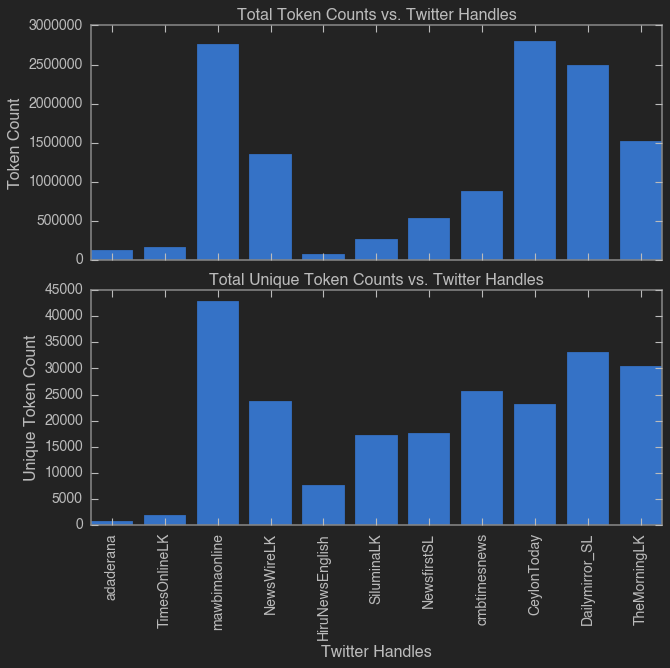

In [288]:
# Twitter Handles vs. Token Counts
fig, (ax1,ax2) = plt.subplots(2,1, sharex = True)
fig.tight_layout()
ax1.bar(total_tokens_dict.keys(), total_tokens_dict.values())
ax1.set_xticklabels(graph_dict.keys(), rotation=90)
ax1.set_title('Total Token Counts vs. Twitter Handles')
ax1.set_ylabel('Token Count')

ax2.bar(total_unique_tokens_dict.keys(), total_unique_tokens_dict.values())
ax2.set_xticklabels(graph_dict.keys(), rotation=90)
ax2.set_title('Total Unique Token Counts vs. Twitter Handles')
ax2.set_xlabel('Twitter Handles')
ax2.set_ylabel('Unique Token Count')
plt.show()

In [239]:
# Print the total tokens and total unique tokens of the whole corpus
# Create an instance of PrettyTable
table = PrettyTable()

# Define table headers
table.field_names = ["Total Tokens", "Total Unique Tokens"]

big_corpus = []
# Enumerate the dictionary
for k, v in cleaned_corpus_dict.items():
    _corpus = v
    for _val in _corpus:
        big_corpus.append(_val)
    
table.add_row([calculate_total_tokens(big_corpus), calculate_unique_tokens(big_corpus)])
# Set table formatting options
table.align = "l"    # Align text to the left
table.border = True  # Add border to the table
table.hrules = True  # Add horizontal rules between rows

# Print the table
print(table)

+--------------+---------------------+
| Total Tokens | Total Unique Tokens |
+--------------+---------------------+
| 13039338     | 112059              |
+--------------+---------------------+


### Step 4 - Lemmatize and stem to get the root words and remove the stop words again to get the total tokens and unique tokens.

Lemmatizing and stemming are two techniques used in NLP to transform words into their root form. The intention of both mechanisms is to reduce the derived word forms to the root form.

### Lemmatization

Lemmatization targets to reduce the words to their root or dictionary form, known as `lemma`. It considers the morphological analysis of words and consider tense, gender, number and part of speech. 
For example, the lemma of word "going" would be "go", and the lemma of "better" would be "good".

### Stemming

Stemming is a simpler technique which reduces words to their stem. This is not accurate as lemmatization but when it comes to speed this is better.

We will be using both of them since there are sinhala words present in the corpora. For English words we will be using the `WordNetLemmatizer` from `nltk` package. And for Sinhala words we will be using the `SinhalaStemmer` from `sinling` package[1].

1. https://github.com/ysenarath/sinling

In [289]:
# Applies stemming to a list of tokenized words
# Although we can use this instead of a lemmatizer we are not using this in this project with NLTK package.
# But we use this with sinling package
stemmer = SinhalaStemmer()

def apply_stemming(token_list, stemmer = stemmer):
    return [stemmer.stem(token)[0] for token in token_list]

In [290]:
# Applies lematization to a list of tokenized words
# Annotate text tokens with POS tags
wnl = WordNetLemmatizer()
def pos_tag_text(tokens):
    def penn_to_wn_tags(pos_tag):
        if pos_tag.startswith('J'):
            return wn.ADJ
        elif pos_tag.startswith('V'):
            return wn.VERB
        elif pos_tag.startswith('N'):
            return wn.NOUN
        elif pos_tag.startswith('R'):
            return wn.ADV
        else:
            return None
    tagged_text = nltk.pos_tag(tokens)
    tagged_text_set = [(word.lower(), penn_to_wn_tags(pos_tag))
                         for word, pos_tag in
                         tagged_text]
    return tagged_text_set

# Lemmatize text based on POS tags    
def apply_lemmatizing(tokens):
    pos_tagged_text = pos_tag_text(tokens)
    lemmatized_tokens = [wnl.lemmatize(word, pos_tag) if pos_tag
                         else word                     
                         for word, pos_tag in pos_tagged_text]
    return lemmatized_tokens

In [291]:
# We will send the data through both stemmer and lemmatizer and get the root words
lemmatized_and_stemmed_dict = dict()
for k, v in cleaned_corpus_dict.items():
    lemmatized_and_stemmed_dict[k] = []
    for ls in v:
        _temp = apply_stemming(ls)
        _temp = apply_lemmatizing(_temp)
        lemmatized_and_stemmed_dict[k].append(_temp)

In [292]:
# Check for stop words and two letter words again.
def remove_stop_words_and_two_letter_words(tokens):
    stopwords = nltk.corpus.stopwords.words('english') # NLTK stop-words list, since Sinhala language is not there we will be using English as the default value.
    other_words = [line.rstrip('\n') for line in open('stopwords.txt')] # Collected stop words in a text file.
    word_list = []
    for word in tokens:
        _word = word.lower()
        if _word in stopwords or _word in other_words:
            continue
        elif len(_word)<=2 or len(_word)>=21:
            continue
        else:
            word_list.append(word)
    return word_list

In [293]:
# Remove stop words and two letter words again.
final_corpus_dict = dict()
for k,v in lemmatized_and_stemmed_dict.items():
    final_corpus_dict[k] = []
    for ls in v:
        _temp = remove_stop_words_and_two_letter_words(ls)
        final_corpus_dict[k].append(_temp)

In [294]:
# Apply stemming, lemmatizing and removing stop words and save in a dataframe for future references
for k,v in df_cleaned.items():
    v['Tokens'] = v['Tokens'].apply(apply_stemming)
    v['Tokens'] = v['Tokens'].apply(apply_lemmatizing)
    v['Tokens'] = v['Tokens'].apply(remove_stop_words_and_two_letter_words)
    v['Token Count'] = v['Tokens'].apply(len)

In [295]:
# Check whether the values have been changed or not
df_cleaned['NewsWireLK'].head(5)

Title  \
0   Two US banks collapse : What happened - NewsWire   
1  PUCSL chairman accuses Finance Ministry Sec of...   
2  Two, including PS officer, arrested over Canad...   
3  WATCH: Cheers erupt as rescuers save family af...   
4  Finland businessman slapped with $129,400 spee...   

                                                Body      Handle  \
0  skip content primary navigation menu menu home...  NewsWireLK   
1  skip content primary navigation menu menu home...  NewsWireLK   
2  skip content primary navigation menu menu home...  NewsWireLK   
3  skip content primary navigation menu menu home...  NewsWireLK   
4  skip content primary navigation menu menu home...  NewsWireLK   

                                              Tokens  Token Count  
0  [skip, content, primary, navigation, menu, men...          988  
1  [skip, content, primary, navigation, menu, men...          432  
2  [skip, content, primary, navigation, menu, men...          349  
3  [skip, content, primary, navigation, menu, men...          280  
4  [skip, content, primary, navigation, menu, men...          512

In [296]:
# Get total tokens and total unique tokens per handle after lemmatizing and removing stop words
# Create an instance of PrettyTable
table = PrettyTable()

# Define table headers
table.field_names = ["Handle", "Total Tokens", "Total Unique Tokens"]

final_big_corpus = []
total_tokens_dict = dict()
total_unique_tokens_dict = dict()
# Enumerate the dictionary
for k, v in final_corpus_dict.items():
    total_tokens_dict[k] = calculate_total_tokens(v)
    total_unique_tokens_dict[k] = calculate_unique_tokens(v)
    table.add_row([k, calculate_total_tokens(v), calculate_unique_tokens(v)])
    _corpus = v
    for _val in _corpus:
        final_big_corpus.append(_val)
        
# Add final row with all the data
table.add_row(['Aggregated Corpus',calculate_total_tokens(final_big_corpus), calculate_unique_tokens(final_big_corpus)])
# Set table formatting options
table.align = "l"    # Align text to the left
table.border = True  # Add border to the table
table.hrules = True  # Add horizontal rules between rows

# Print the table
print(table)

+-------------------+--------------+---------------------+
| Handle            | Total Tokens | Total Unique Tokens |
+-------------------+--------------+---------------------+
| adaderana         | 97575        | 740                 |
+-------------------+--------------+---------------------+
| TimesOnlineLK     | 127422       | 1673                |
+-------------------+--------------+---------------------+
| mawbimaonline     | 2335805      | 25146               |
+-------------------+--------------+---------------------+
| NewsWireLK        | 1070253      | 19623               |
+-------------------+--------------+---------------------+
| HiruNewsEnglish   | 57943        | 6015                |
+-------------------+--------------+---------------------+
| SiluminaLK        | 228721       | 10278               |
+-------------------+--------------+---------------------+
| NewsfirstSL       | 429428       | 14261               |
+-------------------+--------------+--------------------

#### Exploratory Analysis of Final Token Counts vs. Twitter Handles

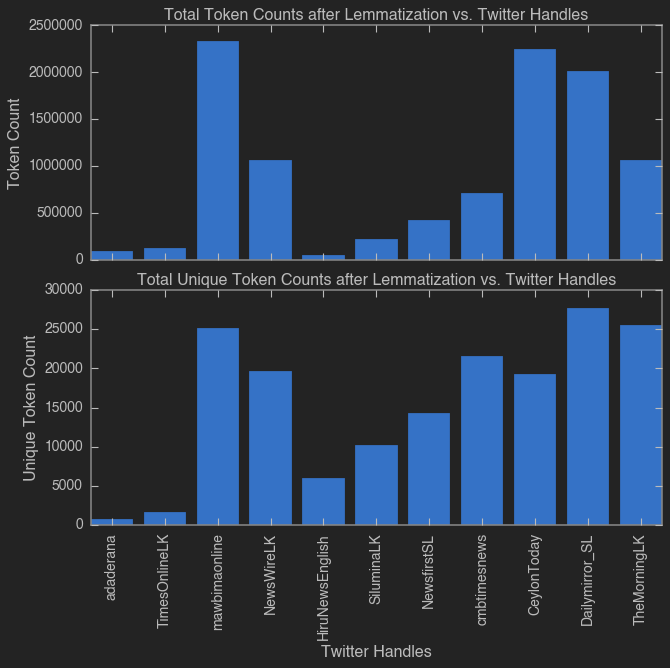

In [297]:
# Final Twitter Handles vs. Token Counts
fig, (ax1,ax2) = plt.subplots(2,1, sharex = True)
fig.tight_layout()
ax1.bar(total_tokens_dict.keys(), total_tokens_dict.values())
ax1.set_xticklabels(graph_dict.keys(), rotation=90)
ax1.set_title('Total Token Counts after Lemmatization vs. Twitter Handles')
ax1.set_ylabel('Token Count')

ax2.bar(total_unique_tokens_dict.keys(), total_unique_tokens_dict.values())
ax2.set_xticklabels(graph_dict.keys(), rotation=90)
ax2.set_title('Total Unique Token Counts after Lemmatization vs. Twitter Handles')
ax2.set_xlabel('Twitter Handles')
ax2.set_ylabel('Unique Token Count')
plt.show()

### Step 5 - Resolving Imbalances

In [105]:
# 1 - Duplicate SiluminaLK article count. (Resampling)
# In this case, the number of tokens can will be multiplied and the unique tokens will remain the same.
df_silumina = df_cleaned['SiluminaLK']
print(f"Number of articles in SiluminaLK before duplication: {len(df_cleaned['SiluminaLK'])}")
df_silumina = pd.concat([df_silumina, df_silumina, df_silumina], ignore_index = True)
df_cleaned['SiluminaLK'] = df_silumina
print(f"Number of articles in SiluminaLK after duplication: {len(df_cleaned['SiluminaLK'])}")

Number of articles in SiluminaLK before duplication: 763
Number of articles in SiluminaLK after duplication: 2,289


In [107]:
# 2 - Remove HiruNewsLK articles. (Remove the underrepresented articles)
# Since df_cleaned is a dictionary containing all the tweet handles we can simply remove the df_cleaned['HiruNewsLK']
#del df_cleaned['HiruNewsLK']
print('==========Tweet Handles========')
for k, v in df_cleaned.items():
    print(k)

==========Tweet Handles========
1.adaderana
2.cmbtimesnews
3.CeylonToday
4.Dailymirror_SL
5.mawbimaonline
6.NewsfirstSL
7.SiluminaLK
8.TheMorningLK
9.TimesOnlineLK
10.NewsWireLK


# Question C

## Use a sparse and a dense vector representation for extracting features for training a classifier for this dataset. Interpret the dimensions of the sparse vector and justify the dimensions of the dense vector used.

We can use either sparse vector representation or dense vector representation to extract features from a dataset so that we can use them to train a classifier.

### Sparse Vector Representations

For this project I am using the following sparse vector representations.

1. Bag of Words (BoW) using Count Vectorizer
2. Count Vectorizer with bi-grams
3. Tf-idf Vectorizer
4. Tf-idf Vectorizer with bi-grams

### 1. Bag of Words (BoW) using Count Vectorizer

Bag of Words (BoW) is an algorithm which counts the number of times a word appears in a document. Using this we can compare documents, and evaluate their similarities for search, classificaion and topic-modelling.
In this approach, each word or token is called a `gram`.

### 2. Count Vectorizer with bi-grams

Using the BoW we can create a vocabulary of grouped words. Creating. vocabulary of two-word pairs is called a `bi-gram model`. For example, the bigrams for "We are going home" are,

- "we are"
- "are going"
- "going home"

Similary we can create `tri-gram models` using three-word pairs.

### 3. Tf-idf Vectorizer

Tf-Idf is shorthand for term frequency-inverse document frequency. There are two concepts, term frequency and inverse document frequency.
Term frequency (TF) is similary the output of the BoW(Bag of Words) model. For a specific document, it determines how important a word is by looking at how frequently it appears in the document. It measures how important the word is. If a word appears multiple times, then that word is considered important.
IDF (Inverse Document Frequency) is used to calculate the weight of rare words across the documents. The words that occur rarely in the corpus have a high IDF score.

### 4. Tf-idf Vectorizer with bi-grams

Similar to the `Count Vectorizer with bi-grams` we can create `Tf-idf Vectorizer with bi-grams` using two-word pairs.


### Dense Vector Representaions

For dense vector representations, we can use `word embeddings`.

### 1. Word Embeddings

Word embeddings are dense vector representations of words in a high-dimensional space, usually using a vector space. The intention behind word embeddings is that words with similar meanings or usages tend to have similar vector representations. This allows us to map words that capture their semantic relationships. For example, words like, "king" and "queen" are expected to have similar vector representations since both of them have similar semantic properties.
Word embeddings are learned from large corpors using techniques like, Word2Vec, GloVe or FastText.

We can use `gensim` python library and `Word2Vec` for this.

We will use the following steps to create sparse and dense vector based vectorizers, and label the data frame accordingly, in addition to the `Handle` label we already have.

1. Step 1 - Create a separate dataframe for the procedure
2. Step 2 - Create methods for sparse vectors
3. Step 3 - Create methods to get cluster labels using sparse vectors
4. Step 4 - Get dense vector representations
5. Step 5 - Save the file with cluster labels and dense vector representations
    

### Answer

The answers to the dimensions of sparse and dense vectors are as follows (These were extracted by following the above steps).
    
The sparse vector dimenstions are as follows.

- BoW using Count Vectorizer - (24178, 63890)
- BoW using Count Vectorizer with bi-grams - (24178, 3659418)
- Tf-idf Vectorizer - (24178, 63890)
- Tf-idf Vectorizer with bi-grams - (24178, 3659418)

Here, we are using 2 dense vector representations, 
    
1. Using `word2vec-google-news-300`
2. Our custom word2vec model.
 
The dimension of the dense vector for a `word2vec-google-news-300` is 300. This is because of the pre-trained `gensim` model we are using, `word2vec-google-news-300`. The vector size of 300 (because of `word2vec-google-news-300`) is used as the dimension of one article. The reasons for using `word2vec-google-news-300` are,

- Large and diverse training corpus - This model is trained on a large amount of news articles, providing a rich and diverse vocabulary.
- Rich semantic representations - This can capture semantics and meanings in a broader context and can learn complex relationships and similarities between words as well.
- Higher dimensionality - This has a higher dimension compared to smaller word embedding models.
- Commonly used benchmark - This is a popular benchmark and a reference model to many NLP projects.

For the custom word2vec model we are using a custom vocabulary using train-test split. In the below code that is being done with a vector size of 500. The reasons for choosing the vector size as 500 are as follows.

- Sufficient Feature Representation - I believe the vector of size 500 is enough to represent the features since the `word2vec-google-news-300` only uses 300.
- Memory Efficiency - Compared to very high-dimensional vectors, 500 is relatively small and thus memory efficient. Since we need to handle a considerable amount of data, 500 is better.
- Computational Efficiency - Dense vectors are more efficient than sparse vectors and since 500 is a small dimension the computational efficiency is higher.
- Dense Embeddings - In NLP, 500 is considered a reasonable choice for embeddings.

### Step 1 - Create a separate dataframe for the procedure

In [298]:
# Add a new column by joining the tokens to a single string.
for k, v in df_cleaned.items():
    v['cleaned_article'] = v['Tokens'].apply(lambda x:' '.join(x))

In [299]:
# Check whether the new column added or not
df_cleaned['NewsWireLK'].head(5)

Title  \
0   Two US banks collapse : What happened - NewsWire   
1  PUCSL chairman accuses Finance Ministry Sec of...   
2  Two, including PS officer, arrested over Canad...   
3  WATCH: Cheers erupt as rescuers save family af...   
4  Finland businessman slapped with $129,400 spee...   

                                                Body      Handle  \
0  skip content primary navigation menu menu home...  NewsWireLK   
1  skip content primary navigation menu menu home...  NewsWireLK   
2  skip content primary navigation menu menu home...  NewsWireLK   
3  skip content primary navigation menu menu home...  NewsWireLK   
4  skip content primary navigation menu menu home...  NewsWireLK   

                                              Tokens  Token Count  \
0  [skip, content, primary, navigation, menu, men...          988   
1  [skip, content, primary, navigation, menu, men...          432   
2  [skip, content, primary, navigation, menu, men...          349   
3  [skip, content, primary, navigation, menu, men...          280   
4  [skip, content, primary, navigation, menu, men...          512   

                                     cleaned_article  
0  skip content primary navigation menu menu home...  
1  skip content primary navigation menu menu home...  
2  skip content primary navigation menu menu home...  
3  skip content primary navigation menu menu home...  
4  skip content primary navigation menu menu home...

In [300]:
# Save the cleaned corpora per tweet handle
path = os.getcwd()
for k, v in df_cleaned.items():
    save_path = os.path.join(path, CLEANED_CORPORA_DIR, f"cleaned_corpora_{k}.csv")
    v.to_csv(save_path, index=False)
    print(f'Saved cleaned_corpora_{k}.csv')

Saved cleaned_corpora_adaderana.csv
Saved cleaned_corpora_TimesOnlineLK.csv
Saved cleaned_corpora_mawbimaonline.csv
Saved cleaned_corpora_NewsWireLK.csv
Saved cleaned_corpora_HiruNewsEnglish.csv
Saved cleaned_corpora_SiluminaLK.csv
Saved cleaned_corpora_NewsfirstSL.csv
Saved cleaned_corpora_cmbtimesnews.csv
Saved cleaned_corpora_CeylonToday.csv
Saved cleaned_corpora_Dailymirror_SL.csv
Saved cleaned_corpora_TheMorningLK.csv


In [5]:
# Load all the cleaned corpora
dfs = []
# Iterate over the files in the directory
path = os.getcwd()
path = os.path.join(path, CLEANED_CORPORA_DIR)
csv_files = glob.glob(path + "/*.csv")
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate the DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

In [6]:
# Save combined dataframe to a file
combined_df.to_csv(CLEANED_CORPORA, index=False)

In [7]:
# Check combined dataframe
combined_df.head(5)

Title  \
0   Two US banks collapse : What happened - NewsWire   
1  PUCSL chairman accuses Finance Ministry Sec of...   
2  Two, including PS officer, arrested over Canad...   
3  WATCH: Cheers erupt as rescuers save family af...   
4  Finland businessman slapped with $129,400 spee...   

                                                Body      Handle  \
0  skip content primary navigation menu menu home...  NewsWireLK   
1  skip content primary navigation menu menu home...  NewsWireLK   
2  skip content primary navigation menu menu home...  NewsWireLK   
3  skip content primary navigation menu menu home...  NewsWireLK   
4  skip content primary navigation menu menu home...  NewsWireLK   

                                              Tokens  Token Count  \
0  ['skip', 'content', 'primary', 'navigation', '...          988   
1  ['skip', 'content', 'primary', 'navigation', '...          432   
2  ['skip', 'content', 'primary', 'navigation', '...          349   
3  ['skip', 'content', 'primary', 'navigation', '...          280   
4  ['skip', 'content', 'primary', 'navigation', '...          512   

                                     cleaned_article  
0  skip content primary navigation menu menu home...  
1  skip content primary navigation menu menu home...  
2  skip content primary navigation menu menu home...  
3  skip content primary navigation menu menu home...  
4  skip content primary navigation menu menu home...

In [3]:
# Load the data from the saved file.
df_corpora = pd.read_csv(CLEANED_CORPORA)
df_corpora.head(5)

Title  \
0   Two US banks collapse : What happened - NewsWire   
1  PUCSL chairman accuses Finance Ministry Sec of...   
2  Two, including PS officer, arrested over Canad...   
3  WATCH: Cheers erupt as rescuers save family af...   
4  Finland businessman slapped with $129,400 spee...   

                                                Body      Handle  \
0  skip content primary navigation menu menu home...  NewsWireLK   
1  skip content primary navigation menu menu home...  NewsWireLK   
2  skip content primary navigation menu menu home...  NewsWireLK   
3  skip content primary navigation menu menu home...  NewsWireLK   
4  skip content primary navigation menu menu home...  NewsWireLK   

                                              Tokens  Token Count  \
0  ['skip', 'content', 'primary', 'navigation', '...          988   
1  ['skip', 'content', 'primary', 'navigation', '...          432   
2  ['skip', 'content', 'primary', 'navigation', '...          349   
3  ['skip', 'content', 'primary', 'navigation', '...          280   
4  ['skip', 'content', 'primary', 'navigation', '...          512   

                                     cleaned_article  
0  skip content primary navigation menu menu home...  
1  skip content primary navigation menu menu home...  
2  skip content primary navigation menu menu home...  
3  skip content primary navigation menu menu home...  
4  skip content primary navigation menu menu home...

In [65]:
# Make a list containing the cleaned articles
df_corpora_list = df_corpora['cleaned_article'].tolist()

### Step 2 - Create methods for sparse vectors

In [87]:
# Count vectorizer for BoW extraction
def bow_extractor(corpus, ngram_range = (1,1)):
    vectorizer = CountVectorizer(min_df = 1, ngram_range = ngram_range)
    X = vectorizer.fit_transform(corpus).astype(float) # features
    return vectorizer, X

# Count vectorizer for bigrams
def bow_extractor_bigrams(corpus, ngram_range = (2,3)):
    vectorizer = CountVectorizer(min_df = 1, ngram_range = ngram_range)
    X = vectorizer.fit_transform(corpus).astype(float) # features
    return vectorizer, X

# Tfidf vectorizer for extraction
def tfidf_extractor(corpus, ngram_range = (1,1)):
    vectorizer = TfidfVectorizer(min_df = 1, norm = 'l2', smooth_idf = True, use_idf = True, ngram_range = ngram_range)
    X = vectorizer.fit_transform(corpus).astype(float) # features
    return vectorizer, X

# Tfidf vectorizer for bigrams
def tfidf_extractor_bigrams(corpus, ngram_range = (2,3)):
    vectorizer = TfidfVectorizer(min_df = 1, norm = 'l2', smooth_idf = True, use_idf = True, ngram_range = ngram_range)
    X = vectorizer.fit_transform(corpus).astype(float) # features
    return vectorizer, X

# Tfidf weighted average word vectorizer related methods
def tfidf_wtd_avg_word_vectors(words, tfidf_vector, tfidf_vocabulary, model, num_features):
    
    word_tfidfs = [tfidf_vector[0, tfidf_vocabulary.get(word)] 
                   if tfidf_vocabulary.get(word) 
                   else 0 for word in words]
    #type(tfidf_vector)
    #print(tfidf_vector)
    #print(word_tfidfs)
    word_tfidf_map = {word:tfidf_val for word, tfidf_val in zip(words, word_tfidfs)}
    #print(word_tfidf_map)
    feature_vector = np.zeros((num_features,),dtype="float64")
    vocabulary = set(model.wv.index_to_key)
    wts = 0.
    for word in words:
        if word in vocabulary: 
            word_vector = model.wv[word]
            weighted_word_vector = word_tfidf_map[word] * word_vector
            wts = wts + word_tfidf_map[word]
            feature_vector = np.add(feature_vector, weighted_word_vector)
    if wts:
        feature_vector = np.divide(feature_vector, wts)
        
    return feature_vector

def tfidf_weighted_averaged_word_vectorizer(corpus, tfidf_vectors, 
                                   tfidf_vocabulary, model, num_features):
                                       
    docs_tfidfs = [(doc, doc_tfidf) 
                   for doc, doc_tfidf 
                   in zip(corpus, tfidf_vectors)]
    features = [tfidf_wtd_avg_word_vectors(tokenized_sentence, tfidf, tfidf_vocabulary,
                                   model, num_features)
                    for tokenized_sentence, tfidf in docs_tfidfs]
    return np.array(features) 

### Step 3 - Create methods to get cluster labels using sparse vectors

In [20]:
# Find optimal clusters using elbow method
def find_optimal_clusters_using_elbow_method(data, max_k):
    num_cluster = [x for x in range(2, max_k + 1)]
    
    squared_errors = []
    for cluster in num_cluster:
        kmeans = KMeans(n_clusters = cluster).fit(data) # Train cluster
        squared_errors.append(kmeans.inertia_) # Appending the squared loss obtained in the list
        
    optimal_clusters = np.argmin(squared_errors)# As argmin return the index of minimum loss. 
    plt.plot(num_cluster, squared_errors)
    plt.title("Elbow Curve to Find the no. of Clusters.")
    plt.xlabel("Number of clusters.")
    plt.ylabel("Squared Loss.")
    xy = (optimal_clusters, min(squared_errors))
    plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
    plt.grid(True)
    plt.show()

# Find optimal clusters using silhouette method
def find_optimal_clusters_using_silhouette_method(data, number_of_clusters):
    Y = data.copy()
    silhouette_scores = []
    range_n_clusters = [x for x in range(2, number_of_clusters + 1)]
    
    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters = n_clusters, max_iter = 10000, random_state=10)
        clusterer.fit(Y)
        cluster_labels = clusterer.predict(Y)
    
        silhouette_avg = silhouette_score(Y, cluster_labels, metric = 'euclidean', sample_size = None, random_state = None)
        silhouette_scores.append(silhouette_avg)
    
    plt.plot(range_n_clusters, silhouette_scores)
    plt.title('Silhoutte score values vs. Number of clusters')
    plt.show()

# K-means
def k_means(feature_matrix, num_clusters):
    km = KMeans(n_clusters = num_clusters, max_iter = 10000, random_state = 0)
    km.fit(feature_matrix)
    clusters = km.labels_
    return km, clusters

# Get cluster data
def get_cluster_data(clustering_obj, article_data, feature_names, num_clusters, cluster_name, topn_features=10):
    cluster_details = {}  
    # Get cluster centroids
    ordered_centroids = clustering_obj.cluster_centers_.argsort()[:, ::-1]
    # Get key features for each cluster
    # Get news articles belonging to each cluster
    for cluster_num in range(num_clusters):
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster_num'] = cluster_num
        key_features = [feature_names[index] 
                        for index 
                        in ordered_centroids[cluster_num, :topn_features]]
        cluster_details[cluster_num]['key_features'] = key_features
        
        article = article_data[article_data[cluster_name] == cluster_num]['cleaned_article'].values.tolist()
        cluster_details[cluster_num]['cleaned_article'] = article
    
    return cluster_details

# Print cluster data
def print_cluster_data(cluster_data):
    # WordCloud utility method for Sinhala words
    def contains_only_sinhala(sentence):
        sinhala_pattern = re.compile(r'[\u0D80-\u0DFF]+')
        sinhala_words = re.findall(sinhala_pattern, sentence)
        return len(sinhala_words) > (len(sentence.split())/4)*3
    # Print cluster details
    for cluster_num, cluster_details in cluster_data.items():
        print('Cluster {} details:'.format(cluster_num))
        print('-'*20)
        print('Key features:', cluster_details['key_features'])
        #print('Tweets in this cluster:')
        #print(', '.join(cluster_details['cleanedLinks'][-10:]))
        plt.figure(figsize=(10,10))
        sentences_as_one_string=' '.join(cluster_details['cleaned_article'][-10:])
        if contains_only_sinhala(sentences_as_one_string):
            plt.imshow(WordCloud(font_path='Hodipotha3.ttf').generate(sentences_as_one_string), interpolation='bilinear')
        else:
            plt.imshow(WordCloud().generate(sentences_as_one_string), interpolation='bilinear')
        
        print('='*40)

---------------------------------
Optimal clusters using Silhouette
---------------------------------


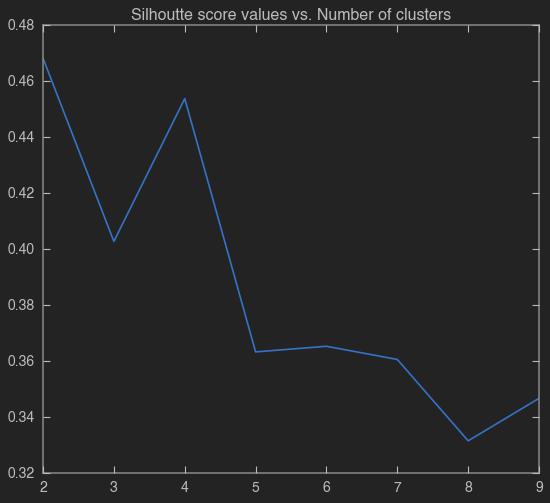

-----------------------------------
Optimal clusters using Elbow method
----------------------------------


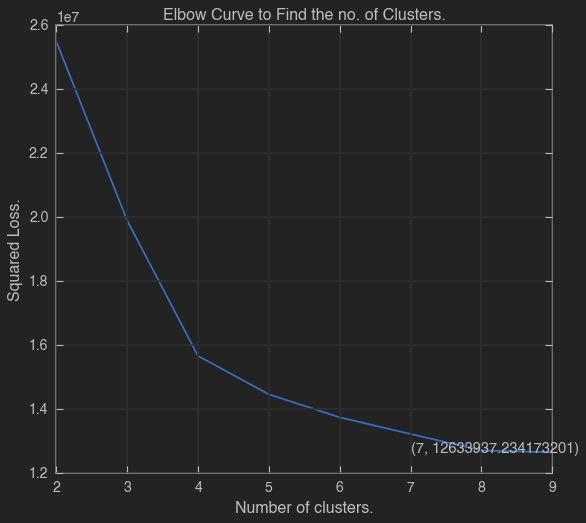

In [21]:
# Get clusters using BoW extractor
vectorizer_bow, X_bow = bow_extractor(df_corpora_list)
feature_names_bow = vectorizer_bow.get_feature_names_out()

# Identify the optimal clusters using silhouette for count-vectorizer
print('---------------------------------')
print('Optimal clusters using Silhouette')
print('---------------------------------')
find_optimal_clusters_using_silhouette_method(X_bow, 9)
# Identify the optimal clusters using elbow for count-vectorizer
print('-----------------------------------')
print('Optimal clusters using Elbow method')
print('----------------------------------')
find_optimal_clusters_using_elbow_method(X_bow, 9)

According to the intrinsic evaluation techniques mentioned above, Elbow method has a better/steep curve on 4 while the Silhouette method shows the maximum value at 2. Furthermore, the Silhoutte method shows a quick spike at 4 as well. Therefore, 4 has been identified as the best cluster using Count Vectorizer (BoW).

Cluster 0 details:
--------------------
Key features: ['පර', 'තර', 'අපර', 'ෂණ', 'සම', 'කත', 'මව', 'සහත', 'ඉර', 'බලප']
Cluster 1 details:
--------------------
Key features: ['today', 'billion', 'ceylon', 'credit', 'sport', 'july', 'editorial', 'cartoon', 'news', 'finance']
Cluster 2 details:
--------------------
Key features: ['sri', 'lanka', 'july', 'colombo', 'news', 'website', 'block', 'say', 'ltd', 'pvt']
Cluster 3 details:
--------------------
Key features: ['online', 'sri', 'lanka', 'news', 'jul', 'delivery', 'home', 'mirror', 'kapruka', 'reply']


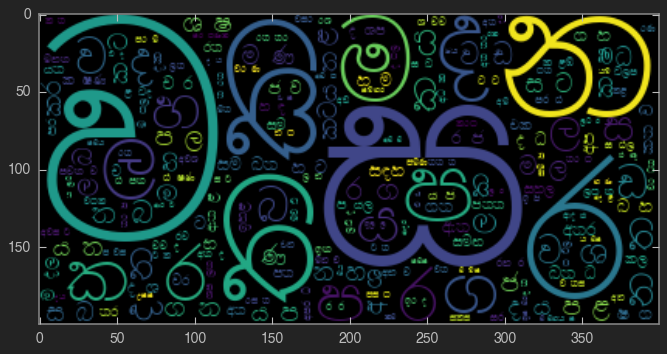

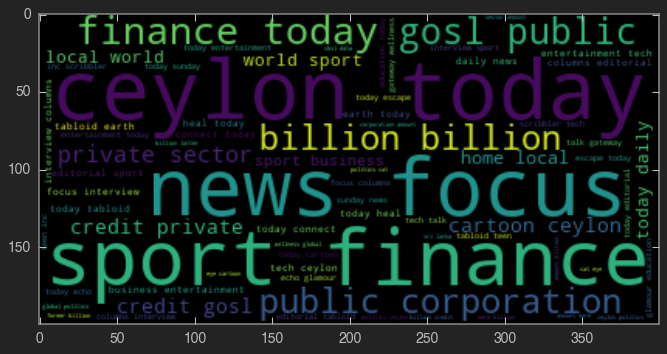

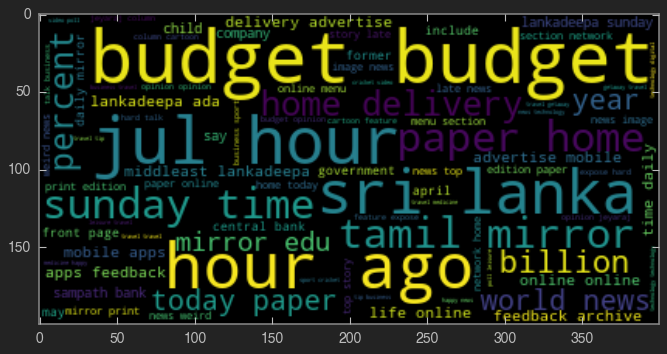

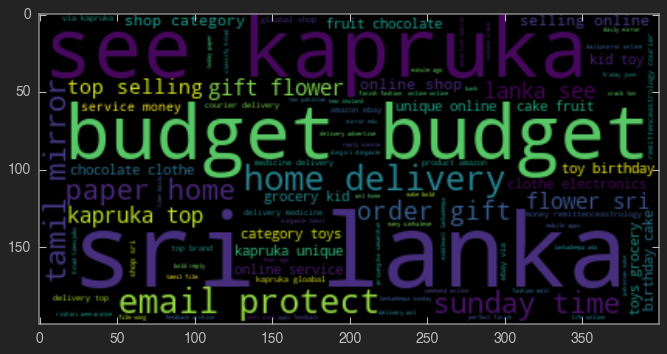

In [22]:
num_clusters_bow = 4

# Call the above function to get clusters and assign the cluster labels to the movies
km_obj, clusters = k_means(feature_matrix=X_bow, num_clusters=num_clusters_bow)

# Create a new column with clusters
df_corpora['clusters_bow'] = clusters

# Analyse the k-means clustering data
cluster_data =  get_cluster_data(clustering_obj=km_obj,
                                 article_data=df_corpora,
                                 feature_names=feature_names_bow,
                                 num_clusters=num_clusters_bow,
                                 cluster_name = 'clusters_bow', topn_features=10)         

# Print the detailed clustering analysis results
print_cluster_data(cluster_data) 

In [23]:
# Check the dataframe
df_corpora.head(5)

Title  \
0   Two US banks collapse : What happened - NewsWire   
1  PUCSL chairman accuses Finance Ministry Sec of...   
2  Two, including PS officer, arrested over Canad...   
3  WATCH: Cheers erupt as rescuers save family af...   
4  Finland businessman slapped with $129,400 spee...   

                                                Body      Handle  \
0  skip content primary navigation menu menu home...  NewsWireLK   
1  skip content primary navigation menu menu home...  NewsWireLK   
2  skip content primary navigation menu menu home...  NewsWireLK   
3  skip content primary navigation menu menu home...  NewsWireLK   
4  skip content primary navigation menu menu home...  NewsWireLK   

                                              Tokens  Token Count  \
0  ['skip', 'content', 'primary', 'navigation', '...          988   
1  ['skip', 'content', 'primary', 'navigation', '...          432   
2  ['skip', 'content', 'primary', 'navigation', '...          349   
3  ['skip', 'content', 'primary', 'navigation', '...          280   
4  ['skip', 'content', 'primary', 'navigation', '...          512   

                                     cleaned_article  clusters_bow  
0  skip content primary navigation menu menu home...             2  
1  skip content primary navigation menu menu home...             2  
2  skip content primary navigation menu menu home...             2  
3  skip content primary navigation menu menu home...             2  
4  skip content primary navigation menu menu home...             2

---------------------------------
Optimal clusters using Silhouette
---------------------------------


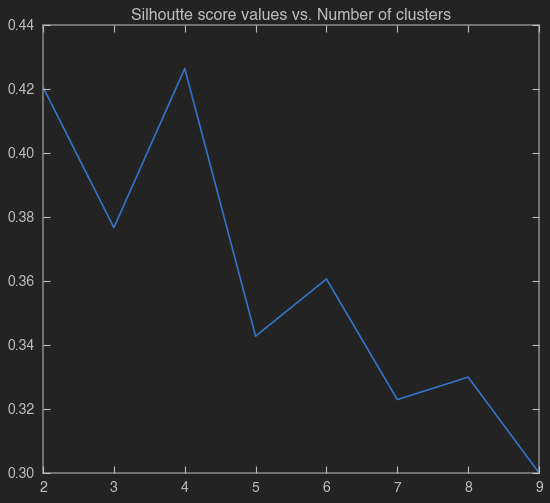

-----------------------------------
Optimal clusters using Elbow method
----------------------------------


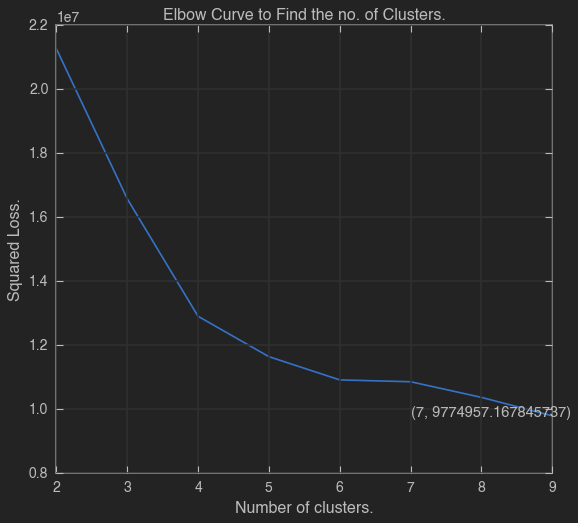

In [24]:
# Get clusters using BoW bigram extractor
vectorizer_bow_bi, X_bow_bi = bow_extractor_bigrams(df_corpora_list)
feature_names_bow_bi = vectorizer_bow_bi.get_feature_names_out()

# Identify the optimal clusters using silhouette for count-vectorizer
print('---------------------------------')
print('Optimal clusters using Silhouette')
print('---------------------------------')
find_optimal_clusters_using_silhouette_method(X_bow_bi, 9)
# Identify the optimal clusters using elbow for count-vectorizer
print('-----------------------------------')
print('Optimal clusters using Elbow method')
print('----------------------------------')
find_optimal_clusters_using_elbow_method(X_bow_bi, 9)

According to the intrinsic evaluation techniques mentioned above, Elbow method has a better/steep curve on 4,6 and 7 while the Silhouette method shows the maximum value at 4. Furthermore, the Silhoutte method shows a quick spikes at 2,6 as well. Therefore, 6 has been identified as the optimal cluster using Count Vectorizer using bi-grams.

Cluster 0 details:
--------------------
Key features: ['sri lanka', 'pvt ltd', 'right reserve', 'block detail', 'website firewall', 'liberty publisher', 'byderana macroentertainment pvt', 'pvt ltd right', 'publisher pvt', 'macroentertainment pvt ltd']
Cluster 1 details:
--------------------
Key features: ['ceylon today', 'finance today', 'sport finance', 'sport finance today', 'news focus', 'billion billion', 'public corporation', 'gosl public corporation', 'gosl public', 'private sector']
Cluster 2 details:
--------------------
Key features: ['sri lanka', 'see kapruka', 'budget budget', 'email protect', 'home delivery', 'budget budget budget', 'sunday time', 'also get', 'also see', 'tamil mirror']
Cluster 3 details:
--------------------
Key features: ['sri lanka', 'digital marketing', 'continue read', 'wire biz', 'first anniversary', 'cricket carnival', 'colombo cricket', 'colombo cricket carnival', 'colombo law', 'social medium']
Cluster 4 details:
--------------------
Key features: 

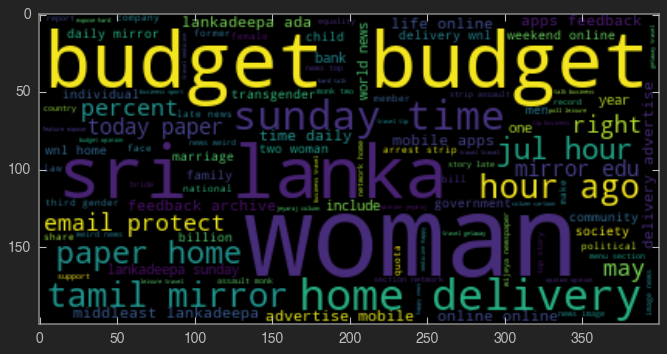

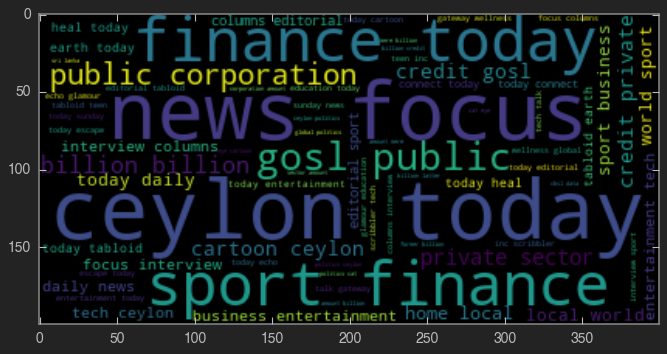

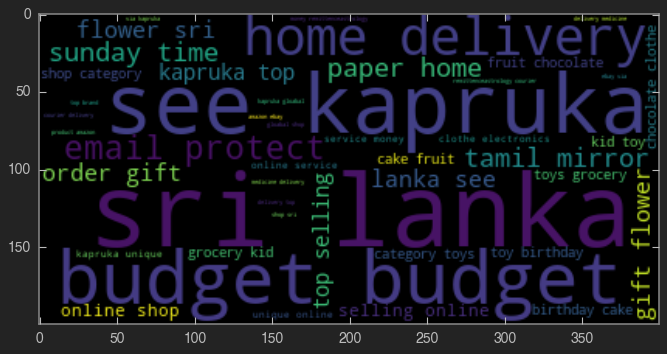

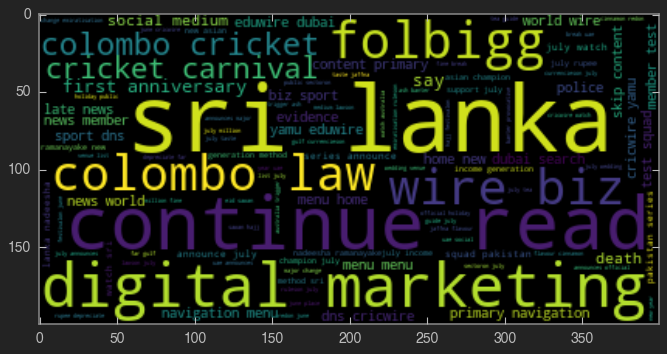

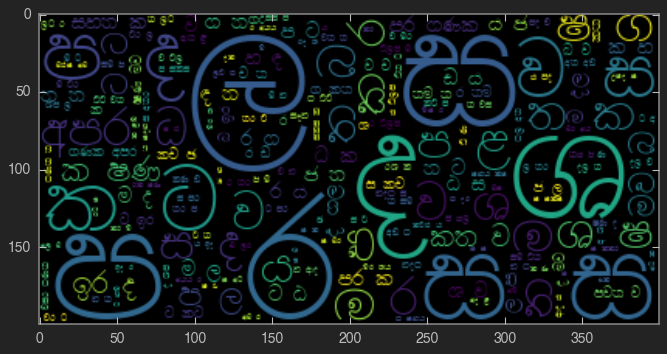

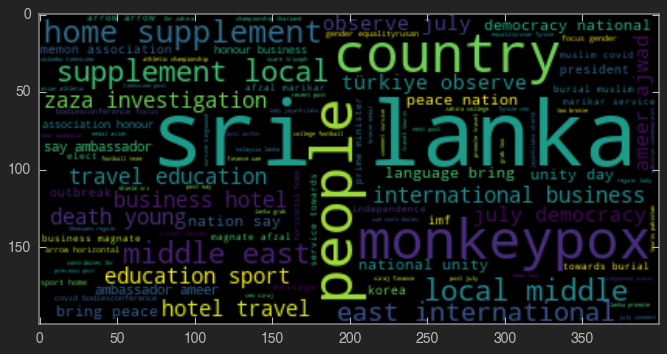

In [25]:
num_clusters_bow_bi = 6

# Call the above function to get clusters and assign the cluster labels to the movies
km_obj, clusters = k_means(feature_matrix=X_bow_bi, num_clusters=num_clusters_bow_bi)

df_corpora['clusters_bow_bi'] = clusters

# Analyse the k-means clustering data
cluster_data =  get_cluster_data(clustering_obj=km_obj,
                                 article_data=df_corpora,
                                 feature_names=feature_names_bow_bi,
                                 num_clusters=num_clusters_bow_bi,
                                 cluster_name = 'clusters_bow_bi', topn_features=10)         

# Print the detailed clustering analysis results
print_cluster_data(cluster_data) 

In [26]:
# Check the dataframe
df_corpora.head(5)

Title  \
0   Two US banks collapse : What happened - NewsWire   
1  PUCSL chairman accuses Finance Ministry Sec of...   
2  Two, including PS officer, arrested over Canad...   
3  WATCH: Cheers erupt as rescuers save family af...   
4  Finland businessman slapped with $129,400 spee...   

                                                Body      Handle  \
0  skip content primary navigation menu menu home...  NewsWireLK   
1  skip content primary navigation menu menu home...  NewsWireLK   
2  skip content primary navigation menu menu home...  NewsWireLK   
3  skip content primary navigation menu menu home...  NewsWireLK   
4  skip content primary navigation menu menu home...  NewsWireLK   

                                              Tokens  Token Count  \
0  ['skip', 'content', 'primary', 'navigation', '...          988   
1  ['skip', 'content', 'primary', 'navigation', '...          432   
2  ['skip', 'content', 'primary', 'navigation', '...          349   
3  ['skip', 'content', 'primary', 'navigation', '...          280   
4  ['skip', 'content', 'primary', 'navigation', '...          512   

                                     cleaned_article  clusters_bow  \
0  skip content primary navigation menu menu home...             2   
1  skip content primary navigation menu menu home...             2   
2  skip content primary navigation menu menu home...             2   
3  skip content primary navigation menu menu home...             2   
4  skip content primary navigation menu menu home...             2   

   clusters_bow_bi  
0                3  
1                3  
2                3  
3                3  
4                3

---------------------------------
Optimal clusters using Silhouette
---------------------------------


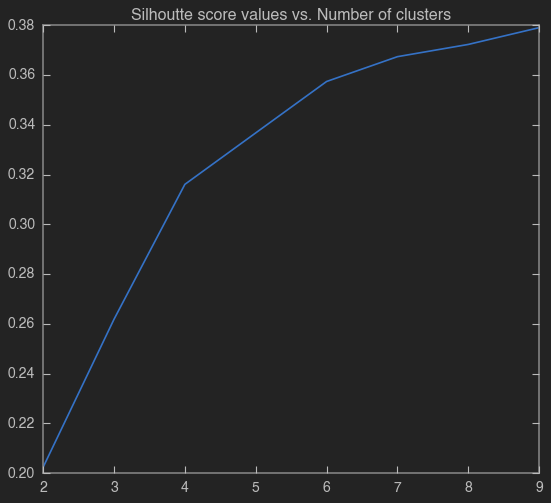

-----------------------------------
Optimal clusters using Elbow method
----------------------------------


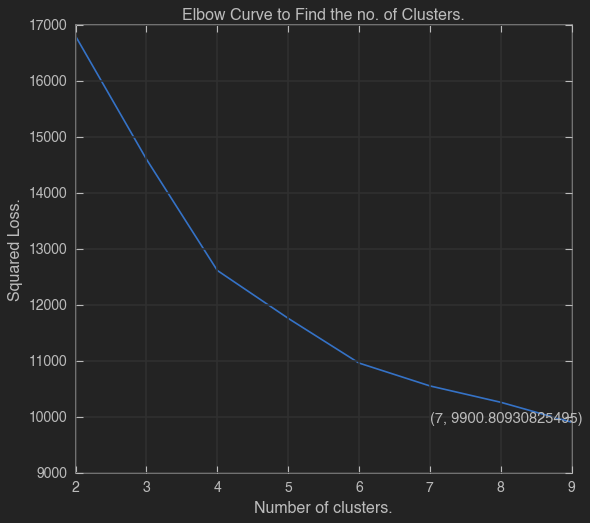

In [27]:
# Get clusters using Tfidf extractor
vectorizer_tfidf, X_tfidf = tfidf_extractor(df_corpora_list)
feature_names_tfidf = vectorizer_tfidf.get_feature_names_out()

# Identify the optimal clusters using silhouette for count-vectorizer
print('---------------------------------')
print('Optimal clusters using Silhouette')
print('---------------------------------')
find_optimal_clusters_using_silhouette_method(X_tfidf, 9)
# Identify the optimal clusters using elbow for count-vectorizer
print('-----------------------------------')
print('Optimal clusters using Elbow method')
print('----------------------------------')
find_optimal_clusters_using_elbow_method(X_tfidf, 9)

According to the intrinsic evaluation techniques mentioned above, Elbow method has a better/steep curve on 4,6 and 7 while the Silhouette method shows the maximum value at 9. Furthermore, the Silhoutte method shows a peak at 7 as well. Therefore, 7 has been identified as the optimal cluster using Tf-idf Vectorizer.

Cluster 0 details:
--------------------
Key features: ['morning', 'sri', 'pvt', 'ltd', 'lanka', 'news', 'jul', 'liberty', 'byderana', 'macroentertainment']
Cluster 1 details:
--------------------
Key features: ['පර', 'තර', 'අපර', 'ෂණ', 'සම', 'සහත', 'ඉර', 'කත', 'බලප', 'සකස']
Cluster 2 details:
--------------------
Key features: ['block', 'sucuri', 'firewall', 'site', 'please', 'access', 'detail', 'troubleshoot', 'whitelist', 'python']
Cluster 3 details:
--------------------
Key features: ['today', 'billion', 'credit', 'ceylon', 'columns', 'gosl', 'tech', 'interview', 'editorial', 'cartoon']
Cluster 4 details:
--------------------
Key features: ['july', 'kiddoz', 'launch', 'sri', 'parent', 'new', 'colombo', 'newswire', 'lanka', 'marketing']
Cluster 5 details:
--------------------
Key features: ['online', 'delivery', 'mirror', 'kapruka', 'jul', 'reply', 'top', 'lankadeepa', 'shop', 'budget']
Cluster 6 details:
--------------------
Key features: ['july', 'post', 'bring', 'sri', 'türkiye', 

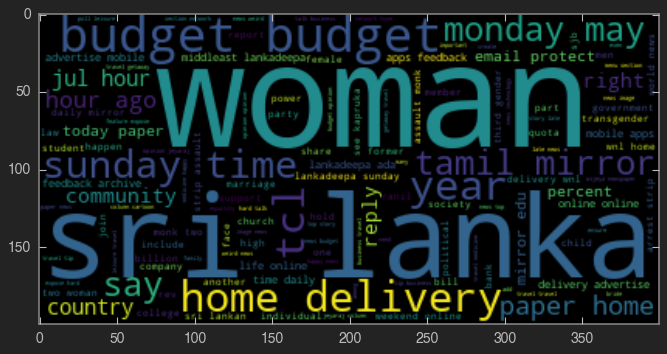

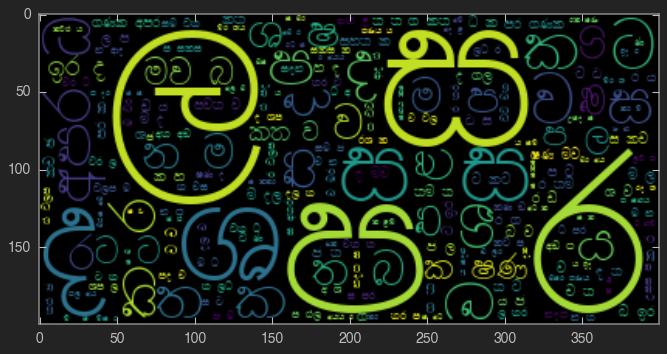

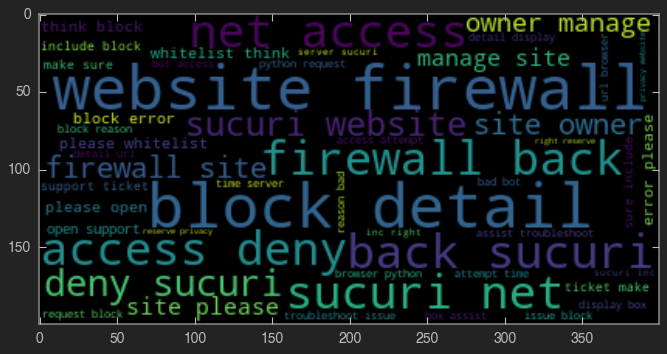

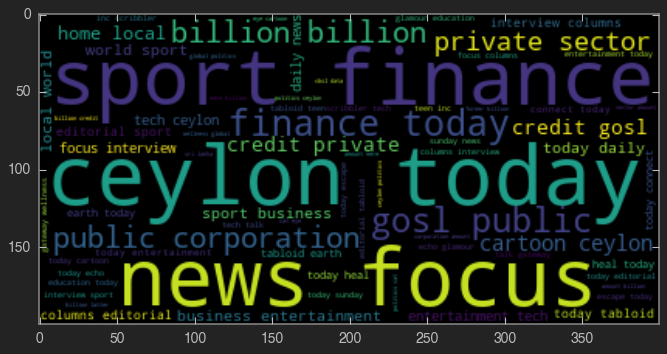

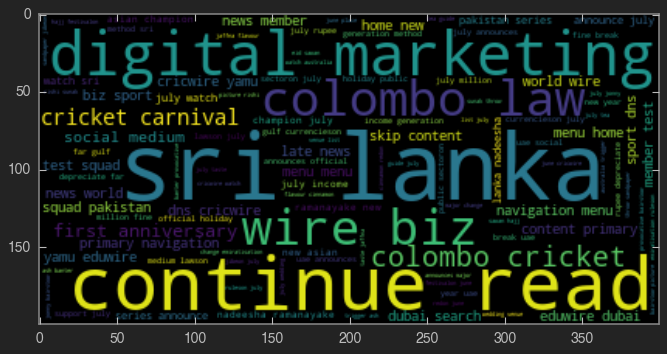

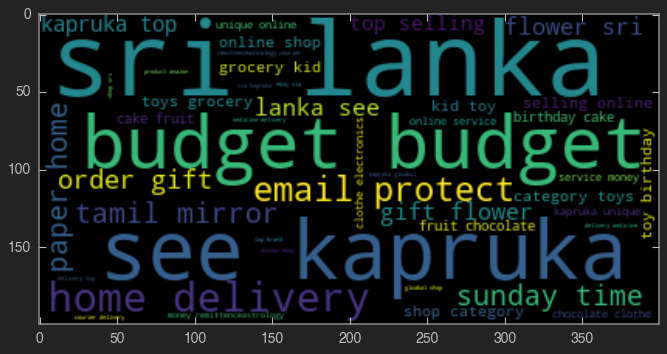

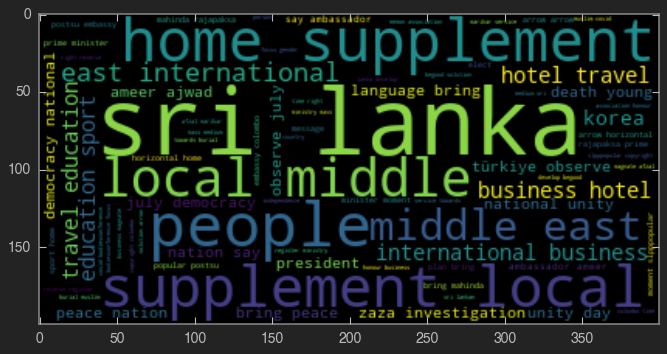

In [28]:
num_clusters_tfidf = 7

# Call the above function to get clusters and assign the cluster labels to the movies
km_obj, clusters = k_means(feature_matrix=X_tfidf, num_clusters=num_clusters_tfidf)

df_corpora['clusters_tfidf'] = clusters

# Analyse the k-means clustering data
cluster_data =  get_cluster_data(clustering_obj=km_obj,
                                 article_data=df_corpora,
                                 feature_names=feature_names_tfidf,
                                 num_clusters=num_clusters_tfidf,
                                 cluster_name = 'clusters_tfidf', topn_features=10)         

# Print the detailed clustering analysis results
print_cluster_data(cluster_data) 

In [29]:
# Check the dataframe
df_corpora.head(5)

Title  \
0   Two US banks collapse : What happened - NewsWire   
1  PUCSL chairman accuses Finance Ministry Sec of...   
2  Two, including PS officer, arrested over Canad...   
3  WATCH: Cheers erupt as rescuers save family af...   
4  Finland businessman slapped with $129,400 spee...   

                                                Body      Handle  \
0  skip content primary navigation menu menu home...  NewsWireLK   
1  skip content primary navigation menu menu home...  NewsWireLK   
2  skip content primary navigation menu menu home...  NewsWireLK   
3  skip content primary navigation menu menu home...  NewsWireLK   
4  skip content primary navigation menu menu home...  NewsWireLK   

                                              Tokens  Token Count  \
0  ['skip', 'content', 'primary', 'navigation', '...          988   
1  ['skip', 'content', 'primary', 'navigation', '...          432   
2  ['skip', 'content', 'primary', 'navigation', '...          349   
3  ['skip', 'content', 'primary', 'navigation', '...          280   
4  ['skip', 'content', 'primary', 'navigation', '...          512   

                                     cleaned_article  clusters_bow  \
0  skip content primary navigation menu menu home...             2   
1  skip content primary navigation menu menu home...             2   
2  skip content primary navigation menu menu home...             2   
3  skip content primary navigation menu menu home...             2   
4  skip content primary navigation menu menu home...             2   

   clusters_bow_bi  clusters_tfidf  
0                3               0  
1                3               4  
2                3               4  
3                3               4  
4                3               4

---------------------------------
Optimal clusters using Silhouette
---------------------------------


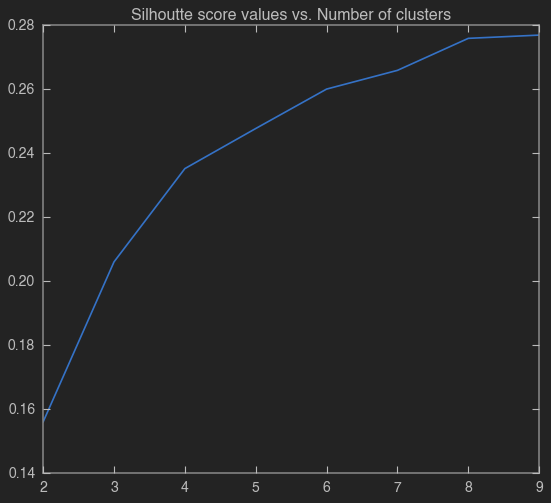

-----------------------------------
Optimal clusters using Elbow method
----------------------------------


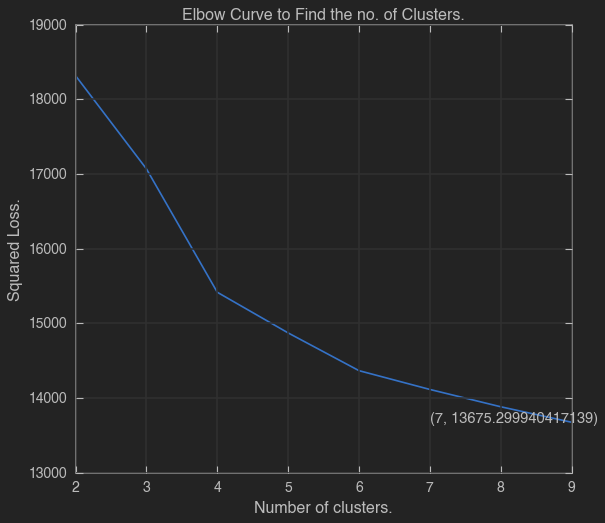

In [30]:
# Get clusters using Tfidf bigram extractor
vectorizer_tfidf_bi, X_tfidf_bi = tfidf_extractor_bigrams(df_corpora_list)
feature_names_tfidf_bi = vectorizer_tfidf_bi.get_feature_names_out()

# Identify the optimal clusters using silhouette for count-vectorizer
print('---------------------------------')
print('Optimal clusters using Silhouette')
print('---------------------------------')
find_optimal_clusters_using_silhouette_method(X_tfidf_bi, 9)
# Identify the optimal clusters using elbow for count-vectorizer
print('-----------------------------------')
print('Optimal clusters using Elbow method')
print('----------------------------------')
find_optimal_clusters_using_elbow_method(X_tfidf_bi, 9)

According to the intrinsic evaluation techniques mentioned above, Elbow method has a better/steep curve on 3,4,6 and 7 while the Silhouette method shows the maximum value at 9. Furthermore, the Silhoutte method shows a peak at 6 and 8 as well. Therefore, 6 has been identified as the optimal cluster using Tf-idf Vectorizer with bi-grams.

Cluster 0 details:
--------------------
Key features: ['block detail', 'website firewall', 'python request', 'error please', 'error please open', 'net access', 'net access deny', 'site owner manage', 'site please', 'site please whitelist']
Cluster 1 details:
--------------------
Key features: ['finance today', 'sport finance today', 'news focus', 'sport finance', 'ceylon today', 'gosl public corporation', 'gosl public', 'public corporation', 'billion billion', 'private sector']
Cluster 2 details:
--------------------
Key features: ['see kapruka', 'budget budget', 'sri lanka', 'budget budget budget', 'home delivery', 'get product', 'top brand', 'chocolate clothe electronics', 'money remittenceastrology courier', 'kid toy']
Cluster 3 details:
--------------------
Key features: ['digital marketing', 'continue read', 'sri lanka', 'wire biz', 'colombo law', 'colombo cricket carnival', 'colombo cricket', 'cricket carnival', 'first anniversary', 'watch sri lanka']
Cluster 4 details:
---------

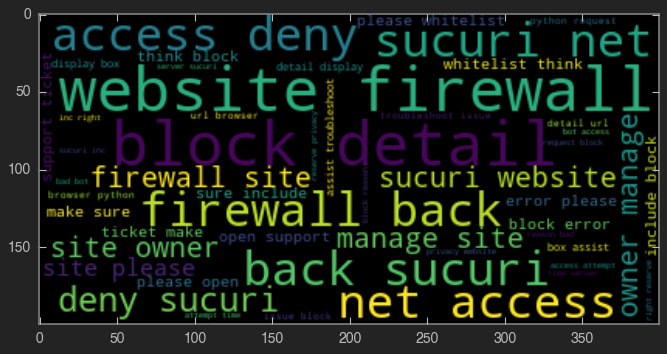

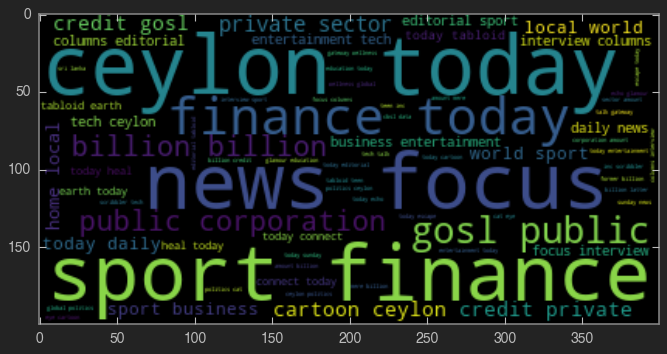

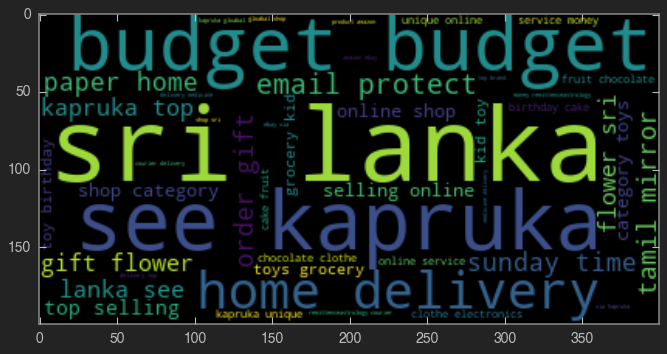

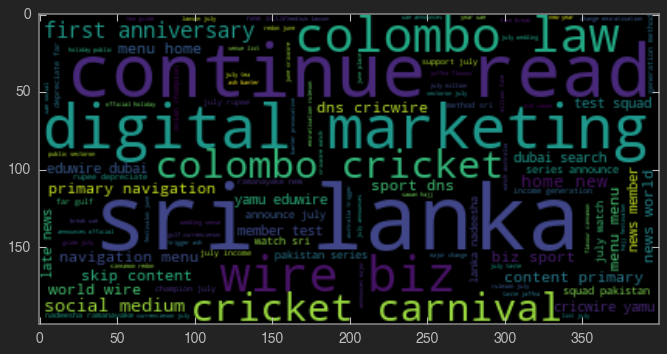

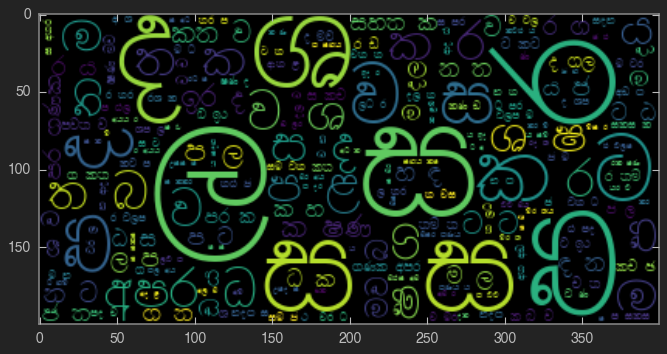

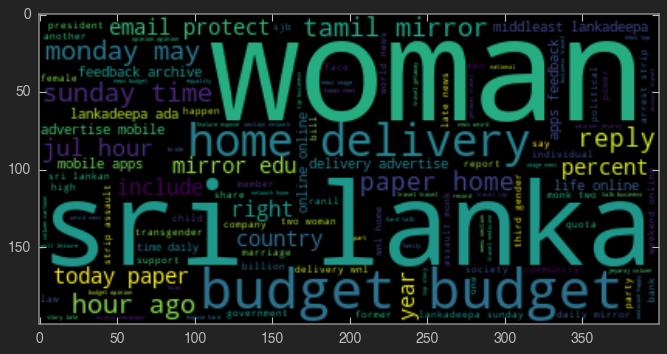

In [31]:
num_clusters_tfidf_bi = 6

# Call the above function to get clusters and assign the cluster labels to the movies
km_obj, clusters = k_means(feature_matrix=X_tfidf_bi, num_clusters=num_clusters_tfidf_bi)

df_corpora['clusters_tfidf_bi'] = clusters

# Analyse the k-means clustering data
cluster_data =  get_cluster_data(clustering_obj=km_obj,
                                 article_data=df_corpora,
                                 feature_names=feature_names_tfidf_bi,
                                 num_clusters=num_clusters_tfidf_bi,
                                 cluster_name = 'clusters_tfidf_bi', topn_features=10)         

# Print the detailed clustering analysis results
print_cluster_data(cluster_data) 

In [32]:
# Check the dataframe
df_corpora.head(5)

Title  \
0   Two US banks collapse : What happened - NewsWire   
1  PUCSL chairman accuses Finance Ministry Sec of...   
2  Two, including PS officer, arrested over Canad...   
3  WATCH: Cheers erupt as rescuers save family af...   
4  Finland businessman slapped with $129,400 spee...   

                                                Body      Handle  \
0  skip content primary navigation menu menu home...  NewsWireLK   
1  skip content primary navigation menu menu home...  NewsWireLK   
2  skip content primary navigation menu menu home...  NewsWireLK   
3  skip content primary navigation menu menu home...  NewsWireLK   
4  skip content primary navigation menu menu home...  NewsWireLK   

                                              Tokens  Token Count  \
0  ['skip', 'content', 'primary', 'navigation', '...          988   
1  ['skip', 'content', 'primary', 'navigation', '...          432   
2  ['skip', 'content', 'primary', 'navigation', '...          349   
3  ['skip', 'content', 'primary', 'navigation', '...          280   
4  ['skip', 'content', 'primary', 'navigation', '...          512   

                                     cleaned_article  clusters_bow  \
0  skip content primary navigation menu menu home...             2   
1  skip content primary navigation menu menu home...             2   
2  skip content primary navigation menu menu home...             2   
3  skip content primary navigation menu menu home...             2   
4  skip content primary navigation menu menu home...             2   

   clusters_bow_bi  clusters_tfidf  clusters_tfidf_bi  
0                3               0                  5  
1                3               4                  3  
2                3               4                  3  
3                3               4                  3  
4                3               4                  3

In [8]:
def print_dimensions(name, df):
    # Create an instance of PrettyTable
    table = PrettyTable()

    # Define table headers
    table.field_names = ["Method", "Dimensions"]    
    # Add rows
    table.add_row([name, df.shape])
    
    # Set table formatting options
    table.align = "l"    # Align text to the left
    table.border = True  # Add border to the table
    table.hrules = True  # Add horizontal rules between rows

    # Print the table
    print(table)    

In [108]:
# Dimensions of the sparse vectors

# BoW using Count Vectorizer
df_bow = pd.DataFrame(data = X_bow.toarray(), columns=feature_names_bow)
print_dimensions('BoW using Count Vectorizer', df_bow) 

+----------------------------+----------------+
| Method                     | Dimensions     |
+----------------------------+----------------+
| BoW using Count Vectorizer | (24178, 63890) |
+----------------------------+----------------+


In [109]:
# Count Vectorizer with bi-grams
df_bow_bi = pd.DataFrame(data = X_bow_bi.toarray(), columns=feature_names_bow_bi)
print_dimensions('BoW using Count Vectorizer with bi-grams', df_bow_bi)

+------------------------------------------+------------------+
| Method                                   | Dimensions       |
+------------------------------------------+------------------+
| BoW using Count Vectorizer with bi-grams | (24178, 3659418) |
+------------------------------------------+------------------+


In [110]:
# Tf-idf Vectorizer
df_tfidf = pd.DataFrame(data = X_tfidf.toarray(), columns=feature_names_tfidf)
print_dimensions('Tf-idf Vectorizer', df_tfidf)

+-------------------+----------------+
| Method            | Dimensions     |
+-------------------+----------------+
| Tf-idf Vectorizer | (24178, 63890) |
+-------------------+----------------+


In [111]:
# Tf-idf Vectorizer with bi-grams
df_tfidf_bi = pd.DataFrame(data = X_tfidf_bi.toarray(), columns=feature_names_tfidf_bi)
print_dimensions('Tf-idf Vectorizer with bi-grams', df_tfidf_bi)

+---------------------------------+------------------+
| Method                          | Dimensions       |
+---------------------------------+------------------+
| Tf-idf Vectorizer with bi-grams | (24178, 3659418) |
+---------------------------------+------------------+


### Step 4 - Get dense vector representations

In [78]:
# Select word2vec-google-news-300 from gensim
wv = api.load('word2vec-google-news-300')

In [79]:
# Get vector per article
def get_vector_per_article(sentence):
    words = sentence.split()
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    count = 1
    for word in words:
        if word in wv:
            count += 1
            wv_res += wv[word]
    wv_res = wv_res/count
    return wv_res

In [80]:
df_corpora['word2vec'] = df_corpora['cleaned_article'].apply(get_vector_per_article)

In [66]:
# Create a new word2vec model and use it
# Train, test split
X = df_corpora['cleaned_article']
y = df_corpora['Handle']
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [71]:
# Create a new vocab from our data set and use it to create a new word2vec model
tfidf_vectorizer, tfidf_train_features = tfidf_extractor(train_X)
tfidf_test_features = tfidf_vectorizer.transform(test_X)  

In [72]:
# Tokenize the text
tokenized_train_X = train_X.apply(lambda x: x.split())
tokenized_test_X = test_X.apply(lambda x: x.split())

In [73]:
# build word2vec model                   
model_word2vec = gensim.models.Word2Vec(tokenized_train_X,
                               vector_size=500,
                               window=100,
                               min_count=30,
                               sample=1e-3)  

In [74]:
wv = model_word2vec.wv
def get_vector_using_built_model(sentence):
    words = sentence.split()
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    count = 1
    for word in words:
        if word in wv:
            count += 1
            wv_res += wv[word]
    wv_res = wv_res/count
    return wv_res

In [ ]:
# Save the data in variables for future references
vocab = tfidf_vectorizer.vocabulary_
tfidf_wv_train_features = tfidf_weighted_averaged_word_vectorizer(corpus=tokenized_train_X, 
                                                                  tfidf_vectors=tfidf_train_features, 
                                                                  tfidf_vocabulary=vocab, 
                                                                  model=model_word2vec, 
                                                                  num_features=500)
tfidf_wv_test_features = tfidf_weighted_averaged_word_vectorizer(corpus=tokenized_test_X, 
                                                                 tfidf_vectors=tfidf_test_features, 
                                                                 tfidf_vocabulary=vocab, 
                                                                 model=model_word2vec, 
                                                                 num_features=500)

In [75]:
df_corpora['word2vec_new'] = df_corpora['cleaned_article'].apply(get_vector_using_built_model)

In [81]:
df_corpora.head(5)

Title  \
0   Two US banks collapse : What happened - NewsWire   
1  PUCSL chairman accuses Finance Ministry Sec of...   
2  Two, including PS officer, arrested over Canad...   
3  WATCH: Cheers erupt as rescuers save family af...   
4  Finland businessman slapped with $129,400 spee...   

                                                Body      Handle  \
0  skip content primary navigation menu menu home...  NewsWireLK   
1  skip content primary navigation menu menu home...  NewsWireLK   
2  skip content primary navigation menu menu home...  NewsWireLK   
3  skip content primary navigation menu menu home...  NewsWireLK   
4  skip content primary navigation menu menu home...  NewsWireLK   

                                              Tokens  Token Count  \
0  ['skip', 'content', 'primary', 'navigation', '...          988   
1  ['skip', 'content', 'primary', 'navigation', '...          432   
2  ['skip', 'content', 'primary', 'navigation', '...          349   
3  ['skip', 'content', 'primary', 'navigation', '...          280   
4  ['skip', 'content', 'primary', 'navigation', '...          512   

                                     cleaned_article  clusters_bow  \
0  skip content primary navigation menu menu home...             2   
1  skip content primary navigation menu menu home...             2   
2  skip content primary navigation menu menu home...             2   
3  skip content primary navigation menu menu home...             2   
4  skip content primary navigation menu menu home...             2   

   clusters_bow_bi  clusters_tfidf  clusters_tfidf_bi  \
0                3               0                  5   
1                3               4                  3   
2                3               4                  3   
3                3               4                  3   
4                3               4                  3   

                                            word2vec  \
0  [-0.020704481110628795, 0.016180814012264875, ...   
1  [-0.01602095018618952, -0.000507314369161293, ...   
2  [-0.015430077528342223, 0.012764863478831755, ...   
3  [-0.01711795244558874, 0.016818933752903425, -...   
4  [0.010281648391332382, 0.015116134260454748, 0...   

                                        word2vec_new  
0  [-0.004629349071418522, 0.2781574562833859, -0...  
1  [0.16979181444129118, 0.1549046617847952, -0.0...  
2  [-0.012253436871022413, 0.10862737350475395, -...  
3  [0.014099615139661363, 0.21692110435023002, -0...  
4  [-0.04422492969864697, 0.36606131021564664, -0...

### Step 5 - Save the file with cluster labels and dense vector representations

In [82]:
# Save the file
df_corpora.to_csv(DF_CORPORA, index=False)

In [83]:
# Load the data and check
df_corpora = pd.read_csv(DF_CORPORA)
df_corpora.head(5)

Title  \
0   Two US banks collapse : What happened - NewsWire   
1  PUCSL chairman accuses Finance Ministry Sec of...   
2  Two, including PS officer, arrested over Canad...   
3  WATCH: Cheers erupt as rescuers save family af...   
4  Finland businessman slapped with $129,400 spee...   

                                                Body      Handle  \
0  skip content primary navigation menu menu home...  NewsWireLK   
1  skip content primary navigation menu menu home...  NewsWireLK   
2  skip content primary navigation menu menu home...  NewsWireLK   
3  skip content primary navigation menu menu home...  NewsWireLK   
4  skip content primary navigation menu menu home...  NewsWireLK   

                                              Tokens  Token Count  \
0  ['skip', 'content', 'primary', 'navigation', '...          988   
1  ['skip', 'content', 'primary', 'navigation', '...          432   
2  ['skip', 'content', 'primary', 'navigation', '...          349   
3  ['skip', 'content', 'primary', 'navigation', '...          280   
4  ['skip', 'content', 'primary', 'navigation', '...          512   

                                     cleaned_article  clusters_bow  \
0  skip content primary navigation menu menu home...             2   
1  skip content primary navigation menu menu home...             2   
2  skip content primary navigation menu menu home...             2   
3  skip content primary navigation menu menu home...             2   
4  skip content primary navigation menu menu home...             2   

   clusters_bow_bi  clusters_tfidf  clusters_tfidf_bi  \
0                3               0                  5   
1                3               4                  3   
2                3               4                  3   
3                3               4                  3   
4                3               4                  3   

                                            word2vec  \
0  [-0.02070448  0.01618081 -0.00454265  0.079106...   
1  [-0.01602095 -0.00050731  0.00296649  0.039250...   
2  [-0.01543008  0.01276486 -0.0232593   0.058916...   
3  [-0.01711795  0.01681893 -0.02626142  0.088794...   
4  [ 0.01028165  0.01511613  0.01285537  0.058701...   

                                        word2vec_new  
0  [-4.62934907e-03  2.78157456e-01 -1.47573346e-...  
1  [ 0.16979181  0.15490466 -0.00758686 -0.375852...  
2  [-1.22534369e-02  1.08627374e-01 -2.75426180e-...  
3  [ 1.40996151e-02  2.16921104e-01 -2.27266004e-...  
4  [-4.42249297e-02  3.66061310e-01 -2.54592068e-...

# Question D

## Train classifiers with the two (02) representations above using three (03) non-deep learning algorithms, stating your reasons for selecting each algorithm. Compare and contrast the performance of each of the classifiers.

### Answer
    
Here, we are using the following as non-deep learning algorithms.

1. Logistic Regression
2. Support Vector Machines
3. Random Forest Classifier

The reasons for using each classifier is mentioned below.

### Logistic Regression

- Logistic regression is simple and easy to undertand. Furthermore, it gives interpretable results.
- Logisitc regression is one of the defacto methods when it comes to binray and multiclass classification(we are also doing a multiclass classification).
- Logistic regression models produce probabilities as outputs, and these are useful for making cofidence based decisions and setting thresholds.
- Logistic regression models are computationally efficient and can be trained quickly.

### Support Vector Machines(SVM)

- SVMs perform well in high dimensional spaces such as text-classification and image recognition tasks.
- Since SVMs have a regularization parameter, they are robust to overfitting.
- Since SVMs support both linearly separable and inseparable data, they are versatile in kernal functions.
- SVMs aim to find the global optimal hyperplane that maximizes the margenes between the classes.

### Random Forest Classifier

- Random forests generally gives highly accurate values.
- They are robust to overfitting as well as outliers which enhances the performance of the classifier.
- Random forests are not sensitive to feature scaling, therefore we do not hav to worry about normalizing or standardizing features before training the model.

The following sections of the code contains, the above three classifiers used with, sparse and dense vectors with regards to twitter handles and the clusters that we found via, elbow and sillhoutte methods. The **performance** for each section can be found in the outputs of the below code.
   
    
##### Compare and contrast of results

- As per the outputs, it is notable that Logistic Regression yields the best results, but it is possbile that there is overfitting involved with the Logistic Regression as well. 
- Therefore, looking at the classifiers, SVMs and Random Forest classifiers give similar and considrable results. This is because they are robust to overfittings.

In [90]:
# Define a function to calculate the metrices
def calculate_metrices(true_labels, predicted_labels):
    # Create an instance of PrettyTable
    table = PrettyTable()

    # Define table headers
    table.field_names = ["Metric", "Value"]    
    # Add rows
    table.add_row(['Accuracy', np.round(accuracy_score(true_labels, predicted_labels),5)])
    table.add_row(['Precision', np.round(precision_score(true_labels, predicted_labels ,average='weighted'), 5)])
    table.add_row(['Recall', np.round(recall_score(true_labels, predicted_labels ,average='weighted'), 5)])
    table.add_row(['F1 Score', np.round(f1_score(true_labels, predicted_labels ,average='weighted'),5)])
    
    # Set table formatting options
    table.align = "l"    # Align text to the left
    table.border = True  # Add border to the table
    table.hrules = True  # Add horizontal rules between rows

    # Print the table
    print(table)

# Predict and evaluate model
def predict_and_evaluate_model(classifier, train_X, train_labels, test_X, test_labels):
    # fit the model
    classifier.fit(train_X, train_labels)
    # predict using the model
    predictions = classifier.predict(test_X)
    # Evaluate performance
    calculate_metrices(true_labels = test_labels, predicted_labels = predictions)
    # Return predictions
    return predictions

## Create Classifier Objects

In [84]:
lr = LogisticRegression()
svm = SGDClassifier(loss='hinge')
rfc = RandomForestClassifier(criterion = 'gini', max_depth = 8, min_samples_split = 10, random_state = 5)

## Train and test models using sparse vectorizers

### BoW using Count Vectorizer

In [188]:
# Training based on the clusters created with the KMeans algorithm and the tweet handles - BoW using Count Vectorizer
X = df_corpora['cleaned_article'] # the features we want to analyze
ylabels = df_corpora['clusters_bow'] # the labels, or answers, we want to test against. These are the cluster labels for BoW Count Vectorizer.
y_labels = df_corpora['Handle'] # the second set of labels, or answers, we want to test against, these are tweet handles.

#### With clusters_bow (y_labels)

In [189]:
# First, train the data with cluster labels
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2 ,stratify=ylabels)

In [190]:
# Get train and test vectors
X_train_vectors= vectorizer_bow.fit_transform(X_train)
X_test_vectors= vectorizer_bow.transform(X_test)

In [191]:
# Shape of X_train_vectors and X_test_vectors
print(f"X_train_vectors shape - {X_train_vectors.shape}")
print(f"X_test_vectors shape - {X_test_vectors.shape}")

X_train_vectors shape - (18121, 57742)
X_test_vectors shape - (4531, 57742)


In [192]:
# Predict and evaluate model
print('\n==========Logistic Regression==========')
lr_bow_predictions = predict_and_evaluate_model(lr, X_train_vectors, y_train, X_test_vectors, y_test)
print('\n==========Random Forest Classifer==========')
rfc_bow_predictions = predict_and_evaluate_model(rfc, X_train_vectors, y_train, X_test_vectors, y_test)
print('\n==========Support Vector Machines==========')
svm_bow_predictions = predict_and_evaluate_model(svm, X_train_vectors, y_train, X_test_vectors, y_test)


==========Logistic Regression==========
+-----------+-------+
| Metric    | Value |
+-----------+-------+
| Accuracy  | 1.0   |
+-----------+-------+
| Precision | 1.0   |
+-----------+-------+
| Recall    | 1.0   |
+-----------+-------+
| F1 Score  | 1.0   |
+-----------+-------+

==========Random Forest Classifer==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.99801 |
+-----------+---------+
| Precision | 0.99802 |
+-----------+---------+
| Recall    | 0.99801 |
+-----------+---------+
| F1 Score  | 0.99801 |
+-----------+---------+

==========Support Vector Machines==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.99956 |
+-----------+---------+
| Precision | 0.99956 |
+-----------+---------+
| Recall    | 0.99956 |
+-----------+---------+
| F1 Score  | 0.99956 |
+-----------+---------+


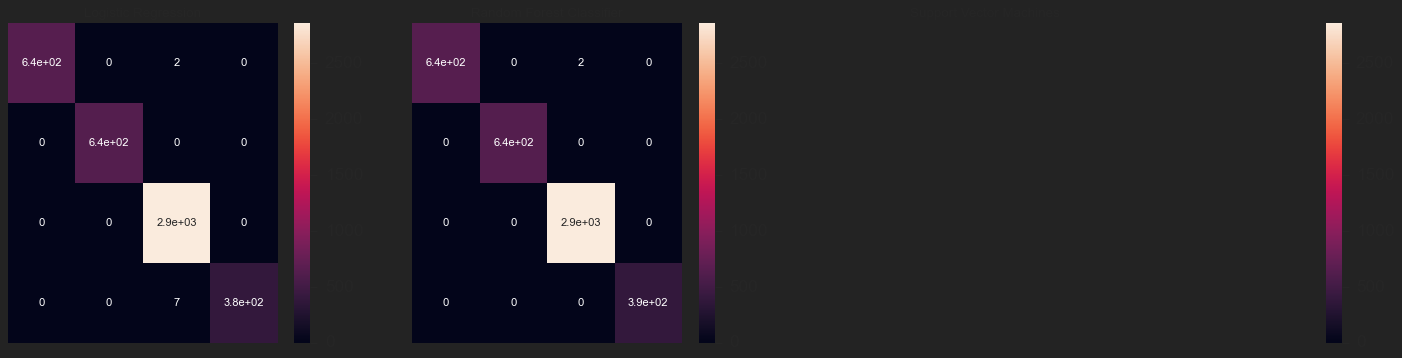

In [193]:
# Get the confusion matrices

# Logistic Regression
cm_lr_bow = confusion_matrix(y_test, lr_bow_predictions)
plt.figure(figsize=(25,5))
sns.set(font_scale=1.4)
sns.heatmap(cm_lr_bow, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,1)
plt.title("Logistic Regression", fontsize = 12)
plt.axis("off")

# Random Forest Classifier
cm_rfc_bow = confusion_matrix(y_test, rfc_bow_predictions)
sns.set(font_scale=1.4)
sns.heatmap(cm_rfc_bow, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,2)
plt.title("Random Forest Classifier", fontsize = 12)
plt.axis("off")

# Support Vector Machines
cm_svm_bow = confusion_matrix(y_test, svm_bow_predictions)
sns.set(font_scale=1.4)
sns.heatmap(cm_svm_bow, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,3)
plt.title("Support Vector Machines", fontsize = 12)
plt.axis("off")

plt.show()

#### With Handle (y_labels)

In [194]:
# First, train the data with handles
X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.2 ,stratify=y_labels)

In [195]:
# Get train and test vectors
X_train_vectors= vectorizer_bow.fit_transform(X_train)
X_test_vectors= vectorizer_bow.transform(X_test)

In [196]:
# Shape of X_train_vectors and X_test_vectors
print(f"X_train_vectors shape - {X_train_vectors.shape}")
print(f"X_test_vectors shape - {X_test_vectors.shape}")

X_train_vectors shape - (18121, 57782)
X_test_vectors shape - (4531, 57782)


In [197]:
# Predict and evaluate model
print('\n==========Logistic Regression==========')
lr_bow_predictions = predict_and_evaluate_model(lr, X_train_vectors, y_train, X_test_vectors, y_test)
print('\n==========Random Forest Classifier==========')
rfc_bow_predictions = predict_and_evaluate_model(rfc, X_train_vectors, y_train, X_test_vectors, y_test)
print('\n==========Support Vector Machines==========')
svm_bow_predictions = predict_and_evaluate_model(svm, X_train_vectors, y_train, X_test_vectors, y_test)


==========Logistic Regression==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.94173 |
+-----------+---------+
| Precision | 0.94484 |
+-----------+---------+
| Recall    | 0.94173 |
+-----------+---------+
| F1 Score  | 0.93997 |
+-----------+---------+

==========Random Forest Classifier==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.91216 |
+-----------+---------+
| Precision | 0.91675 |
+-----------+---------+
| Recall    | 0.91216 |
+-----------+---------+
| F1 Score  | 0.89197 |
+-----------+---------+

==========Support Vector Machines==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.90488 |
+-----------+---------+
| Precision | 0.94562 |
+-----------+---------+
| Recall    | 0.90488 |
+-----------+---------+
| F1 Score  | 0.88734 |
+-----------+---------+


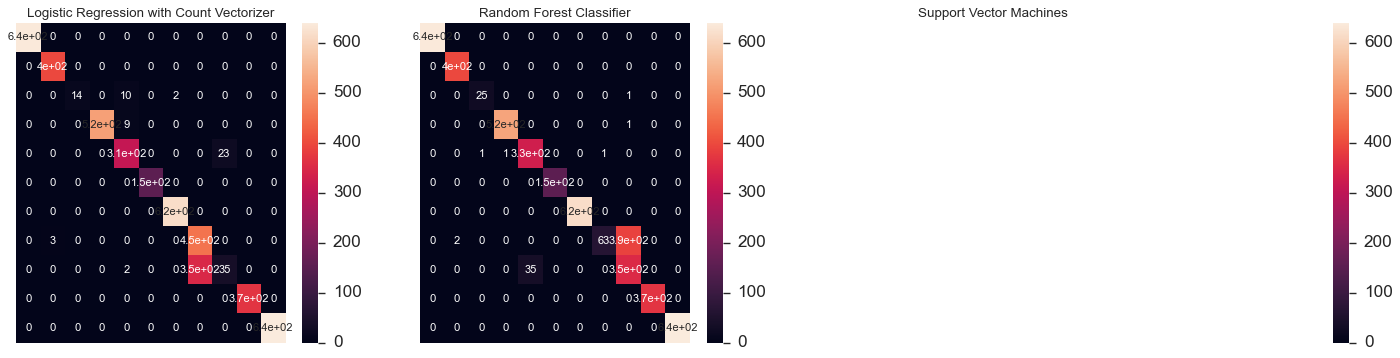

In [198]:
# Get the confusion matrices

# Logistic Regression
cm_lr_bow = confusion_matrix(y_test, lr_bow_predictions)
plt.figure(figsize=(25,5))
sns.set(font_scale=1.4)
sns.heatmap(cm_lr_bow, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,1)
plt.title("Logistic Regression with Count Vectorizer", fontsize = 12)
plt.axis("off")

# Random Forest Classifier
cm_rfc_bow = confusion_matrix(y_test, rfc_bow_predictions)
sns.set(font_scale=1.4)
sns.heatmap(cm_rfc_bow, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,2)
plt.title("Random Forest Classifier", fontsize = 12)
plt.axis("off")

# Support Vector Machines
cm_svm_bow = confusion_matrix(y_test, svm_bow_predictions)
sns.set(font_scale=1.4)
sns.heatmap(cm_svm_bow, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,3)
plt.title("Support Vector Machines", fontsize = 12)
plt.axis("off")

plt.show()

### BoW using Count Vectorizer with bi-grams

In [199]:
# Training based on the clusters created with the KMeans algorithm and the tweet handles - Count Vectorizer with bi-grams
X = df_corpora['cleaned_article'] # the features we want to analyze
ylabels = df_corpora['clusters_bow_bi'] # the labels, or answers, we want to test against. These are the cluster labels for Count Vectorizer with bi-grams.
y_labels = df_corpora['Handle'] # the second set of labels, or answers, we want to test against, these are tweet handles.

#### With clusters_bow (y_labels)

In [200]:
# First, train the data with cluster labels
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2 ,stratify=ylabels)

In [201]:
# Get train and test vectors
X_train_vectors= vectorizer_bow_bi.fit_transform(X_train)
X_test_vectors= vectorizer_bow_bi.transform(X_test)

In [202]:
# Shape of X_train_vectors and X_test_vectors
print(f"X_train_vectors shape - {X_train_vectors.shape}")
print(f"X_test_vectors shape - {X_test_vectors.shape}")

X_train_vectors shape - (18121, 3041608)
X_test_vectors shape - (4531, 3041608)


In [203]:
# Predict and evaluate model
print('\n==========Logistic Regression==========')
lr_bow_bi_predictions = predict_and_evaluate_model(lr, X_train_vectors, y_train, X_test_vectors, y_test)
print('\n==========Random Forest Classifier==========')
rfc_bow_bi_predictions = predict_and_evaluate_model(rfc, X_train_vectors, y_train, X_test_vectors, y_test)
print('\n==========Support Vector Machines==========')
svm_bow_bi_predictions = predict_and_evaluate_model(svm, X_train_vectors, y_train, X_test_vectors, y_test)


==========Logistic Regression==========
+-----------+-------+
| Metric    | Value |
+-----------+-------+
| Accuracy  | 1.0   |
+-----------+-------+
| Precision | 1.0   |
+-----------+-------+
| Recall    | 1.0   |
+-----------+-------+
| F1 Score  | 1.0   |
+-----------+-------+

==========Random Forest Classifier==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.99934 |
+-----------+---------+
| Precision | 0.99934 |
+-----------+---------+
| Recall    | 0.99934 |
+-----------+---------+
| F1 Score  | 0.99934 |
+-----------+---------+

==========Support Vector Machines==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.99978 |
+-----------+---------+
| Precision | 0.99978 |
+-----------+---------+
| Recall    | 0.99978 |
+-----------+---------+
| F1 Score  | 0.99978 |
+-----------+---------+


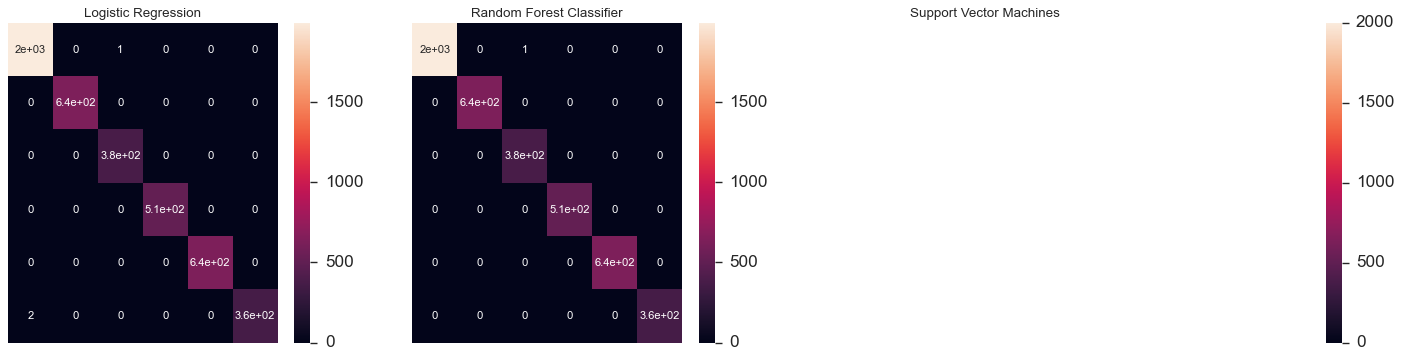

In [204]:
# Get the confusion matrices

# Logistic Regression
cm_lr_bow_bi = confusion_matrix(y_test, lr_bow_bi_predictions)
plt.figure(figsize=(25,5))
sns.set(font_scale=1.4)
sns.heatmap(cm_lr_bow_bi, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,1)
plt.title("Logistic Regression", fontsize = 12)
plt.axis("off")

# Random Forest Classifier
cm_rfc_bow_bi = confusion_matrix(y_test, rfc_bow_bi_predictions)
sns.set(font_scale=1.4)
sns.heatmap(cm_rfc_bow_bi, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,2)
plt.title("Random Forest Classifier", fontsize = 12)
plt.axis("off")

# Support Vector Machines
cm_svm_bow_bi = confusion_matrix(y_test, svm_bow_bi_predictions)
sns.set(font_scale=1.4)
sns.heatmap(cm_svm_bow_bi, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,3)
plt.title("Support Vector Machines", fontsize = 12)
plt.axis("off")

plt.show()

#### With Handle (y_labels)

In [205]:
# First, train the data with cluster labels
X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.2, stratify=y_labels)

In [206]:
# Get train and test vectors
X_train_vectors= vectorizer_bow_bi.fit_transform(X_train)
X_test_vectors= vectorizer_bow_bi.transform(X_test)

In [207]:
# Shape of X_train_vectors and X_test_vectors
print(f"X_train_vectors shape - {X_train_vectors.shape}")
print(f"X_test_vectors shape - {X_test_vectors.shape}")

X_train_vectors shape - (18121, 3031665)
X_test_vectors shape - (4531, 3031665)


In [208]:
# Predict and evaluate model
print('\n==========Logistic Regression==========')
lr_bow_bi_predictions = predict_and_evaluate_model(lr, X_train_vectors, y_train, X_test_vectors, y_test)
print('\n==========Random Forest Classifier==========')
rfc_bow_bi_predictions = predict_and_evaluate_model(rfc, X_train_vectors, y_train, X_test_vectors, y_test)
print('\n==========Support Vector Machines==========')
svm_bow_bi_predictions = predict_and_evaluate_model(svm, X_train_vectors, y_train, X_test_vectors, y_test)


==========Logistic Regression==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.94262 |
+-----------+---------+
| Precision | 0.94667 |
+-----------+---------+
| Recall    | 0.94262 |
+-----------+---------+
| F1 Score  | 0.94026 |
+-----------+---------+

==========Random Forest Classifier==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.90554 |
+-----------+---------+
| Precision | 0.85637 |
+-----------+---------+
| Recall    | 0.90554 |
+-----------+---------+
| F1 Score  | 0.87434 |
+-----------+---------+

==========Support Vector Machines==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.94196 |
+-----------+---------+
| Precision | 0.94635 |
+-----------+---------+
| Recall    | 0.94196 |
+-----------+---------+
| F1 Score  | 0.93698 |
+-----------+---------+


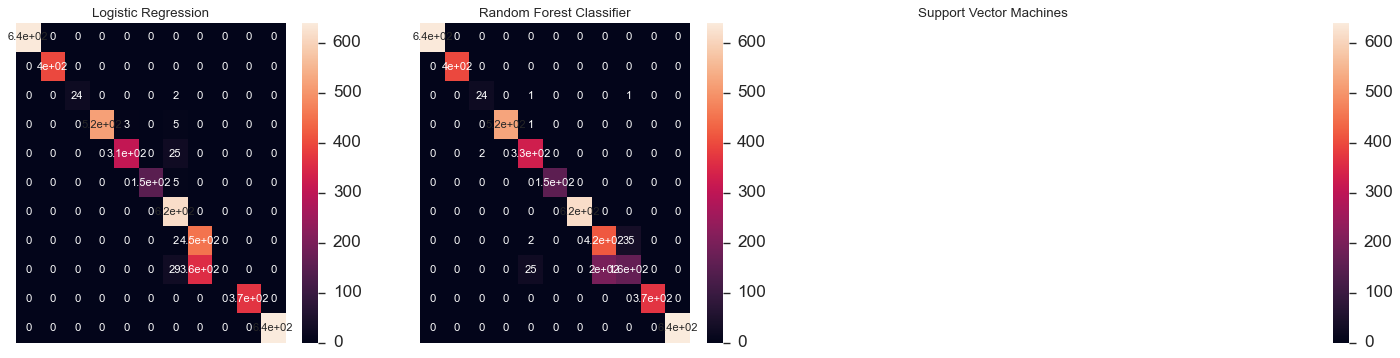

In [209]:
# Get the confusion matrices

# Logistic Regression
cm_lr_bow_bi = confusion_matrix(y_test, lr_bow_bi_predictions)
plt.figure(figsize=(25,5))
sns.set(font_scale=1.4)
sns.heatmap(cm_lr_bow_bi, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,1)
plt.title("Logistic Regression", fontsize = 12)
plt.axis("off")

# Random Forest Classifier
cm_rfc_bow_bi = confusion_matrix(y_test, rfc_bow_bi_predictions)
sns.set(font_scale=1.4)
sns.heatmap(cm_rfc_bow_bi, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,2)
plt.title("Random Forest Classifier", fontsize = 12)
plt.axis("off")

# Support Vector Machines
cm_svm_bow_bi = confusion_matrix(y_test, svm_bow_bi_predictions)
sns.set(font_scale=1.4)
sns.heatmap(cm_svm_bow_bi, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,3)
plt.title("Support Vector Machines", fontsize = 12)
plt.axis("off")

plt.show()

### Tf-idf Vectorizer

In [210]:
# Training based on the clusters created with the KMeans algorithm and the tweet handles - Tf-idf Vectorizer
X = df_corpora['cleaned_article'] # the features we want to analyze
ylabels = df_corpora['clusters_tfidf'] # the labels, or answers, we want to test against. These are the cluster labels for Tf-idf Vectorizer.
y_labels = df_corpora['Handle'] # the second set of labels, or answers, we want to test against, these are tweet handles.

#### With clusters_bow (y_abels)}

In [211]:
# First, train the data with cluster labels
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, stratify=ylabels)

In [212]:
# Get train and test vectors
X_train_vectors= vectorizer_tfidf.fit_transform(X_train)
X_test_vectors= vectorizer_tfidf.transform(X_test)

In [213]:
# Shape of X_train_vectors and X_test_vectors
print(f"X_train_vectors shape - {X_train_vectors.shape}")
print(f"X_test_vectors shape - {X_test_vectors.shape}")

X_train_vectors shape - (18121, 57506)
X_test_vectors shape - (4531, 57506)


In [214]:
# Predict and evaluate model
print('\n==========Logistic Regression==========')
lr_tfidf_predictions = predict_and_evaluate_model(lr, X_train_vectors, y_train, X_test_vectors, y_test)
print('\n==========Random Forest Classifier==========')
rfc_tfidf_predictions = predict_and_evaluate_model(rfc, X_train_vectors, y_train, X_test_vectors, y_test)
print('\n==========Support Vector Machines==========')
svm_tfidf_predictions = predict_and_evaluate_model(svm, X_train_vectors, y_train, X_test_vectors, y_test)


==========Logistic Regression==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.99735 |
+-----------+---------+
| Precision | 0.99738 |
+-----------+---------+
| Recall    | 0.99735 |
+-----------+---------+
| F1 Score  | 0.99735 |
+-----------+---------+

==========Random Forest Classifier==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.99625 |
+-----------+---------+
| Precision | 0.99626 |
+-----------+---------+
| Recall    | 0.99625 |
+-----------+---------+
| F1 Score  | 0.99624 |
+-----------+---------+

==========Support Vector Machines==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.99316 |
+-----------+---------+
| Precision | 0.99329 |
+-----------+---------+
| Recall    | 0.99316 |
+-----------+---------+
| F1 Score  | 0.99315 |
+-----------+---------+


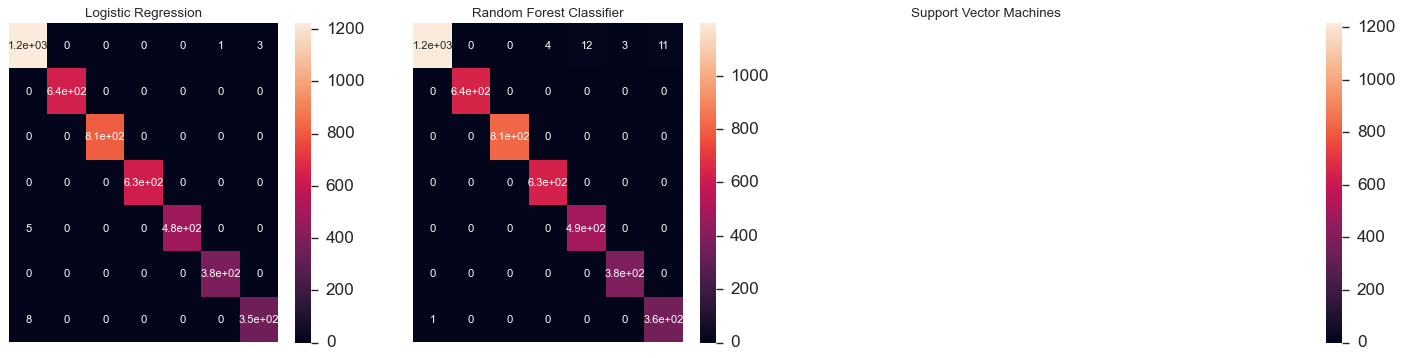

In [215]:
# Get the confusion matrices

# Logistic Regression
cm_lr_tfidf = confusion_matrix(y_test, lr_tfidf_predictions)
plt.figure(figsize=(25,5))
sns.set(font_scale=1.4)
sns.heatmap(cm_lr_tfidf, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,1)
plt.title("Logistic Regression", fontsize = 12)
plt.axis("off")

# Random Forest Classifier
cm_rfc_tfidf = confusion_matrix(y_test, rfc_tfidf_predictions)
sns.set(font_scale=1.4)
sns.heatmap(cm_rfc_tfidf, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,2)
plt.title("Random Forest Classifier", fontsize = 12)
plt.axis("off")

# Support Vector Machines
cm_svm_tfidf = confusion_matrix(y_test, svm_tfidf_predictions)
sns.set(font_scale=1.4)
sns.heatmap(cm_svm_tfidf, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,3)
plt.title("Support Vector Machines", fontsize = 12)
plt.axis("off")

plt.show()

#### With Handle (y_labels)

In [216]:
# First, train the data with cluster labels
X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.2, stratify=y_labels)

In [217]:
# Get train and test vectors
X_train_vectors= vectorizer_tfidf.fit_transform(X_train)
X_test_vectors= vectorizer_tfidf.transform(X_test)

In [218]:
# Shape of X_train_vectors and X_test_vectors
print(f"X_train_vectors shape - {X_train_vectors.shape}")
print(f"X_test_vectors shape - {X_test_vectors.shape}")

X_train_vectors shape - (18121, 57474)
X_test_vectors shape - (4531, 57474)


In [219]:
# Predict and evaluate model
print('\n==========Logistic Regression==========')
lr_tfidf_predictions = predict_and_evaluate_model(lr, X_train_vectors, y_train, X_test_vectors, y_test)
print('\n==========Random Forest Classifier==========')
rfc_tfidf_predictions = predict_and_evaluate_model(rfc, X_train_vectors, y_train, X_test_vectors, y_test)
print('\n==========Support Vector Machines==========')
svm_tfidf_predictions = predict_and_evaluate_model(svm, X_train_vectors, y_train, X_test_vectors, y_test)


==========Logistic Regression==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.93842 |
+-----------+---------+
| Precision | 0.94216 |
+-----------+---------+
| Recall    | 0.93842 |
+-----------+---------+
| F1 Score  | 0.93593 |
+-----------+---------+

==========Random Forest Classifier==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.93224 |
+-----------+---------+
| Precision | 0.93617 |
+-----------+---------+
| Recall    | 0.93224 |
+-----------+---------+
| F1 Score  | 0.92873 |
+-----------+---------+

==========Support Vector Machines==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.93931 |
+-----------+---------+
| Precision | 0.94303 |
+-----------+---------+
| Recall    | 0.93931 |
+-----------+---------+
| F1 Score  | 0.93682 |
+-----------+---------+


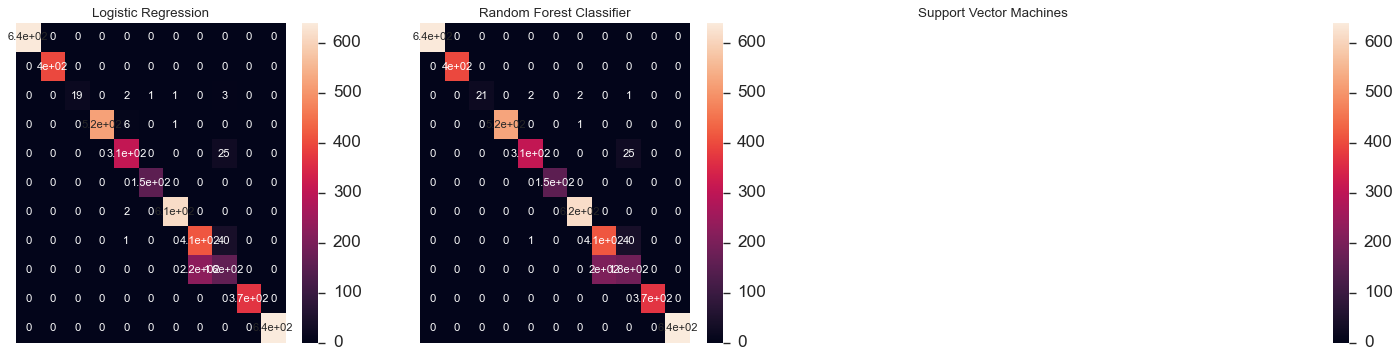

In [220]:
# Get the confusion matrices

# Logistic Regression
cm_lr_tfidf = confusion_matrix(y_test, lr_tfidf_predictions)
plt.figure(figsize=(25,5))
sns.set(font_scale=1.4)
sns.heatmap(cm_lr_tfidf, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,1)
plt.title("Logistic Regression", fontsize = 12)
plt.axis("off")

# Random Forest Classifier
cm_rfc_tfidf = confusion_matrix(y_test, rfc_tfidf_predictions)
sns.set(font_scale=1.4)
sns.heatmap(cm_rfc_tfidf, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,2)
plt.title("Random Forest Classifier", fontsize = 12)
plt.axis("off")

# Support Vector Machines
cm_svm_tfidf = confusion_matrix(y_test, svm_tfidf_predictions)
sns.set(font_scale=1.4)
sns.heatmap(cm_svm_tfidf, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,3)
plt.title("Support Vector Machines", fontsize = 12)
plt.axis("off")

plt.show()

### Tf-idf Vectorizer with bi-grams

In [221]:
# Training based on the clusters created with the KMeans algorithm and the tweet handles - Tf-idf Vectorizer with bi-grams
X = df_corpora['cleaned_article'] # the features we want to analyze
ylabels = df_corpora['clusters_tfidf_bi'] # the labels, or answers, we want to test against. These are the cluster labels for Tf-idf Vectorizer with bi-grams.
y_labels = df_corpora['Handle'] # the second set of labels, or answers, we want to test against, these are tweet handles.

#### With clusters_bow (y_labels)

In [222]:
# First, train the data with cluster labels
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, stratify=ylabels)

In [223]:
# Get train and test vectors
X_train_vectors= vectorizer_tfidf_bi.fit_transform(X_train)
X_test_vectors= vectorizer_tfidf_bi.transform(X_test)

In [224]:
# Shape of X_train_vectors and X_test_vectors
print(f"X_train_vectors shape - {X_train_vectors.shape}")
print(f"X_test_vectors shape - {X_test_vectors.shape}")

X_train_vectors shape - (18121, 3041318)
X_test_vectors shape - (4531, 3041318)


In [225]:
# Predict and evaluate model
print('\n==========Logistic Regression==========')
lr_tfidf_bi_predictions = predict_and_evaluate_model(lr, X_train_vectors, y_train, X_test_vectors, y_test)
print('\n==========Random Forest Classifier==========')
rfc_tfidf_bi_predictions = predict_and_evaluate_model(rfc, X_train_vectors, y_train, X_test_vectors, y_test)
print('\n==========Support Vector Machines==========')
svm_tfidf_bi_predictions = predict_and_evaluate_model(svm, X_train_vectors, y_train, X_test_vectors, y_test)


==========Logistic Regression==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.98874 |
+-----------+---------+
| Precision | 0.98916 |
+-----------+---------+
| Recall    | 0.98874 |
+-----------+---------+
| F1 Score  | 0.98876 |
+-----------+---------+

==========Random Forest Classifier==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.99007 |
+-----------+---------+
| Precision | 0.99038 |
+-----------+---------+
| Recall    | 0.99007 |
+-----------+---------+
| F1 Score  | 0.99008 |
+-----------+---------+

==========Support Vector Machines==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.98764 |
+-----------+---------+
| Precision | 0.98815 |
+-----------+---------+
| Recall    | 0.98764 |
+-----------+---------+
| F1 Score  | 0.98766 |
+-----------+---------+


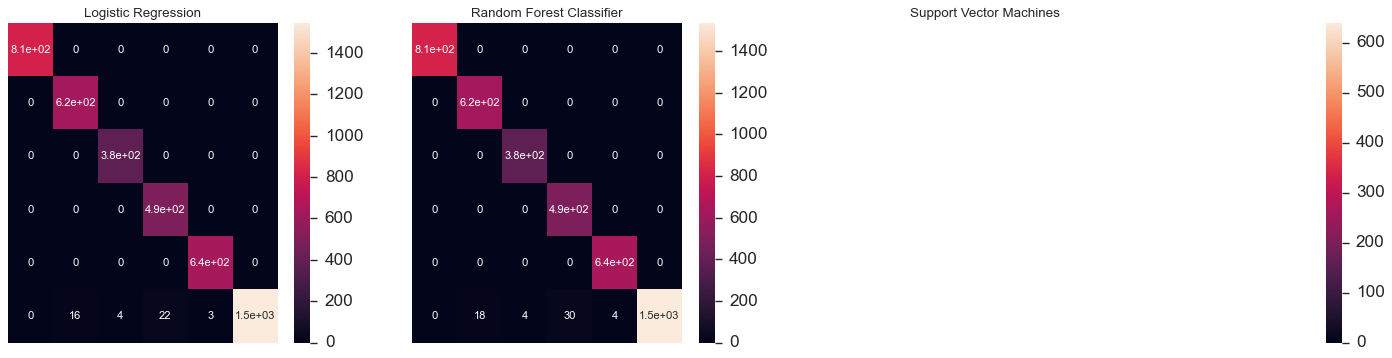

In [226]:
# Get the confusion matrices

# Logistic Regression
cm_lr_tfidf_bi = confusion_matrix(y_test, lr_tfidf_bi_predictions)
plt.figure(figsize=(25,5))
sns.set(font_scale=1.4)
sns.heatmap(cm_lr_bow_bi, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,1)
plt.title("Logistic Regression", fontsize = 12)
plt.axis("off")

# Random Forest Classifier
cm_rfc_tfidf_bi = confusion_matrix(y_test, rfc_tfidf_bi_predictions)
sns.set(font_scale=1.4)
sns.heatmap(cm_rfc_tfidf_bi, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,2)
plt.title("Random Forest Classifier", fontsize = 12)
plt.axis("off")

# Support Vector Machines
cm_svm_tfidf_bi = confusion_matrix(y_test, svm_tfidf_bi_predictions)
sns.set(font_scale=1.4)
sns.heatmap(cm_svm_tfidf_bi, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,3)
plt.title("Support Vector Machines", fontsize = 12)
plt.axis("off")

plt.show()

#### With Handle (y_labels)

In [227]:
# First, train the data with cluster labels
X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.2, stratify=y_labels)

In [228]:
# Get train and test vectors
X_train_vectors= vectorizer_tfidf_bi.fit_transform(X_train)
X_test_vectors= vectorizer_tfidf_bi.transform(X_test)

In [229]:
# Shape of X_train_vectors and X_test_vectors
print(f"X_train_vectors shape - {X_train_vectors.shape}")
print(f"X_test_vectors shape - {X_test_vectors.shape}")

X_train_vectors shape - (18121, 3009941)
X_test_vectors shape - (4531, 3009941)


In [230]:
# Predict and evaluate model
print('\n==========Logistic Regression==========')
lr_tfidf_bi_predictions = predict_and_evaluate_model(lr, X_train_vectors, y_train, X_test_vectors, y_test)
print('\n==========Random Forest Classifier==========')
rfc_tfidf_bi_predictions = predict_and_evaluate_model(rfc, X_train_vectors, y_train, X_test_vectors, y_test)
print('\n==========Support Vector Machines==========')
svm_tfidf_bi_predictions = predict_and_evaluate_model(svm, X_train_vectors, y_train, X_test_vectors, y_test)


==========Logistic Regression==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.9435  |
+-----------+---------+
| Precision | 0.9476  |
+-----------+---------+
| Recall    | 0.9435  |
+-----------+---------+
| F1 Score  | 0.94109 |
+-----------+---------+

==========Random Forest Classifier==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.92695 |
+-----------+---------+
| Precision | 0.93144 |
+-----------+---------+
| Recall    | 0.92695 |
+-----------+---------+
| F1 Score  | 0.92033 |
+-----------+---------+

==========Support Vector Machines==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.9435  |
+-----------+---------+
| Precision | 0.9476  |
+-----------+---------+
| Recall    | 0.9435  |
+-----------+---------+
| F1 Score  | 0.94109 |
+-----------+---------+


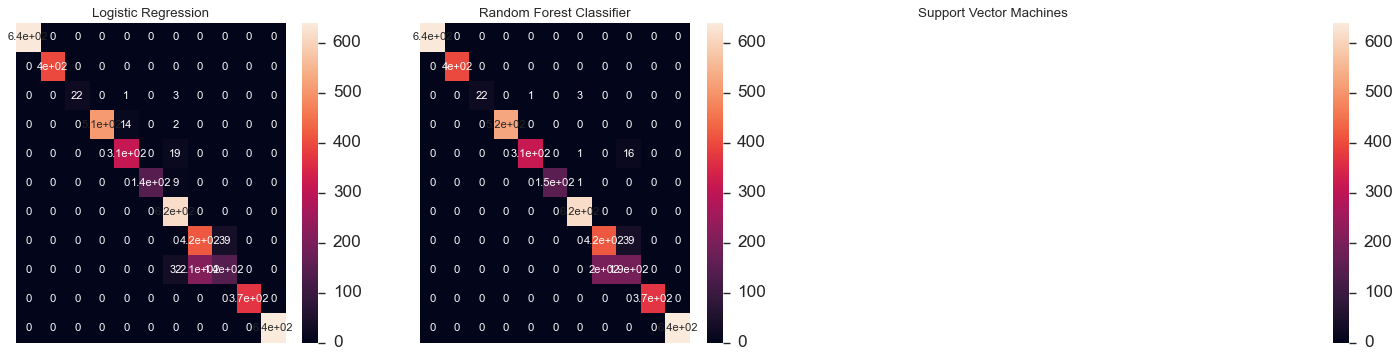

In [231]:
# Get the confusion matrices

# Logistic Regression
cm_lr_tfidf_bi = confusion_matrix(y_test, lr_tfidf_bi_predictions)
plt.figure(figsize=(25,5))
sns.set(font_scale=1.4)
sns.heatmap(cm_lr_tfidf_bi, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,1)
plt.title("Logistic Regression", fontsize = 12)
plt.axis("off")

# Random Forest Classifier
cm_rfc_tfidf_bi = confusion_matrix(y_test, rfc_tfidf_bi_predictions)
sns.set(font_scale=1.4)
sns.heatmap(cm_rfc_tfidf_bi, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,2)
plt.title("Random Forest Classifier", fontsize = 12)
plt.axis("off")

# Support Vector Machines
cm_svm_tfidf_bi = confusion_matrix(y_test, svm_tfidf_bi_predictions)
sns.set(font_scale=1.4)
sns.heatmap(cm_svm_tfidf_bi, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,3)
plt.title("Support Vector Machines", fontsize = 12)
plt.axis("off")

plt.show()

## Train and test models using dense vectors

### Using Google word2vec model

In [148]:
# Load data
X = df_corpora['word2vec'].tolist()
# Load labels
y = df_corpora['Handle'].tolist()
y_bow = df_corpora['clusters_bow'].tolist()
y_bow_bi = df_corpora['clusters_bow_bi'].tolist()
y_tfidf = df_corpora['clusters_tfidf'].tolist()
y_tfidf_bi = df_corpora['clusters_tfidf_bi'].tolist()

In [149]:
# Training with handles
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

In [150]:
# Predict and evaluate model
print('\n==========Logistic Regression==========')
lr_predictions = predict_and_evaluate_model(lr, X_train, y_train, X_test, y_test)
print('\n==========Random Forest Classifier==========')
rfc_predictions = predict_and_evaluate_model(rfc, X_train, y_train, X_test, y_test)
print('\n==========Support Vector Machines==========')
svm_predictions = predict_and_evaluate_model(svm, X_train, y_train, X_test, y_test)


==========Logistic Regression==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.92408 |
+-----------+---------+
| Precision | 0.92822 |
+-----------+---------+
| Recall    | 0.92408 |
+-----------+---------+
| F1 Score  | 0.92032 |
+-----------+---------+

==========Random Forest Classifier==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.90444 |
+-----------+---------+
| Precision | 0.9121  |
+-----------+---------+
| Recall    | 0.90444 |
+-----------+---------+
| F1 Score  | 0.90053 |
+-----------+---------+

==========Support Vector Machines==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.92982 |
+-----------+---------+
| Precision | 0.93348 |
+-----------+---------+
| Recall    | 0.92982 |
+-----------+---------+
| F1 Score  | 0.92669 |
+-----------+---------+


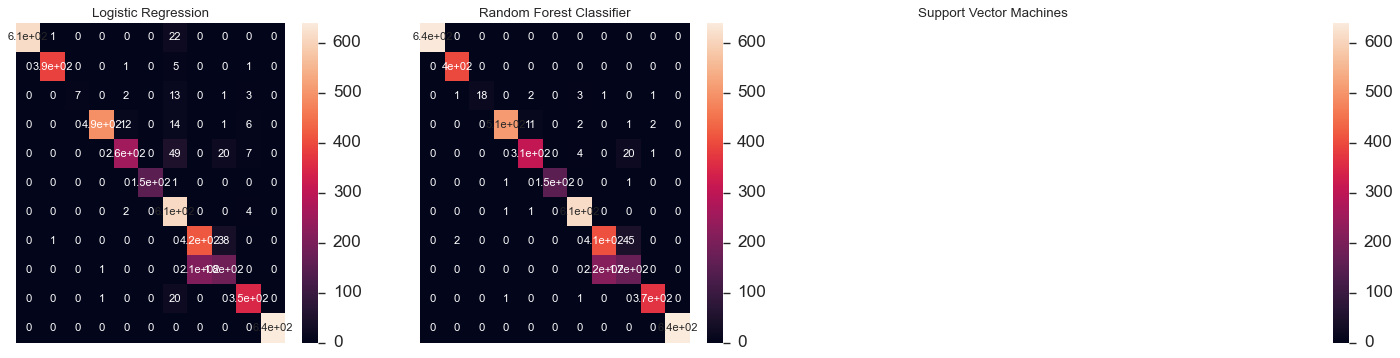

In [151]:
# Get the confusion matrices

# Logistic Regression
cm_lr = confusion_matrix(y_test, lr_predictions)
plt.figure(figsize=(25,5))
sns.set(font_scale=1.4)
sns.heatmap(cm_lr, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,1)
plt.title("Logistic Regression", fontsize = 12)
plt.axis("off")

# Random Forest Classifier
cm_rfc = confusion_matrix(y_test, rfc_predictions)
sns.set(font_scale=1.4)
sns.heatmap(cm_rfc, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,2)
plt.title("Random Forest Classifier", fontsize = 12)
plt.axis("off")

# Support Vector Machines
cm_svm = confusion_matrix(y_test, svm_predictions)
sns.set(font_scale=1.4)
sns.heatmap(cm_svm, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,3)
plt.title("Support Vector Machines", fontsize = 12)
plt.axis("off")

plt.show()

In [152]:
# Training with clusters_bow
X_train, X_test, y_train, y_test = train_test_split(X, y_bow, test_size=0.2, stratify = y_bow)

In [153]:
# Predict and evaluate model
print('\n==========Logistic Regression==========')
lr_bow_bi_predictions = predict_and_evaluate_model(lr, X_train, y_train, X_test, y_test)
print('\n==========Random Forest Classifier==========')
rfc_bow_bi_predictions = predict_and_evaluate_model(rfc, X_train, y_train, X_test, y_test)
print('\n==========Support Vector Machines==========')
svm_bow_bi_predictions = predict_and_evaluate_model(svm, X_train, y_train, X_test, y_test)


==========Logistic Regression==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.9936  |
+-----------+---------+
| Precision | 0.99361 |
+-----------+---------+
| Recall    | 0.9936  |
+-----------+---------+
| F1 Score  | 0.99359 |
+-----------+---------+

==========Random Forest Classifier==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.99095 |
+-----------+---------+
| Precision | 0.99106 |
+-----------+---------+
| Recall    | 0.99095 |
+-----------+---------+
| F1 Score  | 0.99091 |
+-----------+---------+

==========Support Vector Machines==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.99448 |
+-----------+---------+
| Precision | 0.9945  |
+-----------+---------+
| Recall    | 0.99448 |
+-----------+---------+
| F1 Score  | 0.99448 |
+-----------+---------+


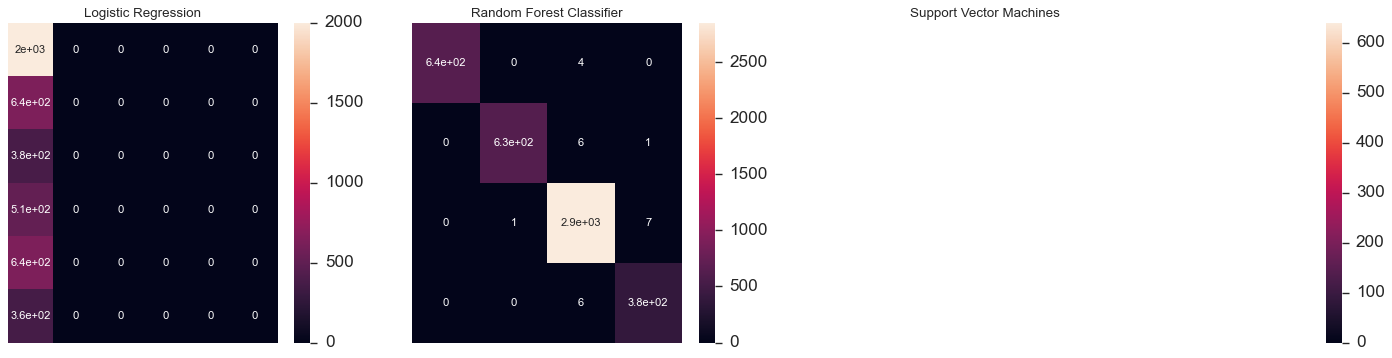

In [154]:
# Get the confusion matrices

# Logistic Regression
cm_lr_bow_bi = confusion_matrix(y_test, lr_bow_bi_predictions)
plt.figure(figsize=(25,5))
sns.set(font_scale=1.4)
sns.heatmap(cm_lr_bow, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,1)
plt.title("Logistic Regression", fontsize = 12)
plt.axis("off")

# Random Forest Classifier
cm_rfc_bow_bi = confusion_matrix(y_test, rfc_bow_bi_predictions)
sns.set(font_scale=1.4)
sns.heatmap(cm_rfc_bow_bi, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,2)
plt.title("Random Forest Classifier", fontsize = 12)
plt.axis("off")

# Support Vector Machines
cm_svm_bow_bi = confusion_matrix(y_test, svm_bow_bi_predictions)
sns.set(font_scale=1.4)
sns.heatmap(cm_svm_bow_bi, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,3)
plt.title("Support Vector Machines", fontsize = 12)
plt.axis("off")

plt.show()

In [155]:
# Training with clusters_bow_bi
X_train, X_test, y_train, y_test = train_test_split(X, y_bow_bi, test_size=0.2, stratify = y_bow_bi)

In [156]:
# Predict and evaluate model
print('\n==========Logistic Regression==========')
lr_bow_bi_predictions = predict_and_evaluate_model(lr, X_train, y_train, X_test, y_test)
print('\n==========Random Forest Classifier==========')
rfc_bow_bi_predictions = predict_and_evaluate_model(rfc, X_train, y_train, X_test, y_test)
print('\n==========Support Vector==========')
svm_bow_bi_predictions = predict_and_evaluate_model(svm, X_train, y_train, X_test, y_test)


==========Logistic Regression==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.98874 |
+-----------+---------+
| Precision | 0.98877 |
+-----------+---------+
| Recall    | 0.98874 |
+-----------+---------+
| F1 Score  | 0.98873 |
+-----------+---------+

==========Random Forest Classifier==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.98014 |
+-----------+---------+
| Precision | 0.98092 |
+-----------+---------+
| Recall    | 0.98014 |
+-----------+---------+
| F1 Score  | 0.98    |
+-----------+---------+

==========Support Vector==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.99161 |
+-----------+---------+
| Precision | 0.99168 |
+-----------+---------+
| Recall    | 0.99161 |
+-----------+---------+
| F1 Score  | 0.99162 |
+-----------+---------+


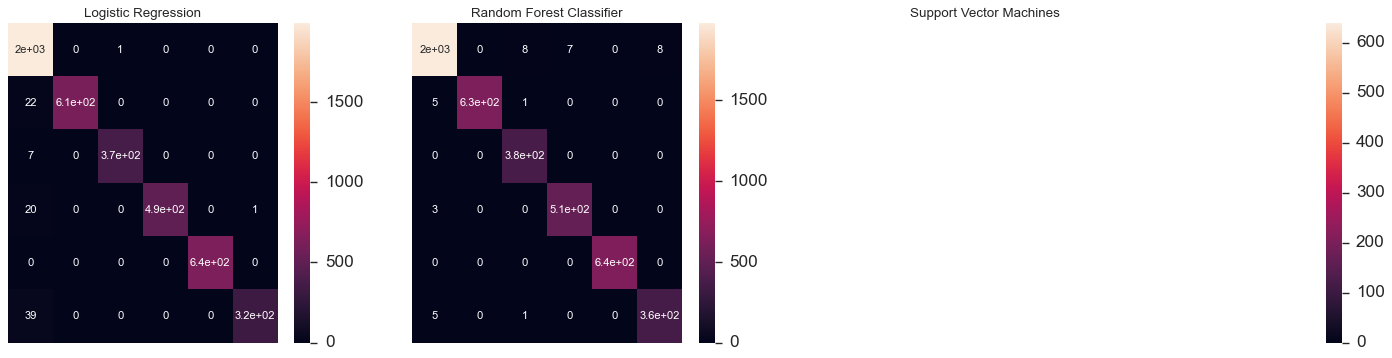

In [157]:
# Get the confusion matrices

# Logistic Regression
cm_lr_bow_bi = confusion_matrix(y_test, lr_bow_bi_predictions)
plt.figure(figsize=(25,5))
sns.set(font_scale=1.4)
sns.heatmap(cm_lr_bow, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,1)
plt.title("Logistic Regression", fontsize = 12)
plt.axis("off")

# Random Forest Classifier
cm_rfc_bow_bi = confusion_matrix(y_test, rfc_bow_bi_predictions)
sns.set(font_scale=1.4)
sns.heatmap(cm_rfc_bow_bi, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,2)
plt.title("Random Forest Classifier", fontsize = 12)
plt.axis("off")

# Support Vector Machines
cm_svm_bow_bi = confusion_matrix(y_test, svm_bow_bi_predictions)
sns.set(font_scale=1.4)
sns.heatmap(cm_svm_bow_bi, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,3)
plt.title("Support Vector Machines", fontsize = 12)
plt.axis("off")

plt.show()

In [158]:
# Training with clusters_tfidf
X_train, X_test, y_train, y_test = train_test_split(X, y_tfidf, test_size=0.2, stratify = y_tfidf)

In [159]:
# Predict and evaluate model
print('\n==========Logistic Regression==========')
lr_tfidf_predictions = predict_and_evaluate_model(lr, X_train, y_train, X_test, y_test)
print('\n==========Random Forest Classifier==========')
rfc_tfidf_predictions = predict_and_evaluate_model(rfc, X_train, y_train, X_test, y_test)
print('\n==========Support Vector Machines==========')
svm_tfidf_predictions = predict_and_evaluate_model(svm, X_train, y_train, X_test, y_test)


==========Logistic Regression==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.98764 |
+-----------+---------+
| Precision | 0.98766 |
+-----------+---------+
| Recall    | 0.98764 |
+-----------+---------+
| F1 Score  | 0.98763 |
+-----------+---------+

==========Random Forest Classifier==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.97859 |
+-----------+---------+
| Precision | 0.97956 |
+-----------+---------+
| Recall    | 0.97859 |
+-----------+---------+
| F1 Score  | 0.97858 |
+-----------+---------+

==========Support Vector Machines==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.98808 |
+-----------+---------+
| Precision | 0.98833 |
+-----------+---------+
| Recall    | 0.98808 |
+-----------+---------+
| F1 Score  | 0.98807 |
+-----------+---------+


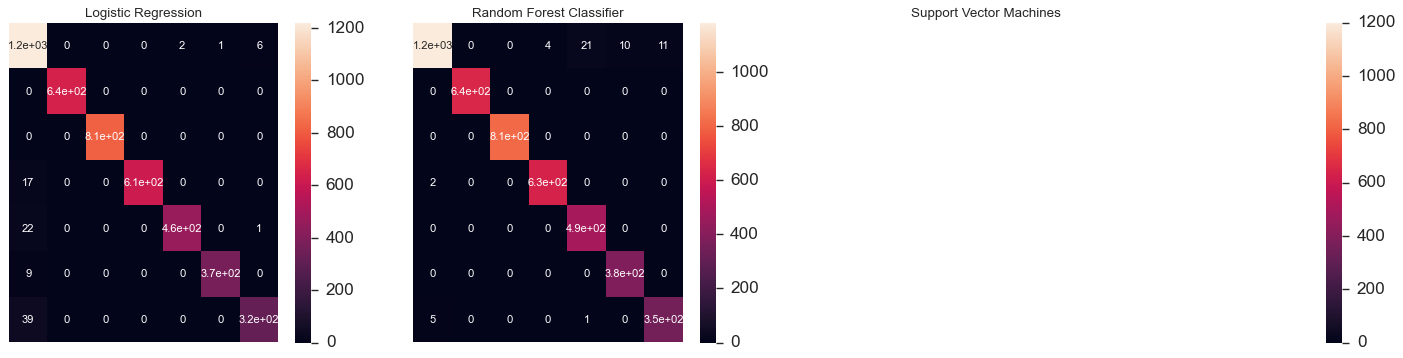

In [160]:
# Get the confusion matrices

# Logistic Regression
cm_lr_tfidf = confusion_matrix(y_test, lr_tfidf_predictions)
plt.figure(figsize=(25,5))
sns.set(font_scale=1.4)
sns.heatmap(cm_lr_tfidf, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,1)
plt.title("Logistic Regression", fontsize = 12)
plt.axis("off")

# Random Forest Classifier
cm_rfc_tfidf = confusion_matrix(y_test, rfc_tfidf_predictions)
sns.set(font_scale=1.4)
sns.heatmap(cm_rfc_tfidf, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,2)
plt.title("Random Forest Classifier", fontsize = 12)
plt.axis("off")

# Support Vector Machines
cm_svm_tfidf = confusion_matrix(y_test, svm_tfidf_predictions)
sns.set(font_scale=1.4)
sns.heatmap(cm_svm_tfidf, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,3)
plt.title("Support Vector Machines", fontsize = 12)
plt.axis("off")

plt.show()

In [161]:
# Training with clusters_tfidf_bi
X_train, X_test, y_train, y_test = train_test_split(X, y_tfidf_bi, test_size=0.2, stratify = y_tfidf_bi)

In [163]:
# Predict and evaluate model
print('\n==========Logistic Regression==========')
lr_tfidf_bi_predictions = predict_and_evaluate_model(lr, X_train, y_train, X_test, y_test)
print('\n==========Random Forest Classifier==========')
rfc_tfidf_bi_predictions = predict_and_evaluate_model(rfc, X_train, y_train, X_test, y_test)
print('\n==========Support Vector Machines==========')
svm_tfidf_bi_predictions = predict_and_evaluate_model(svm, X_train, y_train, X_test, y_test)


==========Logistic Regression==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.98919 |
+-----------+---------+
| Precision | 0.98923 |
+-----------+---------+
| Recall    | 0.98919 |
+-----------+---------+
| F1 Score  | 0.98918 |
+-----------+---------+

==========Random Forest Classifier==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.98786 |
+-----------+---------+
| Precision | 0.98805 |
+-----------+---------+
| Recall    | 0.98786 |
+-----------+---------+
| F1 Score  | 0.98779 |
+-----------+---------+

==========Support Vector Machines==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.99007 |
+-----------+---------+
| Precision | 0.99016 |
+-----------+---------+
| Recall    | 0.99007 |
+-----------+---------+
| F1 Score  | 0.99007 |
+-----------+---------+


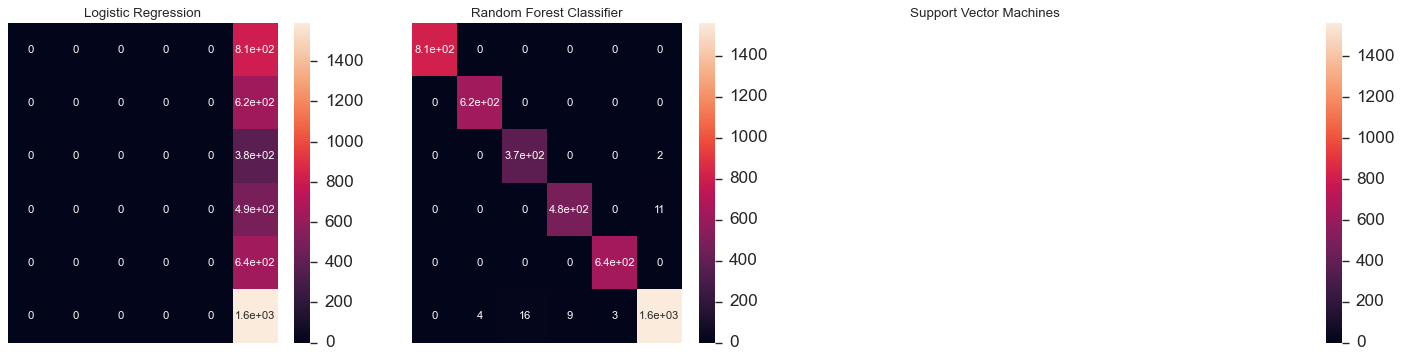

In [164]:
# Get the confusion matrices

# Logistic Regression
cm_lr_tfidf_bi = confusion_matrix(y_test, lr_tfidf_bi_predictions)
plt.figure(figsize=(25,5))
sns.set(font_scale=1.4)
sns.heatmap(cm_lr_tfidf_bi, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,1)
plt.title("Logistic Regression", fontsize = 12)
plt.axis("off")

# Random Forest Classifier
cm_rfc_tfidf_bi = confusion_matrix(y_test, rfc_tfidf_bi_predictions)
sns.set(font_scale=1.4)
sns.heatmap(cm_rfc_tfidf_bi, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,2)
plt.title("Random Forest Classifier", fontsize = 12)
plt.axis("off")

# Support Vector Machines
cm_svm_tfidf_bi = confusion_matrix(y_test, svm_tfidf_bi_predictions)
sns.set(font_scale=1.4)
sns.heatmap(cm_svm_tfidf_bi, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,3)
plt.title("Support Vector Machines", fontsize = 12)
plt.axis("off")

plt.show()

### Using custom word2vec model

In [92]:
# Using the custom word2vec model
# We can only use the tfidf here since we implemented our model using that.
print('\n==========Logistic Regression==========')
lr_tfidf_predictions = predict_and_evaluate_model(lr, tfidf_wv_train_features, train_Y, tfidf_wv_test_features, test_Y)
print('\n==========Random Forest Classifier==========')
rfc_tfidf_predictions = predict_and_evaluate_model(rfc, tfidf_wv_train_features, train_Y, tfidf_wv_test_features, test_Y)
print('\n==========Support Vector Machines==========')
svm_tfidf_predictions = predict_and_evaluate_model(svm, tfidf_wv_train_features, train_Y, tfidf_wv_test_features, test_Y)


==========Logistic Regression==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.92938 |
+-----------+---------+
| Precision | 0.93184 |
+-----------+---------+
| Recall    | 0.92938 |
+-----------+---------+
| F1 Score  | 0.92682 |
+-----------+---------+

==========Random Forest Classifier==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.90068 |
+-----------+---------+
| Precision | 0.90817 |
+-----------+---------+
| Recall    | 0.90068 |
+-----------+---------+
| F1 Score  | 0.89611 |
+-----------+---------+

==========Support Vector Machines==========
+-----------+---------+
| Metric    | Value   |
+-----------+---------+
| Accuracy  | 0.8923  |
+-----------+---------+
| Precision | 0.9436  |
+-----------+---------+
| Recall    | 0.8923  |
+-----------+---------+
| F1 Score  | 0.87361 |
+-----------+---------+


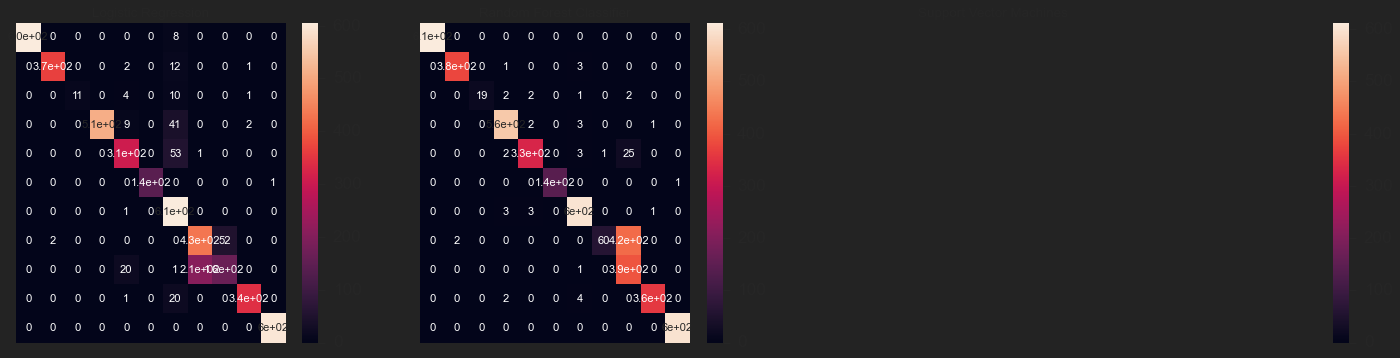

In [94]:
# Get the confusion matrices

# Logistic Regression
cm_lr_tfidf = confusion_matrix(test_Y, lr_tfidf_predictions)
plt.figure(figsize=(25,5))
sns.set(font_scale=1.4)
sns.heatmap(cm_lr_tfidf, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,1)
plt.title("Logistic Regression", fontsize = 12)
plt.axis("off")

# Random Forest Classifier
cm_rfc_tfidf = confusion_matrix(test_Y, rfc_tfidf_predictions)
sns.set(font_scale=1.4)
sns.heatmap(cm_rfc_tfidf, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,2)
plt.title("Random Forest Classifier", fontsize = 12)
plt.axis("off")

# Support Vector Machines
cm_svm_tfidf = confusion_matrix(test_Y, svm_tfidf_predictions)
sns.set(font_scale=1.4)
sns.heatmap(cm_svm_tfidf, annot=True, annot_kws={"size": 10})
plt.subplot(1,4,3)
plt.title("Support Vector Machines", fontsize = 12)
plt.axis("off")

plt.show()

# Question E

## Train also three (03) deep learning classifiers with distinct architectures using two (02) embedding techniques and one (01) contextual embedding technique, justifying the architectures you employ. Compare the performance of each of the models and interpret the results

### Answer

For the deep learning classifiers, we are using the following architectures, which contains two embedding techniques and one contextual embedding technique. For the 1 and 2 models, we are using `glove.6B.100d.txt` file.

1. RNN + LSTM Model
2. CNN + Global Max Pooling
3. BERT Model
    
The reasons for selecting each of the models have been described below.
 
### RNN + LSTM Model

- Can be used for sequential information processing such as time series, NLP and audio signals.
- This can handle variable input sequences.
- RNN + LSTM can automatically learn the relevant features from the input data.
    
### CNN + Global Max Pooling Model

- CNN are well-known for identifying the local patterns on NLP and images.
- CNN are gradually reducing the dimensions of the feature maps as they go deeper to the networks, and global max pooling further reduces the dimensions to a single value per feature map.
- This can be used to capture salient or the most relevant features in the feature map.
    
### BERT Model

- This can be used for contextual word embeddings and has pre-trained models which can be converted for our needs.
- BERT is verstile and can be used for various NLP tasks including text-classification.
- Since BERT employs bidirectional attention mechanisms, it consider the entire sentence when generating word embeddings.
    
The performance and results of each model is shown below with the respective outputs.
    
##### Compare and contrast of results

- As per the results, CNN + Global Max pooling and BERT model gave the most promising results. 
- But, when considering the training period, CNN + Global Max Pooling was faster compared to both BERT and RNN + LSTM models.

In [2]:
label_encoder = LabelEncoder()
df_corpora = pd.read_csv('cleaned_corpora.csv')

X = df_corpora['cleaned_article'] # the features we want to analyze
y = df_corpora['Handle']

article_X_train, article_X_test, article_y_train, article_y_test = train_test_split(X, label_encoder.fit_transform(y), test_size=0.3, random_state=1)

In [3]:
# This will be the maximum number of words from the tokenized vocabulary we are creating
num_words = 1000

# The padding charaters will be marked as 0, and we are using post padding.
pad_type = 'post'

# Tokenize the training data
tokenizer = Tokenizer(num_words = num_words)
tokenizer.fit_on_texts(article_X_train)

# Get the word index
word_index = tokenizer.word_index

# Encode the data sentences to sequences
seq_train = tokenizer.texts_to_sequences(article_X_train)
seq_test = tokenizer.texts_to_sequences(article_X_test)

# Get the max training sequence length
max_len = max([len(val) for val in seq_train])

# Pad the sequences
X_train = pad_sequences(seq_train, padding = pad_type, maxlen = max_len)
X_test = pad_sequences(seq_test, padding = pad_type, maxlen = max_len)

y_train = to_categorical(article_y_train)
y_test = to_categorical(article_y_test)

vocabulary_size = len(tokenizer.word_index) + 1 # Use +1 because 0 is reserved.

# Outputs
print("\nVocab size:\n", vocabulary_size)
print("\nPadded training sequences:\n", X_train[0, :10])
print("\nPadded training shape:", X_train.shape)
print("Training sequences data type:", type(seq_train))
print("Padded Training sequences data type:", type(X_train))


Vocab size:
 70960

Padded training sequences:
 [ 15 251 325 173 392 257 493 173  15 251]

Padded training shape: (15856, 2345)
Training sequences data type: <class 'list'>
Padded Training sequences data type: <class 'numpy.ndarray'>


In [4]:
glove_file = open('./glove/glove.6B.100d.txt', encoding = 'utf-8')
embeddings_dictionary = dict()

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dims = asarray(records[1:], dtype = 'float32')
    embeddings_dictionary[word] = vector_dims

glove_file.close()

In [5]:
#It's used to check whether the passed word is available in the dictionary
embedding_matrix = zeros((vocabulary_size, 100))
for word, index in tokenizer.word_index.items():
    _embedding_vec = embeddings_dictionary.get(word)
    if _embedding_vec is not None:
        embedding_matrix[index] = _embedding_vec

In [39]:
from transformers import *  # this is HuggingFace library
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel, BertConfig
from tqdm import tqdm

In [38]:
# this will download the BERT Tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")  
# this will download the BERT Trained Model
# output_hidden_states=False, as we are training & not interested in output state.
config = BertConfig.from_pretrained("bert-base-uncased",output_hidden_states=False) # dropout=0.2, attention_dropout=0.2
bert_model = TFBertModel.from_pretrained('bert-base-uncased', config=config)

loading file vocab.txt from cache at /Users/test/.cache/huggingface/hub/models--bert-base-uncased/snapshots/1dbc166cf8765166998eff31ade2eb64c8a40076/vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at /Users/test/.cache/huggingface/hub/models--bert-base-uncased/snapshots/1dbc166cf8765166998eff31ade2eb64c8a40076/tokenizer_config.json


loading configuration file config.json from cache at /Users/test/.cache/huggingface/hub/models--bert-base-uncased/snapshots/1dbc166cf8765166998eff31ade2eb64c8a40076/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.31.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading configuration file config.json from cache at /Users/test/.cache/huggingface/hub/models--bert-base-uncased/snapshots/1dbc166cf8765166998eff31ade2eb64c8a400

loading weights file model.safetensors from cache at /Users/test/.cache/huggingface/hub/models--bert-base-uncased/snapshots/1dbc166cf8765166998eff31ade2eb64c8a40076/model.safetensors
Loaded 109,482,240 parameters in the TF 2.0 model.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertF

In [41]:
sentences = df_corpora['cleaned_article'] 
input_ids=[]
attention_masks=[]

for sent in tqdm(sentences):
    bert_inp=bert_tokenizer.encode_plus(sent,add_special_tokens = True,max_length =128,pad_to_max_length = True,return_attention_mask = True)
    input_ids.append(bert_inp['input_ids'])
    attention_masks.append(bert_inp['attention_mask'])

input_ids=np.asarray(input_ids)
attention_masks=np.array(attention_masks)
target = np.array(pd.get_dummies(df_corpora['Handle']))

100%|████████████████████████████████████| 22652/22652 [01:57<00:00, 192.35it/s]


In [42]:
bert_tokenizer.convert_ids_to_tokens(101)

'[CLS]'

In [43]:
_X_train, _X_test, _y_train, _y_test,train_mask,test_mask=train_test_split(input_ids,target,attention_masks,test_size=0.2)

In [44]:
bert_model.summary()

Model: "tf_bert_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
Total params: 109,482,240
Trainable params: 109,482,240
Non-trainable params: 0
_________________________________________________________________


In [60]:
embedded_dim = 100

model_1 = Sequential()

# CNN + LSTM with 1st embedding
model_1.add(Embedding(input_dim=vocabulary_size, output_dim = embedded_dim, weights = [embedding_matrix], input_length = max_len))
model_1.add(SpatialDropout1D(0.2))
# GRY with 512 memory cells
model_1.add(LSTM(512, dropout = 0.2, recurrent_dropout = 0, recurrent_activation = 'sigmoid', activation = 'tanh', unroll = False, use_bias = True))
# Since we have 10 tweet handles
model_1.add(Dense(10, activation = 'softmax'))
# Activation function is softmax for multi-class classification
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print('\n==========Model 1: RNN + LSTM ===========')
print(model_1.summary())


==========Model 1: RNN + LSTM ===========
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 2345, 100)         7096000   
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 2345, 100)        0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 512)               1255424   
                                                                 
 dense_16 (Dense)            (None, 11)                5643      
                                                                 
Total params: 8,357,067
Trainable params: 8,357,067
Non-trainable params: 0
_________________________________________________________________
None


In [58]:
embedded_dim = 100
model_2 = Sequential()

# CNN + GlobalMaxPooling with 2nd Embedding
model_2.add(Embedding(input_dim=vocabulary_size, output_dim = embedded_dim, weights = [embedding_matrix], input_length = max_len))
model_2.add(SpatialDropout1D(0.2))
# GlobalMaxPooling
model_2.add(GlobalMaxPooling1D())
# Since we have 10 tweet handles
model_2.add(Dense(10, activation = 'softmax'))
# Activation function is softmax for multi-class classification
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print('\n==========Model 2: CNN + Global Max Pooling ===========')
print(model_2.summary())


==========Model 2: CNN + Global Max Pooling ===========
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 2345, 100)         7096000   
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 2345, 100)        0         
 lDropout1D)                                                     
                                                                 
 global_max_pooling1d (Globa  (None, 100)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_15 (Dense)            (None, 11)                1111      
                                                                 
Total params: 7,097,111
Trainable params: 7,097,111
Non-trainable params: 0
_____________________________________________________

In [61]:
def create_model(model_):
    input_ids = tf.keras.Input(shape=(128,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(128,),dtype='int32')
    
    output = model_(input_ids,attention_masks)
    output = output[0]      # this is inline in config.output_hidden_states as we want only the top head
    
    output = output[:,0,:]  #  We are only interested in <cls> or classification token of the model which can be extracted
                            #  using the slice operation. Now we have 2D data and build the network as one desired.
                            #  While converting 3D data to 2D we may miss on valuable info.
    
    output = tf.keras.layers.Dense(32,activation='relu')(output)
    output = tf.keras.layers.Dropout(0.2)(output)
    # Since we have 10 tweet handles
    output = tf.keras.layers.Dense(10,activation='softmax')(output)
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
    
    
    for layer in model.layers[:3]:
        layer.trainable = False
    return model

model_3 = create_model(bert_model)
model_3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print('\n==========Model 3: BERT ===========')
model_3.summary()


==========Model 3: BERT ===========
Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_5[0][0]',                
                                thPoolingAndCrossAt               'input_6[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 128,   

In [51]:
# Save models
import pickle
filename_1 = 'model_1.sav'
pickle.dump(model_1, open(filename_1, 'wb'))

INFO:tensorflow:Assets written to: ram://b47211dd-c134-41a8-a093-34155dfb298e/assets


INFO:tensorflow:Assets written to: ram://b47211dd-c134-41a8-a093-34155dfb298e/assets


In [59]:
filename_2 = 'model_2.sav'
pickle.dump(model_2, open(filename_2, 'wb'))

INFO:tensorflow:Assets written to: ram://aba1eff2-bcd2-4438-83fa-14d43df50214/assets


INFO:tensorflow:Assets written to: ram://aba1eff2-bcd2-4438-83fa-14d43df50214/assets


In [52]:
filename_3 = 'model_3.sav'
pickle.dump(model_3, open(filename_3, 'wb'))

INFO:tensorflow:Assets written to: ram://1fcd3375-c485-4227-b0e0-2b082453f536/assets


INFO:tensorflow:Assets written to: ram://1fcd3375-c485-4227-b0e0-2b082453f536/assets


In [7]:
history_1 = model_1.fit(X_train, y_train, batch_size = 512, epochs = 10, verbose = 1, validation_split = 0.2)

Epoch 1/10


2023-07-19 13:46:51.873886: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


25/25 [==============================] - 2346s 96s/step - loss: 2.3364 - accuracy: 0.1285 - val_loss: 2.2697 - val_accuracy: 0.1441
Epoch 2/10
25/25 [==============================] - 3416s 139s/step - loss: 2.2721 - accuracy: 0.1386 - val_loss: 2.2675 - val_accuracy: 0.1441
Epoch 3/10
25/25 [==============================] - 2474s 99s/step - loss: 2.2732 - accuracy: 0.1418 - val_loss: 2.2658 - val_accuracy: 0.1324
Epoch 4/10
25/25 [==============================] - 30043s 1248s/step - loss: 2.2710 - accuracy: 0.1346 - val_loss: 2.2657 - val_accuracy: 0.1441
Epoch 5/10
25/25 [==============================] - 1749s 71s/step - loss: 2.2721 - accuracy: 0.1383 - val_loss: 2.2637 - val_accuracy: 0.1324
Epoch 6/10
25/25 [==============================] - 4596s 189s/step - loss: 2.2720 - accuracy: 0.1395 - val_loss: 2.2652 - val_accuracy: 0.1441
Epoch 7/10
25/25 [==============================] - 9532s 368s/step - loss: 2.2714 - accuracy: 0.1374 - val_loss: 2.2654 - val_accuracy: 0.1340
Epoc

In [7]:
history_2 = model_2.fit(X_train, y_train, batch_size = 512, epochs = 10, verbose = 1, validation_split = 0.2)

Epoch 1/10


2023-07-19 13:01:50.950054: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-07-19 13:01:51.154049: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - ETA: 0s - loss: 2.8302 - accuracy: 0.1092

2023-07-19 13:02:00.872383: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 10s 388ms/step - loss: 2.8302 - accuracy: 0.1092 - val_loss: 2.1047 - val_accuracy: 0.2787
Epoch 2/10
25/25 [==============================] - 9s 379ms/step - loss: 2.2358 - accuracy: 0.2195 - val_loss: 1.7884 - val_accuracy: 0.5845
Epoch 3/10
25/25 [==============================] - 10s 388ms/step - loss: 1.9255 - accuracy: 0.3358 - val_loss: 1.5268 - val_accuracy: 0.6649
Epoch 4/10
25/25 [==============================] - 10s 399ms/step - loss: 1.6719 - accuracy: 0.4447 - val_loss: 1.2886 - val_accuracy: 0.7815
Epoch 5/10
25/25 [==============================] - 11s 444ms/step - loss: 1.4444 - accuracy: 0.5451 - val_loss: 1.0839 - val_accuracy: 0.8496
Epoch 6/10
25/25 [==============================] - 10s 419ms/step - loss: 1.2357 - accuracy: 0.6374 - val_loss: 0.9070 - val_accuracy: 0.8956
Epoch 7/10
25/25 [==============================] - 10s 419ms/step - loss: 1.0628 - accuracy: 0.7032 - val_loss: 0.7606 - val_accuracy: 0.9098
Epoch 8/10


In [49]:
history_3=model_3.fit([_X_train,train_mask],_y_train,batch_size=32,epochs=10,validation_data=([_X_test,test_mask],_y_test))

Epoch 1/10
567/567 [==============================] - 2779s 5s/step - loss: 0.7143 - accuracy: 0.7362 - val_loss: 0.2981 - val_accuracy: 0.8894
Epoch 2/10
567/567 [==============================] - 3756s 7s/step - loss: 0.3820 - accuracy: 0.8412 - val_loss: 0.2292 - val_accuracy: 0.8762
Epoch 3/10
567/567 [==============================] - 2949s 5s/step - loss: 0.3156 - accuracy: 0.8631 - val_loss: 0.1962 - val_accuracy: 0.9175
Epoch 4/10
567/567 [==============================] - 6085s 11s/step - loss: 0.2842 - accuracy: 0.8758 - val_loss: 0.1866 - val_accuracy: 0.9236
Epoch 5/10
567/567 [==============================] - 2692s 5s/step - loss: 0.2687 - accuracy: 0.8817 - val_loss: 0.1789 - val_accuracy: 0.9230
Epoch 6/10
567/567 [==============================] - 3011s 5s/step - loss: 0.2611 - accuracy: 0.8836 - val_loss: 0.1774 - val_accuracy: 0.9236
Epoch 7/10
567/567 [==============================] - 2825s 5s/step - loss: 0.2513 - accuracy: 0.8863 - val_loss: 0.1677 - val_accuracy

In [57]:
# Evaluate models
score_1 = model_1.evaluate(X_test, y_test, verbose=1)
print('\n==========Model 1: RNN + LSTM ===========')
print("Test Score:", score_1[0])
print("Test Accuracy:", score_1[1])

213/213 [==============================] - 369s 2s/step - loss: 2.3979 - accuracy: 0.1388

==========Model 1: RNN + LSTM ===========
Test Score: 2.397890090942383
Test Accuracy: 0.1387580931186676


In [11]:
score_2 = model_2.evaluate(X_test, y_test, verbose=1)
print('\n==========Model 2: CNN + Global Max Pooling ===========')
print("Test Score:", score_2[0])
print("Test Accuracy:", score_2[1])

213/213 [==============================] - 2s 11ms/step - loss: 0.4641 - accuracy: 0.9255

==========Model 2: CNN + Global Max Pooling ===========
Test Score: 0.4640639126300812
Test Accuracy: 0.9255444407463074


In [56]:
score_3 = model_3.evaluate([_X_test, test_mask], _y_test, verbose=1)
print('\n==========Model 3: BERT ===========')
print("Test Score:", score_3[0])
print("Test Accuracy:", score_3[1])

142/142 [==============================] - 444s 3s/step - loss: 0.1713 - accuracy: 0.8923

==========Model 3: BERT ===========
Test Score: 0.17129483819007874
Test Accuracy: 0.8922975063323975


In [10]:
# Below method used to used to print the 
def print_plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title('Training and validation accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title('Training and validation loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

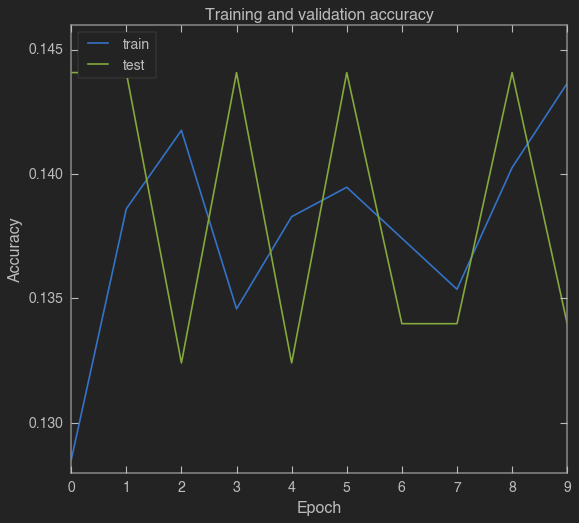

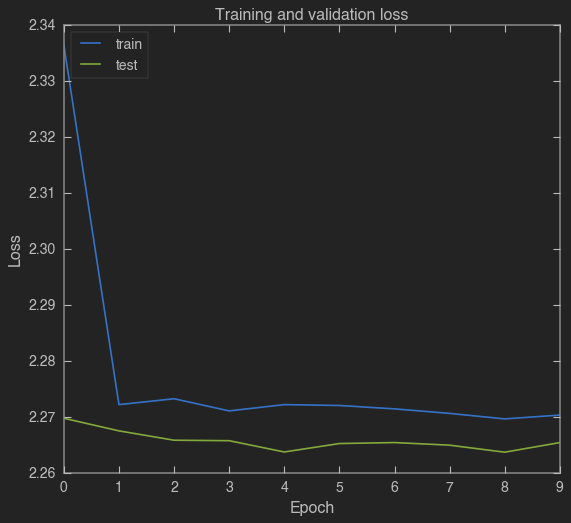

In [11]:
# Display CNN + LSTM both accuracy and loss
print_plot_history(history_1)

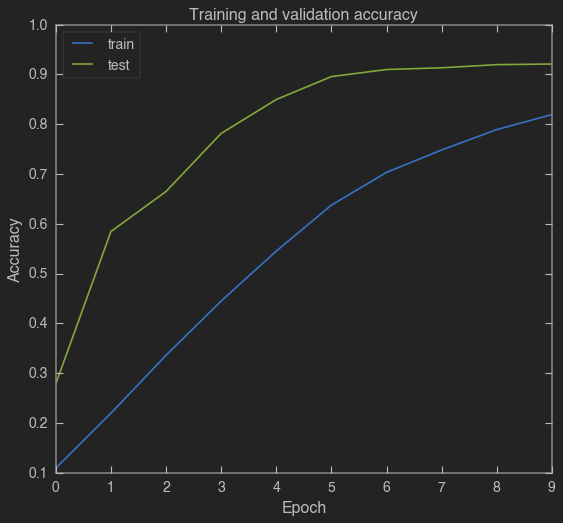

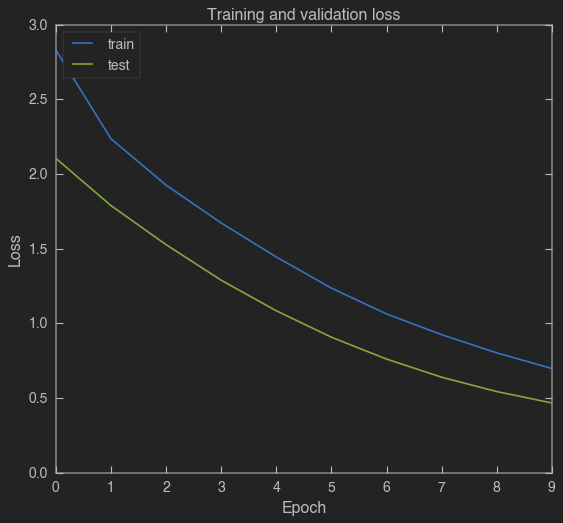

In [9]:
# Display CNN + Global Max Pooling both accuracy and loss
print_plot_history(history_2)

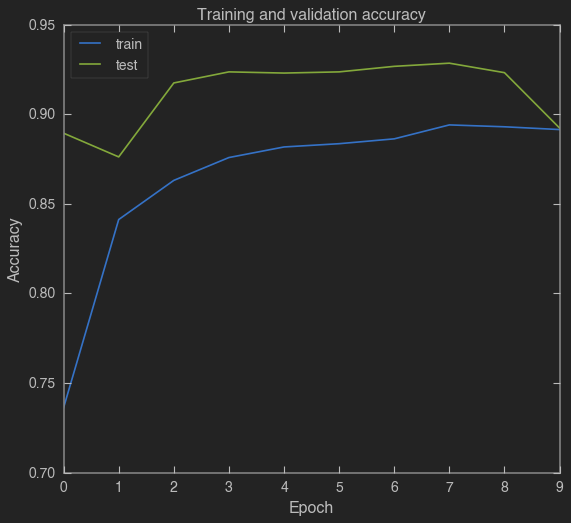

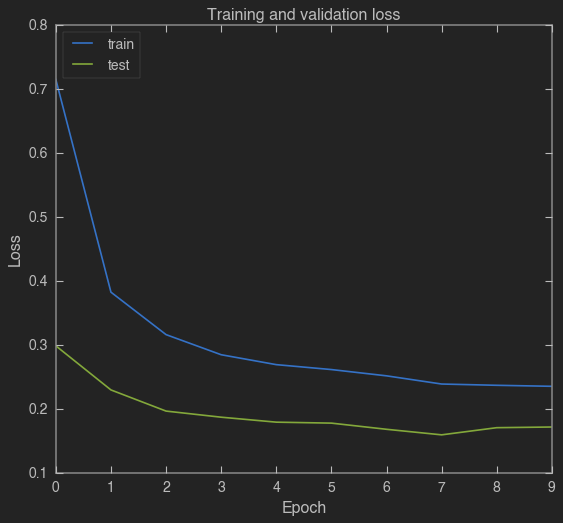

In [54]:
# Display LSTM both accuracy and loss
print_plot_history(history_3)

#### References 📕
1. https://shiivangii.medium.com/data-representation-in-nlp-7bb6a771599a
2. Hands on Machine Learning with Sci-kit Learn, Keras and Tesorflow - Aurelion Geron
3. https://www.techtarget.com/searchenterpriseai/feature/CNN-vs-RNN-How-they-differ-and-where-they-overlap
4. https://www.techtarget.com/searchenterpriseai/definition/BERT-language-model#:~:text=BERT%2C%20which%20stands%20for%20Bidirectional,calculated%20based%20upon%20their%20connection.
5. https://intellipaat.com/blog/what-is-lstm/?US#:~:text=LSTM%20Explained,-Now%2C%20let's%20understand&text='%20LSTM%20stands%20for%20long%20short,especially%20in%20sequence%20prediction%20problems.
https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891